# 1) Introduction of the Business Problem

## Problem Statement:

For a DTH company retaining old customers is always business critical as its more expensive to find new customers than it is to keep existing ones.  Customer lost means revenue lost for the company. Thus a DTH company tries to retain its old customer as far as possible and keep churn rate as low as possible. Due to lot of competition in the current market, it has become a challenge to retain the existing customers.

Hence, the company requires a model to be built using AI-ML to predict the accounts which are about to get churned. Based on the model predictions, company will then try to provide some lucrative offers to retain these accounts.

## Need of the Project:

 - Customer churn is often considered to be a measure of failure rather than success, it is one of the most important metrics to track.  After all, what’s a business without its customers?
 
- Churn also impacts nearly every aspect of a company, from the product and revenue to customer loyalty and customer satisfaction.


- For a DTH company retaining old customers is always business critical as its more expensive to find new customers than it is to keep existing ones.


- Churn leads to higher CAC & reduced revenue. CAC (Customer acquisition cost) is the total cost of sales and marketing required to acquire a customer.


- For a DTH company, account churn is a major thing because 1 account can also have multiple customers. Hence losing one account means loosing more than one customer.


Thus developing a churn prediction model for the DTH company is very vital and crucial for the company's growth in the longer run

## Understanding Business/social opportunity

### Business opportunity

Once businesses determine which customers are churning, then it can have following opportunities :-

- DTH company can determine why these customers are leaving and identify customer retention strategies that could help.


- DTH company then can reduce its CAC (customer acquisition cost) and can increase its revenue.


- DTH company can improves its customer loyality and can increase the customer satisfaction levels


- DTH company can have more customer engagement and usage


- With better customer engangement , DTH company has more likelihood that its customer may upgrade their accounts

### Social opportunity

There could be few social oppurtunites for the DTH company if its targeting the customers which are about to be churned.

- DTH company can pay attention to the complaints of the customer which are about to be churned.


- By paying more attention to these customers, overall satisfaction of customer improves and it gives positive sentiments in the society.


- In turn, society as a whole will get better service from the service provider and happinex index of the residents will increase and will utlimately lead to better performance/output in their lives


- With increased satisfaction of the customers, DTH company will get more positive feedback on social media platforms. This can further boost its revenue and customer loyality


## Domain:
Retail (E-commerce)


## Data Description:

Dataset contains 11260 customer account details with 19 features

Input Dataset name: 'Customer Churn Data.xlsx'

## Assumptions

- Service_Score feature as a rating from 1 to 5. Its not mention in the data dictionary that whether 1 is the highest or lowest rating. So we are assuming that rating 1 is lowest and rating 5 is highest over here


- There are very 8 records in Service_Score in which score is 0. This appears incorrect or some data entry problem. Other scoring feature CC_Agent_Score doesnt have any 0 value. Hence for this analysis we are assuming these to be missing values


- For CC_Agent_Score feature too, we have assumed 1 as the lowest rating and 5 as the highest rating


- Account_segment feature contains different segement on the basis of spend of the customers. Currently no order is mentioned that which segment is spending more and less. So we are assuming following order in increasing order of spend :-
        1) Regular
        2) Regular Plus
        3) Super
        4) Super Plus
        5) HNI

## Import all the necessary libraries

In [126]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
from scipy.stats import variation
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.model_selection import GridSearchCV
sns.set(color_codes=True) # adds a nice background to the graphs
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import RFE
from sklearn.neural_network import MLPClassifier
from xgboost.sklearn import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost.sklearn import XGBClassifier
import xgboost as xgb
from sklearn.ensemble import StackingClassifier
from tqdm import tqdm

# 2) Data Report

### Read the data into the notebook


In [127]:
df= pd.read_excel('Customer Churn Data.xlsx',sheet_name='Data for DSBA')

In [128]:
# taking backup copy
df_bkp = df.copy()

In [129]:
df

AccountID  Churn Tenure  City_Tier  CC_Contacted_LY      Payment  \
0          20000      1      4        3.0              6.0   Debit Card   
1          20001      1      0        1.0              8.0          UPI   
2          20002      1      0        1.0             30.0   Debit Card   
3          20003      1      0        3.0             15.0   Debit Card   
4          20004      1      0        1.0             12.0  Credit Card   
...          ...    ...    ...        ...              ...          ...   
11255      31255      0     10        1.0             34.0  Credit Card   
11256      31256      0     13        1.0             19.0  Credit Card   
11257      31257      0      1        1.0             14.0   Debit Card   
11258      31258      0     23        3.0             11.0  Credit Card   
11259      31259      0      8        1.0             22.0  Credit Card   

       Gender  Service_Score Account_user_count account_segment  \
0      Female            3.0                  3           Super   
1        Male            3.0                  4    Regular Plus   
2        Male            2.0                  4    Regular Plus   
3        Male            2.0                  4           Super   
4        Male            2.0                  3    Regular Plus   
...       ...            ...                ...             ...   
11255    Male            3.0                  2           Super   
11256    Male            3.0                  5             HNI   
11257    Male            3.0                  2           Super   
11258    Male            4.0                  5           Super   
11259    Male            3.0                  2           Super   

       CC_Agent_Score Marital_Status rev_per_month  Complain_ly  \
0                 2.0         Single             9          1.0   
1                 3.0         Single             7          1.0   
2                 3.0         Single             6          1.0   
3                 5.0         Single             8          0.0   
4                 5.0         Single             3          0.0   
...               ...            ...           ...          ...   
11255             1.0        Married             9          0.0   
11256             5.0        Married             7          0.0   
11257             4.0        Married             7          1.0   
11258             4.0        Married             7          0.0   
11259             3.0        Married             5          0.0   

      rev_growth_yoy coupon_used_for_payment Day_Since_CC_connect cashback  \
0                 11                       1                    5   159.93   
1                 15                       0                    0    120.9   
2                 14                       0                    3      NaN   
3                 23                       0                    3   134.07   
4                 11                       1                    3    129.6   
...              ...                     ...                  ...      ...   
11255             19                       1                    4   153.71   
11256             16                       1                    8   226.91   
11257             22                       1                    4   191.42   
11258             16                       2                    9    179.9   
11259             13                       2                    3   175.04   

      Login_device  
0           Mobile  
1           Mobile  
2           Mobile  
3           Mobile  
4           Mobile  
...            ...  
11255     Computer  
11256       Mobile  
11257       Mobile  
11258     Computer  
11259       Mobile  

[11260 rows x 19 columns]

### Checking the data types /information


In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AccountID                11260 non-null  int64  
 1   Churn                    11260 non-null  int64  
 2   Tenure                   11158 non-null  object 
 3   City_Tier                11148 non-null  float64
 4   CC_Contacted_LY          11158 non-null  float64
 5   Payment                  11151 non-null  object 
 6   Gender                   11152 non-null  object 
 7   Service_Score            11162 non-null  float64
 8   Account_user_count       11148 non-null  object 
 9   account_segment          11163 non-null  object 
 10  CC_Agent_Score           11144 non-null  float64
 11  Marital_Status           11048 non-null  object 
 12  rev_per_month            11158 non-null  object 
 13  Complain_ly              10903 non-null  float64
 14  rev_growth_yoy        

The data set contains 11260 observations of data and 19 features.  There are few missing values in some of the columns

### Checking the shape (Number of rows and columns)

In [131]:
df.shape

(11260, 19)

### Checking for duplicates

In [132]:
# Check for duplicate data

dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

df[dups]

Number of duplicate rows = 0


Empty DataFrame
Columns: [AccountID, Churn, Tenure, City_Tier, CC_Contacted_LY, Payment, Gender, Service_Score, Account_user_count, account_segment, CC_Agent_Score, Marital_Status, rev_per_month, Complain_ly, rev_growth_yoy, coupon_used_for_payment, Day_Since_CC_connect, cashback, Login_device]
Index: []

There are no duplicate records present in the input dataset.


### Checking for data types

In [133]:
df.dtypes

AccountID                    int64
Churn                        int64
Tenure                      object
City_Tier                  float64
CC_Contacted_LY            float64
Payment                     object
Gender                      object
Service_Score              float64
Account_user_count          object
account_segment             object
CC_Agent_Score             float64
Marital_Status              object
rev_per_month               object
Complain_ly                float64
rev_growth_yoy              object
coupon_used_for_payment     object
Day_Since_CC_connect        object
cashback                    object
Login_device                object
dtype: object

## a) Understanding how data was collected in terms of time, frequency and methodology

- The input data was given to us in the form of excel spread sheet. 
- It contains account details of last 12 months (1 year)
- Frequency of this data collection appears to be monthly. Every month, data for that month is added and data for the oldest month is removed
- Methodology used while collecting data seems to be annual average. Average of several features over 12 months is taken and is provided as the input features for the churn analysis



## b) Visual inspection of data

- There are total of 11260 customer account rows in the input dataset and a total of 19 features
- There are no duplicates present in the input dataset
- There are missing values present in dataset for few features
- Defaullt data type of features is as shown below :-
    - Integer : 2 features
    - Object(Character) : 12 features
    - Float(decimal) : 5 features
    
    


## c) Understanding of attributes

Feature information is as shown below :-

1.  AccountID: Unique ID to identify accounts of the customer uniquely.
 
 
2.  Churn: Target attribute indicating whether account got churned or not
 
 
3.  Tenure: Account tenure of the customer
 

4.  City_Tier: It indicates the tier in which the primary customer's city lies. Values ranging from 1 to 3

 
5.  CC_Contacted_L12m: It indicates how many times the customer has contacted customer care in the last 12 months
 

6.  Payment: It provides the preferred Payment mode of the customers like credit card, debit card, Cash on Delivery etc

 
7.  Gender: It tells the gender (Male/Female) of the primary customer of the account

 
8.  Service_Score: It provides the satisfaction score given by the customers of the account on service provided by the company on a scale of 1 to 5.

 
9.  Account_user_count: Count of number of customers associated with this account. This count varies from 1 to 6.

 
10. account_segment: This feature segragates the account on the basis of spend (HNI/Regular/Regular Plus/Super/Super Plus)


11. CC_Agent_Score: It provides the satisfaction score given by the customers of the account on customer care service provided by company on a scale of 1 to 5.


12. Marital_Status: It provide the marital status (Single/Married/Divorced) of the primary customer of the account


13. rev_per_month: This features gives the average monthly revenue generated by the account in last 12 months


14. Complain_l12m: This feature indicates any complaints been raised by the account in last 12 months. This feature value is binary(0/1) in nature i.e 0 meaning no complaints raised and 1 meaning complaint raised.


15. rev_growth_yoy: This feature provides the revenue growth percentage of the account i.e (last 12 months vs last 13-24 month)


16. coupon_used_l12m: This features provides the count of coupons used by the customers to do the payment in last 12 months


17. Day_Since_CC_connect: This feature gives the no of days since no customers in the account has contacted the customer care of the company


18. cashback_l12m: It tells the monthly average cashback generated by account in the last 12 months


19. Login_device: It provides the preferred login device (Mobile/Computer) of the customers in the account




Data type of several columns seems to be incorrect.


- For the following features datatype should be changed from object to numeric values. There appears to be some garbage values in these features due to which it is coming as string data. We need to remove the garbage/junk character data from these feautres and then convert them to the any numeric data type.

    - tenure object
    - Account_user_count
    - rev_per_month object
    - rev_growth_yoy
    - coupon_used_for_payment
    - Day_Since_CC_connect
    - cashback
        


### Renaming the columns

Few columns are starting with upper case letter and few are starting with lower case. So renaming the columns for bringing uniformity.

In [134]:
df.rename(columns = {"Account_user_count": "Account_User_Count", "account_segment": "Account_Segment","rev_per_month": "Rev_Per_Month","Complain_ly": "Complain_LY","rev_growth_yoy": "Rev_Growth_YOY", "coupon_used_for_payment": "Coupon_Used_For_Payment","Day_Since_CC_connect":"Day_Since_CC_Connect","cashback":"Cashback"}, 
                      inplace = True) 

In [135]:
df.dtypes

AccountID                    int64
Churn                        int64
Tenure                      object
City_Tier                  float64
CC_Contacted_LY            float64
Payment                     object
Gender                      object
Service_Score              float64
Account_User_Count          object
Account_Segment             object
CC_Agent_Score             float64
Marital_Status              object
Rev_Per_Month               object
Complain_LY                float64
Rev_Growth_YOY              object
Coupon_Used_For_Payment     object
Day_Since_CC_Connect        object
Cashback                    object
Login_device                object
dtype: object

In [136]:
# creating a function to return CV, skew, IQR, Upper range, lower range of dataframe
def CV_row(df):   
    i=0;
    CV=[]
    Skew=[]
    IQR=[]
    UR=[]
    LR=[]
    Kurtosis=[]
    numeric_col_names=df.select_dtypes(exclude=['object','category']).columns
    for i in df.columns:
        if (i in numeric_col_names):
            CV.append(round(variation(df[i]),2))
            Skew.append(round(df[i].skew(),2))
            IQR_val, lower_range, upper_range = return_IQR_LR_UR(df[i])
            IQR.append(round(IQR_val,2))
            UR.append(round(upper_range,2))
            LR.append(round(lower_range,2))
            Kurtosis.append(round(df[i].kurtosis(),2))

    return CV, Skew, IQR,  UR, LR, Kurtosis 

def calc_rows(Col_list,no_of_graph_row=4):  
    if (len(Col_list) % no_of_graph_row == 0):
        rows= len(Col_list) / no_of_graph_row
    else:
        rows= len(Col_list) / no_of_graph_row + 1
    return rows

## Using User definition to return IQR, LR, UR for a column
def return_IQR_LR_UR(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=round((Q3-Q1),2)
    lower_range= round(Q1-(1.5 * IQR),2)
    upper_range= round(Q3+(1.5 * IQR),2)
    return IQR, lower_range, upper_range

# creating a function to treate outlier and cap and floor upper and lower extreme values
def Outlier_treatment(df,numeric_col_names):   
    i=0;
    df_sum = {'Feature':[], 'LR':[], 'Min':[], 'Outlier_Lesser_LR':[],'UR':[], 'Max':[],'Outlier_Greator_UR':[],
              'Total_Outliers_Count':[],'Total_Outliers_Percentage':[]}
    for i in df.columns:
        if (i in numeric_col_names):
            IQR, lr, ur = return_IQR_LR_UR(df[i])
#             print ('\nFeature:', i )
#             print ('Lower Range :', lr, ',Upper Range:', ur) 
#             print ('Outliers less than LR:', df[(df[i]<lr)][i].count(), 
#                    ',Outliers greator than UR:', df[(df[i]>ur)][i].count(), 
#                    ',Total Outliers Count:', df[(df[i]<lr)|(df[i]>ur)][i].count(), 
#                    ',Total Outliers Percentage:', round(df[(df[i]<lr)|(df[i]>ur)][i].count()*100/df[i].count(),2))
            
            df_sum['Feature'].append(i)     
            df_sum['LR'].append(lr)     
            df_sum['Min'].append(df[i].min())     
            df_sum['UR'].append(ur)     
            df_sum['Max'].append(df[i].max())     
            df_sum['Outlier_Lesser_LR'].append(df[(df[i]<lr)][i].count())     
            df_sum['Outlier_Greator_UR'].append(df[(df[i]>ur)][i].count())     
            df_sum['Total_Outliers_Count'].append(df[(df[i]<lr)|(df[i]>ur)][i].count())     
            df_sum['Total_Outliers_Percentage'].append(round(df[(df[i]<lr)|(df[i]>ur)][i].count()*100/df[i].count(),2))     
            df[i] =np.where(df[i]>ur,ur,df[i])
            df[i] =np.where(df[i]<lr,lr,df[i])

    df_sum = pd.DataFrame(df_sum)        
    return df,df_sum

## Checking for summary

In [137]:
df_summ=pd.DataFrame(df.describe().round(4))


## Checking IQR, Coeffiecient of Variation, IQR, lower range and upper range of numerical cols

In [138]:
df_summ.loc["CV"],df_summ.loc["Skew"],df_summ.loc["IQR"],df_summ.loc["UR"],df_summ.loc["LR"],df_summ.loc["Kurtosis"]= CV_row(df)

In [139]:
df_summ.round(4).T

count        mean        std      min       25%      50%  \
AccountID        11260.0  25629.5000  3250.6263  20000.0  22814.75  25629.5   
Churn            11260.0      0.1684     0.3742      0.0      0.00      0.0   
City_Tier        11148.0      1.6539     0.9150      1.0      1.00      1.0   
CC_Contacted_LY  11158.0     17.8671     8.8533      4.0     11.00     16.0   
Service_Score    11162.0      2.9025     0.7256      0.0      2.00      3.0   
CC_Agent_Score   11144.0      3.0665     1.3798      1.0      2.00      3.0   
Complain_LY      10903.0      0.2853     0.4516      0.0      0.00      0.0   

                      75%      max    CV  Skew     IQR       UR       LR  \
AccountID        28444.25  31259.0  0.13  0.00  5629.5  36888.5  14370.5   
Churn                0.00      1.0  2.22  1.77     0.0      0.0      0.0   
City_Tier            3.00      3.0   NaN  0.74     2.0      6.0     -2.0   
CC_Contacted_LY     23.00    132.0   NaN  1.42    12.0     41.0     -7.0   
Service_Score        3.00      5.0   NaN  0.00     1.0      4.5      0.5   
CC_Agent_Score       4.00      5.0   NaN -0.14     2.0      7.0     -1.0   
Complain_LY          1.00      1.0   NaN  0.95     1.0      2.5     -1.5   

                 Kurtosis  
AccountID           -1.20  
Churn                1.14  
City_Tier           -1.40  
CC_Contacted_LY      8.23  
Service_Score       -0.67  
CC_Agent_Score      -1.12  
Complain_LY         -1.10

From summary, we can see that :-

- Except AccountID, only 1 feature CC_Contacted_LY is continuous in nature. 
- Mean customer care contacted last year is 18. It is slightly positively skewed and kurtosis is positive i.e Leptokurtic distribution
- Certain other numeric features have junk data due to which it is not cming in summary
- Churn is that target variable which is binary in nature
- City_Tier, Service_Score, CC_Agent_Score, Complain_LY are all discrete numbers. Hence they are not giving much insights from the summary

In [140]:
object_col_names=df.select_dtypes(include=['object','category']).columns
df[object_col_names].describe(include='all').T

count  unique         top  freq
Tenure                     11158      38           1  1351
Payment                    11151       5  Debit Card  4587
Gender                     11152       4        Male  6328
Account_User_Count         11148       7           4  4569
Account_Segment            11163       7       Super  4062
Marital_Status             11048       3     Married  5860
Rev_Per_Month              11158      59           3  1746
Rev_Growth_YOY             11260      20          14  1524
Coupon_Used_For_Payment    11260      20           1  4373
Day_Since_CC_Connect       10903      24           3  1816
Cashback                 10789.0  5693.0      155.62  10.0
Login_device               11039       3      Mobile  7482

- Debit Card is the preffered mode of payment by most of the DTH company customers
- DTH company has higher ratio of male customers as compared to female
- Super account segment appears to be more popular. However certain data in this feature needs to be cleaned
- DTH customers are using mobile more as compared to computer.
- Cashback, Rev_Per_Month,  Rev_Growth_YOY, Coupon_Used_For_Payment, Day_Since_CC_Connect , Tenure features are numeric in nature and these features should not be coming as object features.We need to clean these features.

## Data Cleansing

### Removal of Unwanted Features

AccountID is the unique identifier of the different customer accounts of the DTH company. This feature will not add any value to the analysis. Hence we are dropping this feature

In [141]:
df.drop(['AccountID'],axis=1,inplace=True)

### Garbage data removal

#### Cleaning Tenure

In [142]:
df.Tenure.value_counts()

1     1351
0     1231
8      519
9      496
7      450
10     423
3      410
4      403
5      403
11     388
6      363
12     360
13     359
2      354
14     345
15     311
16     291
19     273
18     253
20     217
17     215
21     170
23     169
22     151
24     147
30     137
28     137
27     131
99     131
26     122
#      116
29     114
25     114
31      96
50       2
51       2
60       2
61       2
Name: Tenure, dtype: int64

We can see few '#' values in the Tenure feature which is causing it to be object data type. Replacing this junk character with the missing value

In [143]:
df['Tenure'] = df['Tenure'].replace('#', np.nan)

#### Cleaning Account_User_Count

In [144]:
df.Account_User_Count.value_counts()

4    4569
3    3261
5    1699
2     526
1     446
@     332
6     315
Name: Account_User_Count, dtype: int64

In [145]:
df['Account_User_Count'] = df['Account_User_Count'].replace('@', np.nan)

#### Cleaning Rev_Per_Month

In [146]:
df.Rev_Per_Month.value_counts()

3      1746
2      1585
5      1337
4      1218
6      1085
7       754
+       689
8       643
9       564
10      413
1       402
11      278
12      166
13       93
14       48
15       24
102       8
124       5
123       5
107       5
136       4
133       4
129       4
140       4
118       4
137       3
130       3
115       3
126       3
119       3
138       3
117       3
127       3
116       3
101       3
110       3
108       3
113       3
125       2
19        2
139       2
22        2
134       2
131       2
114       2
105       2
121       2
120       2
103       1
104       1
100       1
25        1
23        1
122       1
135       1
21        1
20        1
111       1
109       1
Name: Rev_Per_Month, dtype: int64

In [147]:
df['Rev_Per_Month'] = df['Rev_Per_Month'].replace('+', np.nan)

#### Cleaning Rev_Growth_YOY

In [148]:
df.Rev_Growth_YOY.value_counts()

14    1524
13    1427
15    1283
12    1210
16     949
18     708
17     704
19     619
20     562
11     523
21     433
22     403
23     345
24     229
25     188
26      98
27      35
28      14
4        3
$        3
Name: Rev_Growth_YOY, dtype: int64

In [149]:
df['Rev_Growth_YOY'] = df['Rev_Growth_YOY'].replace('$', np.nan)

#### Cleaning Coupon_Used_For_Payment

In [150]:
df.Coupon_Used_For_Payment.value_counts()

1     4373
2     2656
0     2150
3      698
4      424
5      284
6      234
7      184
8       88
10      34
9       34
11      30
12      26
13      22
14      12
15       4
16       4
#        1
*        1
$        1
Name: Coupon_Used_For_Payment, dtype: int64

In [151]:
df['Coupon_Used_For_Payment'] = df['Coupon_Used_For_Payment'].replace(['$','*','#'], np.nan)

#### Cleaning Day_Since_CC_Connect

In [152]:
df.Day_Since_CC_Connect.value_counts()

3     1816
2     1574
1     1256
8     1169
0      964
7      911
4      893
9      622
5      479
10     339
6      229
11     183
12     146
13     117
14      74
15      37
17      34
16      26
18      26
30       2
31       2
47       2
46       1
$        1
Name: Day_Since_CC_Connect, dtype: int64

In [153]:
df['Day_Since_CC_Connect'] = df['Day_Since_CC_Connect'].replace('$', np.nan)

#### Cleaning Cashback

In [154]:
df.Cashback.value_counts()

155.62    10
152.28     9
154.73     9
149.68     9
145.08     9
          ..
118.61     1
244.18     1
232.20     1
193.92     1
125.41     1
Name: Cashback, Length: 5693, dtype: int64

In [155]:
# df.Cashback.str.isdigit()
df[~df.Cashback.apply(np.isreal)].Cashback

440     $
1257    $
Name: Cashback, dtype: object

In [156]:
df[df.Cashback == '$'].Cashback.count()

2

In [157]:
df['Cashback'] = df['Cashback'].replace('$', np.nan)

#### Converting datatype to float of all these cleaned features

Due to the presence of missing values, these features cannot be converted to integers. As a workaround we are converting them to float

In [158]:
df['Tenure'] = df['Tenure'].astype('float')
df['Account_User_Count'] = df['Account_User_Count'].astype('float')
df['Rev_Per_Month'] = df['Rev_Per_Month'].astype('float')
df['Rev_Growth_YOY'] = df['Rev_Growth_YOY'].astype('float')
df['Coupon_Used_For_Payment'] = df['Coupon_Used_For_Payment'].astype('float')
df['Day_Since_CC_Connect'] = df['Day_Since_CC_Connect'].astype('float')
df['Cashback'] = df['Cashback'].astype('float')


In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Churn                    11260 non-null  int64  
 1   Tenure                   11042 non-null  float64
 2   City_Tier                11148 non-null  float64
 3   CC_Contacted_LY          11158 non-null  float64
 4   Payment                  11151 non-null  object 
 5   Gender                   11152 non-null  object 
 6   Service_Score            11162 non-null  float64
 7   Account_User_Count       10816 non-null  float64
 8   Account_Segment          11163 non-null  object 
 9   CC_Agent_Score           11144 non-null  float64
 10  Marital_Status           11048 non-null  object 
 11  Rev_Per_Month            10469 non-null  float64
 12  Complain_LY              10903 non-null  float64
 13  Rev_Growth_YOY           11257 non-null  float64
 14  Coupon_Used_For_Paymen

### Cleaning categorical features

In [160]:
df.Payment.value_counts()

Debit Card          4587
Credit Card         3511
E wallet            1217
Cash on Delivery    1014
UPI                  822
Name: Payment, dtype: int64

Payment feature seems to clean.

In [161]:
df.Gender.value_counts()

Male      6328
Female    4178
M          376
F          270
Name: Gender, dtype: int64

Minor cleaning is required in this feature. We need to replace M with Male and F with Female

In [162]:
df['Gender'] = df['Gender'].replace('M', 'Male').replace('F', 'Female')

In [163]:
df.Gender.value_counts()

Male      6704
Female    4448
Name: Gender, dtype: int64

We can see that Gender feature is cleaned now

In [164]:
df.Account_Segment.value_counts()

Super           4062
Regular Plus    3862
HNI             1639
Super Plus       771
Regular          520
Regular +        262
Super +           47
Name: Account_Segment, dtype: int64

In Account segment feature,  there seems to be some data entry problems. Few enteries were done with 'Super +' instead of Super Plus.

Similarly 'Regular +' needs to be corrected to Regular Plus

In [165]:
df['Account_Segment'] = df['Account_Segment'].replace('Regular +', 'Regular Plus').replace('Super +', 'Super Plus')

In [166]:
df.Account_Segment.value_counts()

Regular Plus    4124
Super           4062
HNI             1639
Super Plus       818
Regular          520
Name: Account_Segment, dtype: int64

Now Account Segment is cleaned

In [167]:
df.Marital_Status.value_counts()

Married     5860
Single      3520
Divorced    1668
Name: Marital_Status, dtype: int64

This feature seems to be cleaned. No more cleaning is required

In [168]:
df.Login_device.value_counts()

Mobile      7482
Computer    3018
&&&&         539
Name: Login_device, dtype: int64

There seems to be junk data present in the login device feature. We are replacing it with the missing values.

In [169]:
df['Login_device'] = df['Login_device'].replace('&&&&', np.nan)

In [170]:
df.Login_device.value_counts()

Mobile      7482
Computer    3018
Name: Login_device, dtype: int64

### Rechecking the summary now

In [171]:
df_summ=pd.DataFrame(df.describe().round(4))
df_summ.loc["CV"],df_summ.loc["Skew"],df_summ.loc["IQR"],df_summ.loc["UR"],df_summ.loc["LR"],df_summ.loc["Kurtosis"]= CV_row(df)

In [172]:
df_summ.round(4).T

count      mean       std  min     25%     50%  \
Churn                    11260.0    0.1684    0.3742  0.0    0.00    0.00   
Tenure                   11042.0   11.0251   12.8798  0.0    2.00    9.00   
City_Tier                11148.0    1.6539    0.9150  1.0    1.00    1.00   
CC_Contacted_LY          11158.0   17.8671    8.8533  4.0   11.00   16.00   
Service_Score            11162.0    2.9025    0.7256  0.0    2.00    3.00   
Account_User_Count       10816.0    3.6929    1.0230  1.0    3.00    4.00   
CC_Agent_Score           11144.0    3.0665    1.3798  1.0    2.00    3.00   
Rev_Per_Month            10469.0    6.3626   11.9097  1.0    3.00    5.00   
Complain_LY              10903.0    0.2853    0.4516  0.0    0.00    0.00   
Rev_Growth_YOY           11257.0   16.1934    3.7577  4.0   13.00   15.00   
Coupon_Used_For_Payment  11257.0    1.7906    1.9696  0.0    1.00    1.00   
Day_Since_CC_Connect     10902.0    4.6332    3.6976  0.0    2.00    3.00   
Cashback                 10787.0  196.2364  178.6605  0.0  147.21  165.25   

                            75%     max    CV  Skew   IQR      UR     LR  \
Churn                      0.00     1.0  2.22  1.77   0.0    0.00   0.00   
Tenure                    16.00    99.0   NaN  3.90  14.0   37.00 -19.00   
City_Tier                  3.00     3.0   NaN  0.74   2.0    6.00  -2.00   
CC_Contacted_LY           23.00   132.0   NaN  1.42  12.0   41.00  -7.00   
Service_Score              3.00     5.0   NaN  0.00   1.0    4.50   0.50   
Account_User_Count         4.00     6.0   NaN -0.39   1.0    5.50   1.50   
CC_Agent_Score             4.00     5.0   NaN -0.14   2.0    7.00  -1.00   
Rev_Per_Month              7.00   140.0   NaN  9.09   4.0   13.00  -3.00   
Complain_LY                1.00     1.0   NaN  0.95   1.0    2.50  -1.50   
Rev_Growth_YOY            19.00    28.0   NaN  0.75   6.0   28.00   4.00   
Coupon_Used_For_Payment    2.00    16.0   NaN  2.58   1.0    3.50  -0.50   
Day_Since_CC_Connect       8.00    47.0   NaN  1.27   6.0   17.00  -7.00   
Cashback                 200.01  1997.0   NaN  8.77  52.8  279.21  68.01   

                         Kurtosis  
Churn                        1.14  
Tenure                      23.37  
City_Tier                   -1.40  
CC_Contacted_LY              8.23  
Service_Score               -0.67  
Account_User_Count           0.59  
CC_Agent_Score              -1.12  
Rev_Per_Month               86.96  
Complain_LY                 -1.10  
Rev_Growth_YOY              -0.22  
Coupon_Used_For_Payment      9.10  
Day_Since_CC_Connect         5.33  
Cashback                    81.11

From summary, we can see that :-
 
- Mean customer care contacted last year is 18. It is slightly positively skewed and kurtosis is positive i.e Leptokurtic distribution
- Churn is that target variable which is binary in nature
- Tenure mean value is higher than the median. It means for few accounts tenure is high i.e. there are outliers
- Service score has min value as 0. This seems to be the missing values.
- Tenure of accounts has min value as 0. This could be missing or it could be for newer accounts. It need to be checked further
- Average user count per account is 4. So if DTH company looses an account, 4 customers are lost
- Revenue per month has extremely high maximum value as compared to 75% percentile value. It contains outliers
- Average Revenue growth year on year basis is 16%. It is very high for few accounts
- Coupon_Used_For_Payment maximum value is high. Hence it contains outliers.
- Mean no of days in which no customers in the account has contacted customer care is 4. Few accounts have very high value in this feature, hence it also contains outliers.
- Average of monthly average cashback generated for accounts is 197. Max value is 1997 i.e 10 times the average value. Hence it also contains outliers 
- City_Tier, Service_Score, CC_Agent_Score, Complain_LY are all discrete numbers. Hence they are not giving much insights from the summary

In [173]:
object_col_names=df.select_dtypes(include=['object','category']).columns
df[object_col_names].describe(include='all').T

count unique           top  freq
Payment          11151      5    Debit Card  4587
Gender           11152      2          Male  6704
Account_Segment  11163      5  Regular Plus  4124
Marital_Status   11048      3       Married  5860
Login_device     10500      2        Mobile  7482

- Debit Card is the preffered mode of payment by most of the DTH company customers
- DTH company has higher ratio of male customers as compared to female
- Initially it was looking that Super account segment appears to be more popular but after cleaning we found that Regular Plus account segment is more popular.
- DTH customers are using mobile more as compared to computer.


#### replacing 0 in service score to missing value

In [174]:
df[df.Service_Score==0]

Churn  Tenure  City_Tier  CC_Contacted_LY      Payment  Gender  \
150       0    10.0        1.0              6.0  Credit Card  Female   
950       0     5.0        1.0             16.0  Credit Card    Male   
1950      0    11.0        1.0             18.0   Debit Card    Male   
2800      0    13.0        1.0              8.0   Debit Card    Male   
5780      0    10.0        1.0              8.0  Credit Card  Female   
6580      0     5.0        1.0             18.0  Credit Card    Male   
7580      0    11.0        1.0             22.0          NaN    Male   
8430      0    13.0        1.0             13.0   Debit Card    Male   

      Service_Score  Account_User_Count Account_Segment  CC_Agent_Score  \
150             0.0                 3.0             HNI             2.0   
950             0.0                 3.0             HNI             1.0   
1950            0.0                 4.0           Super             5.0   
2800            0.0                 4.0    Regular Plus             3.0   
5780            0.0                 3.0             HNI             2.0   
6580            0.0                 3.0             HNI             1.0   
7580            0.0                 4.0           Super             5.0   
8430            0.0                 4.0    Regular Plus             3.0   

     Marital_Status  Rev_Per_Month  Complain_LY  Rev_Growth_YOY  \
150         Married            3.0          1.0            18.0   
950          Single            3.0          0.0            25.0   
1950        Married            3.0          0.0            15.0   
2800         Single            3.0          0.0            14.0   
5780        Married            3.0          1.0            20.0   
6580         Single            4.0          0.0            27.0   
7580        Married            7.0          0.0            15.0   
8430         Single            7.0          0.0            16.0   

      Coupon_Used_For_Payment  Day_Since_CC_Connect  Cashback Login_device  
150                       0.0                   2.0    236.03     Computer  
950                       0.0                   0.0    212.44       Mobile  
1950                      1.0                   2.0    162.88     Computer  
2800                      0.0                   2.0    128.09       Mobile  
5780                      0.0                   2.0    241.03     Computer  
6580                      0.0                   0.0    215.44       Mobile  
7580                      1.0                   2.0    163.88          NaN  
8430                      0.0                   2.0    132.09       Mobile

In [175]:
df.Service_Score = df.Service_Score.replace(0,np.nan)

#### Checking for 0 Tenure values

In [176]:
df[df.Tenure==0]

Churn  Tenure  City_Tier  CC_Contacted_LY      Payment  Gender  \
1         1     0.0        1.0              8.0          UPI    Male   
2         1     0.0        1.0             30.0   Debit Card    Male   
3         1     0.0        3.0             15.0   Debit Card    Male   
4         1     0.0        1.0             12.0  Credit Card    Male   
5         1     0.0        1.0             22.0   Debit Card  Female   
...     ...     ...        ...              ...          ...     ...   
8408      0     0.0        3.0             17.0          UPI  Female   
8413      1     0.0        3.0             17.0     E wallet    Male   
8417      1     0.0        1.0             13.0  Credit Card    Male   
8439      0     0.0        3.0             17.0          UPI  Female   
8442      0     0.0        NaN             16.0   Debit Card    Male   

      Service_Score  Account_User_Count Account_Segment  CC_Agent_Score  \
1               3.0                 4.0    Regular Plus             3.0   
2               2.0                 4.0    Regular Plus             3.0   
3               2.0                 4.0           Super             5.0   
4               2.0                 3.0    Regular Plus             5.0   
5               3.0                 NaN    Regular Plus             5.0   
...             ...                 ...             ...             ...   
8408            2.0                 3.0           Super             3.0   
8413            2.0                 3.0    Regular Plus             5.0   
8417            2.0                 3.0    Regular Plus             1.0   
8439            1.0                 4.0    Regular Plus             3.0   
8442            2.0                 1.0           Super             4.0   

     Marital_Status  Rev_Per_Month  Complain_LY  Rev_Growth_YOY  \
1            Single            7.0          1.0            15.0   
2            Single            6.0          1.0            14.0   
3            Single            8.0          0.0            23.0   
4            Single            3.0          0.0            11.0   
5            Single            2.0          1.0            22.0   
...             ...            ...          ...             ...   
8408        Married            3.0          1.0            24.0   
8413        Married            5.0          0.0            21.0   
8417        Married           12.0          1.0            16.0   
8439            NaN            2.0          0.0            19.0   
8442        Married            2.0          1.0            22.0   

      Coupon_Used_For_Payment  Day_Since_CC_Connect  Cashback Login_device  
1                         0.0                   0.0    120.90       Mobile  
2                         0.0                   3.0       NaN       Mobile  
3                         0.0                   3.0    134.07       Mobile  
4                         1.0                   3.0    129.60       Mobile  
5                         4.0                   7.0    139.19     Computer  
...                       ...                   ...       ...          ...  
8408                      0.0                   4.0    149.07       Mobile  
8413                      1.0                   0.0    124.90     Computer  
8417                      2.0                   2.0    147.87       Mobile  
8439                      1.0                   0.0    132.66       Mobile  
8442                      0.0                   3.0    168.42       Mobile  

[1231 rows x 18 columns]

In [177]:
df[((df.Tenure==0) & (df.CC_Contacted_LY>0))]

Churn  Tenure  City_Tier  CC_Contacted_LY      Payment  Gender  \
1         1     0.0        1.0              8.0          UPI    Male   
2         1     0.0        1.0             30.0   Debit Card    Male   
3         1     0.0        3.0             15.0   Debit Card    Male   
4         1     0.0        1.0             12.0  Credit Card    Male   
5         1     0.0        1.0             22.0   Debit Card  Female   
...     ...     ...        ...              ...          ...     ...   
8408      0     0.0        3.0             17.0          UPI  Female   
8413      1     0.0        3.0             17.0     E wallet    Male   
8417      1     0.0        1.0             13.0  Credit Card    Male   
8439      0     0.0        3.0             17.0          UPI  Female   
8442      0     0.0        NaN             16.0   Debit Card    Male   

      Service_Score  Account_User_Count Account_Segment  CC_Agent_Score  \
1               3.0                 4.0    Regular Plus             3.0   
2               2.0                 4.0    Regular Plus             3.0   
3               2.0                 4.0           Super             5.0   
4               2.0                 3.0    Regular Plus             5.0   
5               3.0                 NaN    Regular Plus             5.0   
...             ...                 ...             ...             ...   
8408            2.0                 3.0           Super             3.0   
8413            2.0                 3.0    Regular Plus             5.0   
8417            2.0                 3.0    Regular Plus             1.0   
8439            1.0                 4.0    Regular Plus             3.0   
8442            2.0                 1.0           Super             4.0   

     Marital_Status  Rev_Per_Month  Complain_LY  Rev_Growth_YOY  \
1            Single            7.0          1.0            15.0   
2            Single            6.0          1.0            14.0   
3            Single            8.0          0.0            23.0   
4            Single            3.0          0.0            11.0   
5            Single            2.0          1.0            22.0   
...             ...            ...          ...             ...   
8408        Married            3.0          1.0            24.0   
8413        Married            5.0          0.0            21.0   
8417        Married           12.0          1.0            16.0   
8439            NaN            2.0          0.0            19.0   
8442        Married            2.0          1.0            22.0   

      Coupon_Used_For_Payment  Day_Since_CC_Connect  Cashback Login_device  
1                         0.0                   0.0    120.90       Mobile  
2                         0.0                   3.0       NaN       Mobile  
3                         0.0                   3.0    134.07       Mobile  
4                         1.0                   3.0    129.60       Mobile  
5                         4.0                   7.0    139.19     Computer  
...                       ...                   ...       ...          ...  
8408                      0.0                   4.0    149.07       Mobile  
8413                      1.0                   0.0    124.90     Computer  
8417                      2.0                   2.0    147.87       Mobile  
8439                      1.0                   0.0    132.66       Mobile  
8442                      0.0                   3.0    168.42       Mobile  

[1219 rows x 18 columns]

We can see that Tenure is equal to 0 but CC_Contacted_LY i.e no of times customer of an account have contacted customer care last months is not 0.

Hence it appears that these are missing values 

So we are replacing these 0 values to the missing values i.e nan (not a number)

In [178]:
df.Tenure = df.Tenure.replace(0,np.nan)

In [179]:
### Checking info again

In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Churn                    11260 non-null  int64  
 1   Tenure                   9811 non-null   float64
 2   City_Tier                11148 non-null  float64
 3   CC_Contacted_LY          11158 non-null  float64
 4   Payment                  11151 non-null  object 
 5   Gender                   11152 non-null  object 
 6   Service_Score            11154 non-null  float64
 7   Account_User_Count       10816 non-null  float64
 8   Account_Segment          11163 non-null  object 
 9   CC_Agent_Score           11144 non-null  float64
 10  Marital_Status           11048 non-null  object 
 11  Rev_Per_Month            10469 non-null  float64
 12  Complain_LY              10903 non-null  float64
 13  Rev_Growth_YOY           11257 non-null  float64
 14  Coupon_Used_For_Paymen

## Checking for missing values

In [181]:
# Check for missing value in any colum
def missing_check(df):
    total = df.isnull().sum().sort_values(ascending=False)   # total number of null values
    percent = (df.isnull().sum()*100/df.isnull().count()).sort_values(ascending=False)  # percentage of values that are null
    percent = percent.round(2)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])  # putting the above two together
    return missing_data # return the dataframe
missing_check(df)

Total  Percent
Tenure                    1449    12.87
Rev_Per_Month              791     7.02
Login_device               760     6.75
Cashback                   473     4.20
Account_User_Count         444     3.94
Day_Since_CC_Connect       358     3.18
Complain_LY                357     3.17
Marital_Status             212     1.88
CC_Agent_Score             116     1.03
City_Tier                  112     0.99
Payment                    109     0.97
Gender                     108     0.96
Service_Score              106     0.94
CC_Contacted_LY            102     0.91
Account_Segment             97     0.86
Rev_Growth_YOY               3     0.03
Coupon_Used_For_Payment      3     0.03
Churn                        0     0.00

We can see that except the target feature churn, every other feature has few missing values.

#### Let's visually inspect the missing values in our data

In [182]:
df_null= df[df.isnull().sum(axis=1) > 0]
df_nonnull = df[df.isnull().sum(axis=1)  == 0]

In [183]:
df_nonnull["Churn"].count()/df["Churn"].count()

0.6504440497335702

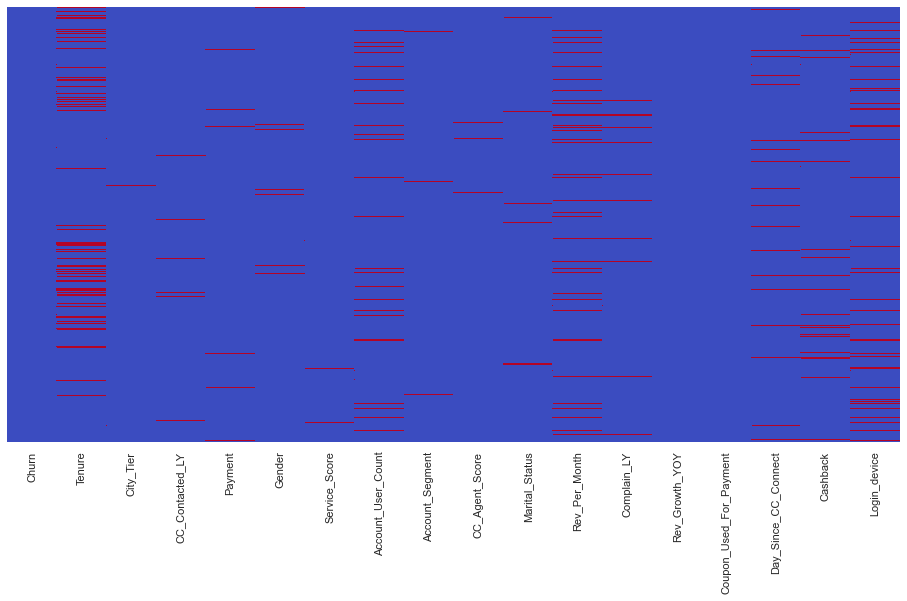

In [184]:
plt.figure(figsize = (16,8))
sns.heatmap(df.isnull(), cbar = False, cmap = 'coolwarm', yticklabels = False)
plt.show()

# Perform Univariate and Bivariate Analysis. Do exploratory data analysis. and Check for Outliers.

In [185]:
df.columns

Index(['Churn', 'Tenure', 'City_Tier', 'CC_Contacted_LY', 'Payment', 'Gender',
       'Service_Score', 'Account_User_Count', 'Account_Segment',
       'CC_Agent_Score', 'Marital_Status', 'Rev_Per_Month', 'Complain_LY',
       'Rev_Growth_YOY', 'Coupon_Used_For_Payment', 'Day_Since_CC_Connect',
       'Cashback', 'Login_device'],
      dtype='object')

In [186]:
cont_feature = ['Tenure', 'CC_Contacted_LY',  'Account_User_Count',  'Rev_Per_Month',
                 'Rev_Growth_YOY', 'Coupon_Used_For_Payment', 'Day_Since_CC_Connect','Cashback']
cat_features = ['Churn', 'City_Tier', 'Payment', 'Gender','Service_Score',  'Account_Segment', 'CC_Agent_Score',
                'Marital_Status',  'Complain_LY', 'Login_device']

## Univariate Analysis & Outliers Check

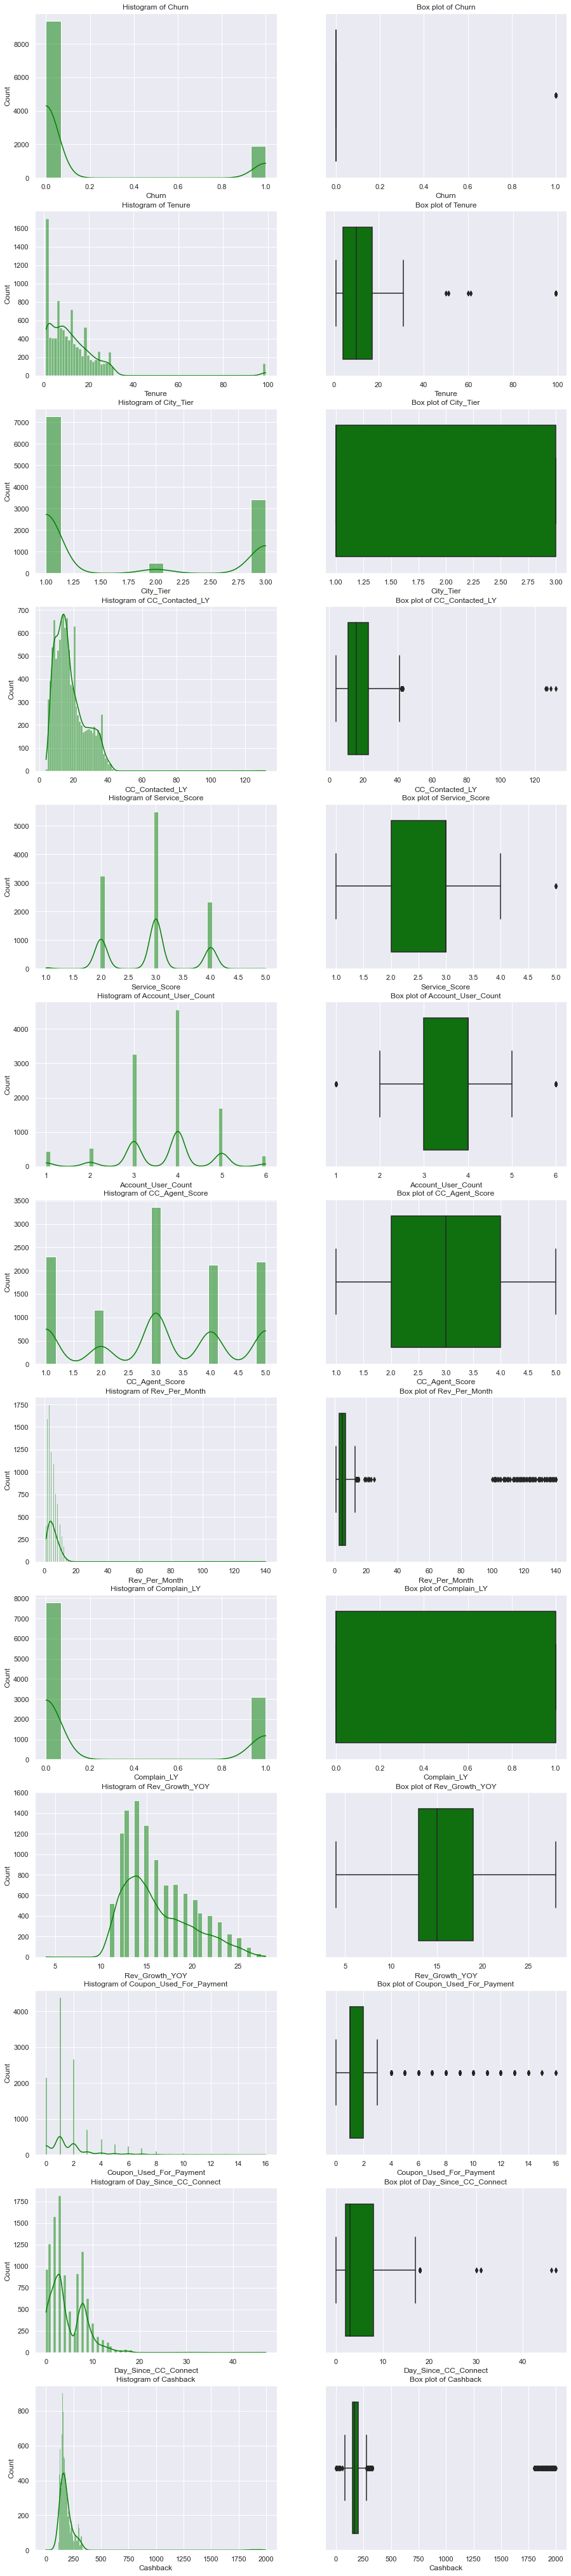

In [187]:
# Checking for Outliers
numeric_col_names=df.select_dtypes(exclude='object').columns
no_of_graphs_rows=2
# rows=calc_rows(numeric_col_names, no_of_graphs_rows)
rows=15
sns.set(font_scale=1)
plt.figure(figsize= (15,85))
plot_no=1
for col in df.columns :
    if (col in numeric_col_names):
        distplot_title = "Histogram of " + col
        plt.subplot(rows,no_of_graphs_rows,plot_no)
        sns.histplot(df[col] ,color='green',kde=True).set(title =distplot_title)
        plot_no = plot_no + 1 
        box_plot_title = "Box plot of " + col
        plt.subplot(rows,no_of_graphs_rows,plot_no)
        sns.boxplot(x= col,data =df ,color='green').set(title =box_plot_title)
        plot_no = plot_no + 1 



As evident from above plots :-


Churn
- Its a binary target attribute features
- No of accounts getting churned are very less as compared to the account not getting churned
- This target feature appears imbalanced

Tenure
- Its peak is coming for tenure as 0 to 1. It means new accounts with very less tenure are very high
- Tenure has long tight tail. It means some accounts have very high tenure as compared to others
- Tenure is positively skewed as its mean is greator than the median. 
- As evident from the box plot, it contains few outliers
- Kurtosis is positive i.e Leptokurtic distribution (kurtosis more than normal distribution)

City Tier
- Its a categorical feature where an account can be of Tier 1/2/3.
- Tier 2 city customer accounts are very less as compared to other 2 tiers.

CC_Contacted_LY (how many times Customer care contacted last year)
- It appears tha for majority of accounts, customer contacted for around 10-15 times.
- It also has a long right tail i.e. for some accounts customer care contacted them many times.
- Its positively skewed as mean is greator than the median
- As evidient from box plot, it contains outliers
- Kurtosis is positive i.e Leptokurtic distribution (kurtosis more than normal distribution)

Service Score
- Its a categorical features where customer gives rating from 1 to 5 to the DTH company
- Rating 5 which we have assumed to be the highest is given by very less customers. Hence it is showing as outlier
- Rating 3 is given by the majority of the customers


Account_User_count (count of users in account)
- Majority of the accounts have 3-4 users in them
- It is negatively skewed as mean is less than the median
- It does contain few outliers (i.e account with 1 and 6 users are very less)
- Kurtosis is positive i.e. Leptokurtic distribution (kurtosis more than normal distribution)

CC Agent Score (customer care satisfaction score given by customer)
- Its a categorical features where customer gives scores from 1 to 5 to the customer care of the company
- Rating 3 is given by the majority of the customers
- There are no outliers for this feature


Rev_Per_Month (average Revenue per month in last 12 months)
- Majority of the accounts have low average revenue per month
- It has long right tail which means few accounts have higher revenue
- It is positively skewed as its mean is greator than the median
- It contains lot of outliers on the upper limit side which means that for few accounts revenue is higher
- Kurtosis is positive i.e Leptokurtic distribution (kurtosis more than normal distribution)

Rev_Growth_YOY (revenue growth on year on year basis)
- Its peak is coming for 13-18 range i.e majority of account have 13%-18% year on year growth
- It has long tails on right and left i.e. few accounts with very less revenue growth and few accounts with very high revenue growth
- It is also slightly positively skewed
- It doesnt contains outliers
- Kurtosis is negative i.e Platykurtic distribution (kurtosis less than the normal distribution)

Complain_LY (Compaints by customer in last year)
- Its a binary attribute features
- No of accounts who have complaint are very less as compared to the account which have not raised any complaint last year.

Coupon_Used_For_Payemnt (how many time customer used coupon for payments)
- Peak is coming at around 1-2. It means for majority of the accounts, customer have used 1-2 times coupons for payments
- It also has a very long right tail which means some accounts have used lot of coupons for payment
- As evident from box plot, there are lot of outliers on the upper limit side i.e. few customers have used lot of coupons
- Its also positively skewed i.e mean greator than the median
- Kurtosis is positive i.e Leptokurtic distribution (kurtosis more than normal distribution)


Cashback (Monthly average cashback)
- Its distribution appears like a normal distribution
- Peak is coming at around 150 to 200. It means for majority of the accounts, monthly average cashback is 150 to 200.
- It also has a very long right tail which means some accounts have used lot of coupons for payment
- As evident from box plot, there are lot of outliers on the both lower and upper limit side i.e. few customers have taken less cashback and few have taken lot of cashback.
- Its also positively skewed i.e mean greator than the median
- Kurtosis is positive i.e Leptokurtic distribution (kurtosis more than normal distribution)


## Checking the unique values for categorical/object variables

#### Churn (Target Variable)

In [188]:
df.Churn.value_counts()

0    9364
1    1896
Name: Churn, dtype: int64

In [189]:
(df.Churn.value_counts(normalize=True) * 100 ).round(2)

0    83.16
1    16.84
Name: Churn, dtype: float64

We can see that the target Churn attribute is imbalanced with 83% data of accounts not getting churned and 17% data for accounts getting churned

In [190]:
for column in cat_features[1:]:
    print('Feature',column,'has',df[column].nunique(),'unique values')
    print('\n')
    print('Percentage counts of these unique values is as shown below :-')
    print('\n')
    print((df[column].value_counts(normalize=True) * 100) .round(2))
    print('\n')

Feature City_Tier has 3 unique values


Percentage counts of these unique values is as shown below :-


1.0    65.15
3.0    30.54
2.0     4.31
Name: City_Tier, dtype: float64


Feature Payment has 5 unique values


Percentage counts of these unique values is as shown below :-


Debit Card          41.14
Credit Card         31.49
E wallet            10.91
Cash on Delivery     9.09
UPI                  7.37
Name: Payment, dtype: float64


Feature Gender has 2 unique values


Percentage counts of these unique values is as shown below :-


Male      60.11
Female    39.89
Name: Gender, dtype: float64


Feature Service_Score has 5 unique values


Percentage counts of these unique values is as shown below :-


3.0    49.22
2.0    29.15
4.0    20.90
1.0     0.69
5.0     0.04
Name: Service_Score, dtype: float64


Feature Account_Segment has 5 unique values


Percentage counts of these unique values is as shown below :-


Regular Plus    36.94
Super           36.39
HNI             14.68
Super Pl

## Bi-variate analysis

In [191]:
cont_feature

['Tenure',
 'CC_Contacted_LY',
 'Account_User_Count',
 'Rev_Per_Month',
 'Rev_Growth_YOY',
 'Coupon_Used_For_Payment',
 'Day_Since_CC_Connect',
 'Cashback']

### Box Plots

[Text(0.5, 1.0, 'box plot of Churn & CC_Contacted_LY')]

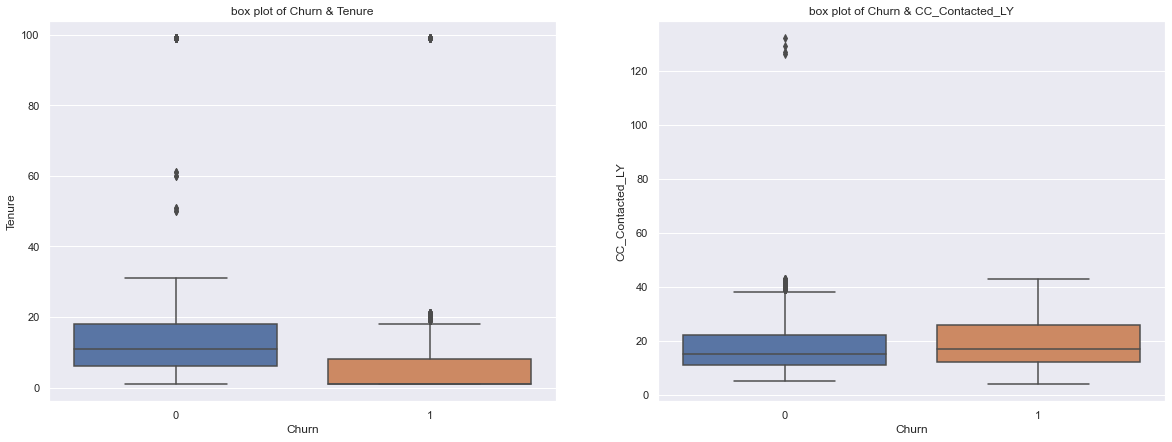

In [192]:
plt.figure(figsize=(20,7))
# sns.set(font_scale=2)
plt.subplot(1,2,1)
sns.boxplot(data=df,x='Churn', y='Tenure').set(title ='box plot of Churn & Tenure')
plt.subplot(1,2,2)
sns.boxplot(data=df,x='Churn', y='CC_Contacted_LY').set(title ='box plot of Churn & CC_Contacted_LY')


- We can see that the accounts with very less tenure (new accounts) churn more as compare to longer tenure account
- There doesnt seem much of difference in churn for feature CC_Contacted_LY i.e. how many time accounts have contacted customer care doesnt seems to have strong relationship with Churn

[Text(0.5, 1.0, 'box plot of Churn & Rev_Per_Month')]

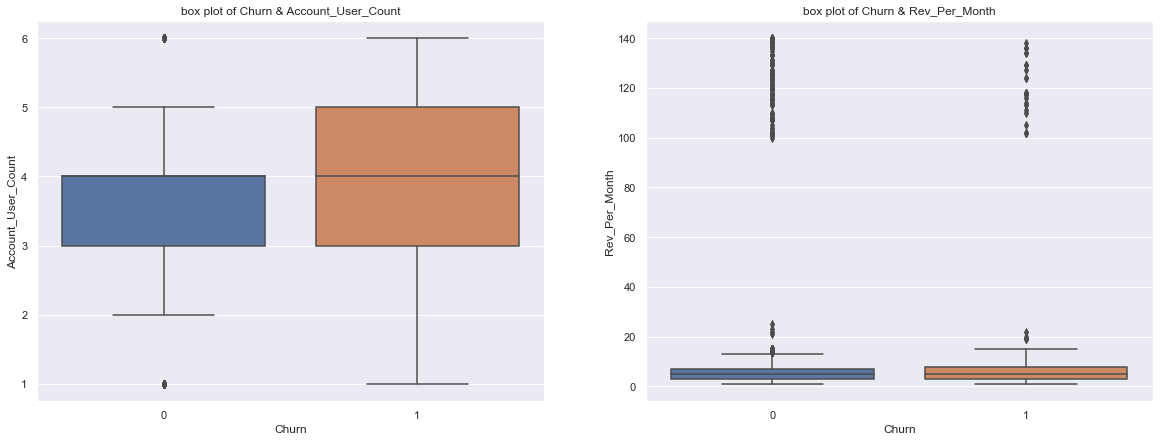

In [193]:
plt.figure(figsize=(20,7))
# sns.set(font_scale=2)
plt.subplot(1,2,1)
sns.boxplot(data=df,x='Churn', y='Account_User_Count').set(title ='box plot of Churn & Account_User_Count')
plt.subplot(1,2,2)
sns.boxplot(data=df,x='Churn', y='Rev_Per_Month').set(title ='box plot of Churn & Rev_Per_Month')


- We can see that the accounts with user count between 4 to 5 have higher chances of getting churned.
- There doesnt seem much of difference in churn for feature Rev_Per_Month i.e. monthly average revenue doesn't seems to have strong relationship with Churn

[Text(0.5, 1.0, 'box plot of Churn & Coupon_Used_For_Payment')]

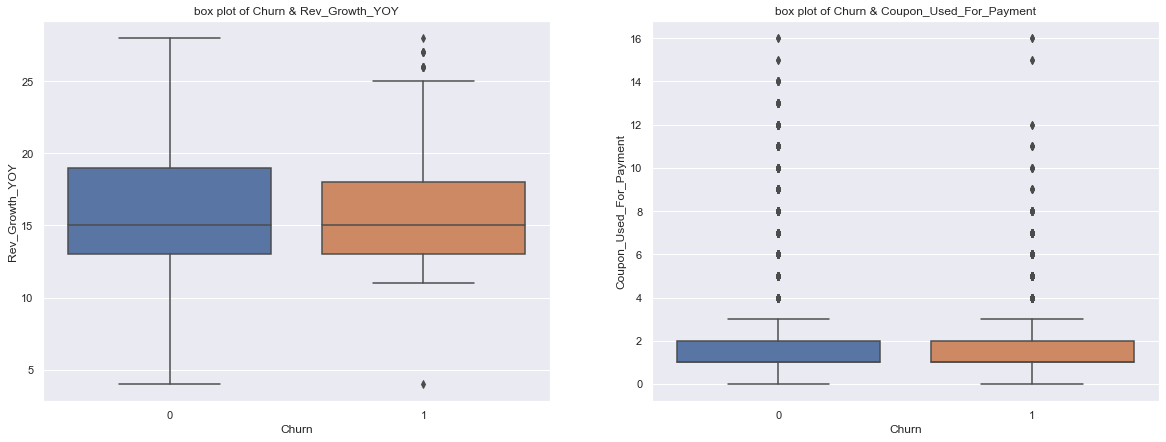

In [194]:
plt.figure(figsize=(20,7))
# sns.set(font_scale=2)
plt.subplot(1,2,1)
sns.boxplot(data=df,x='Churn', y='Rev_Growth_YOY').set(title ='box plot of Churn & Rev_Growth_YOY')
plt.subplot(1,2,2)
sns.boxplot(data=df,x='Churn', y='Coupon_Used_For_Payment').set(title ='box plot of Churn & Coupon_Used_For_Payment')


- There doesnt seem much of difference in churn for both these features Rev_Growth_YOY and Coupon_Used_For_Payment

[Text(0.5, 1.0, 'box plot of Churn & Cashback')]

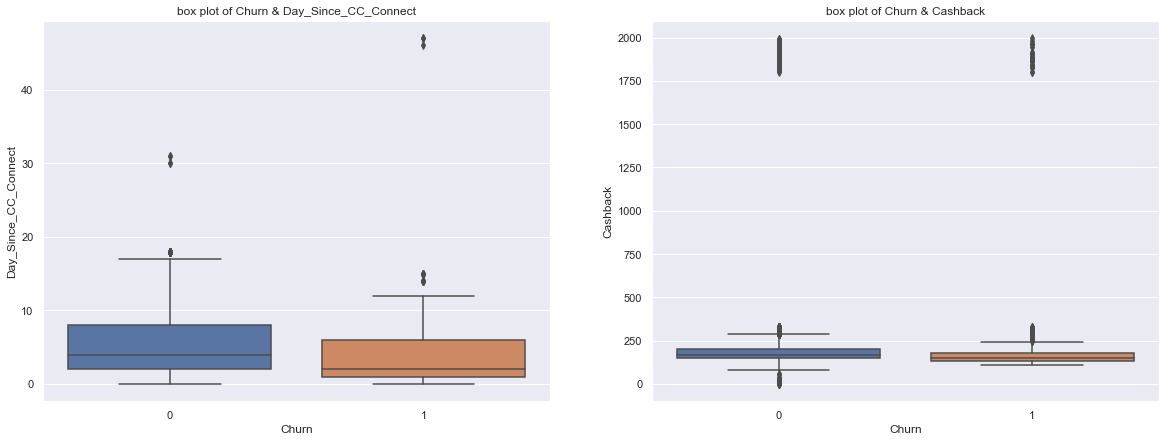

In [195]:
plt.figure(figsize=(20,7))
# sns.set(font_scale=2)
plt.subplot(1,2,1)
sns.boxplot(data=df,x='Churn', y='Day_Since_CC_Connect').set(title ='box plot of Churn & Day_Since_CC_Connect')
plt.subplot(1,2,2)
sns.boxplot(data=df,x='Churn', y='Cashback').set(title ='box plot of Churn & Cashback')


- Median of accounts getting churned is lower for feature Day_Since_CC_Connect. It means that customers are not calling/connecting with customer care of the DTH company and they are leaving the DTH company
- Accounts getting churned have slightly less monthly average cashback

### Count Plots

In [196]:
cat_features

['Churn',
 'City_Tier',
 'Payment',
 'Gender',
 'Service_Score',
 'Account_Segment',
 'CC_Agent_Score',
 'Marital_Status',
 'Complain_LY',
 'Login_device']

In [197]:
df.Churn.value_counts()

0    9364
1    1896
Name: Churn, dtype: int64

#### City_Tier vs Churn and Payment vs Churn bivariate analysis

<AxesSubplot:xlabel='Payment', ylabel='count'>

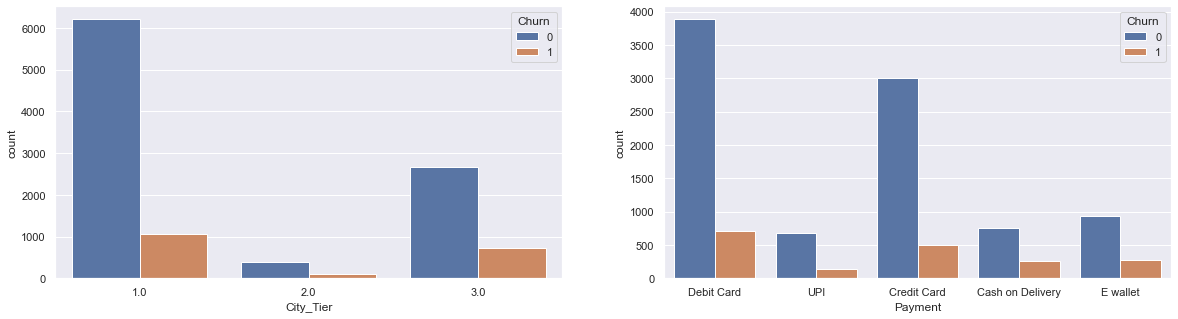

In [198]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.countplot(data=df,hue='Churn', x='City_Tier')
plt.subplot(1,2,2)
sns.countplot(data=df,hue='Churn', x='Payment')


In [199]:
pd.crosstab(df["Churn"],df["City_Tier"],margins=True,normalize='columns').round(2)


City_Tier   1.0  2.0   3.0   All
Churn                           
0          0.85  0.8  0.79  0.83
1          0.15  0.2  0.21  0.17

In [200]:
pd.crosstab(df["Churn"],df["Payment"],margins=True,normalize='columns').round(2)

Payment  Cash on Delivery  Credit Card  Debit Card  E wallet   UPI   All
Churn                                                                   
0                    0.75         0.86        0.85      0.77  0.83  0.83
1                    0.25         0.14        0.15      0.23  0.17  0.17

From above count plots and cross tab we can see that :-
- All City tiers have almost equal proportion of non churned account and churned accounts. 
- Regarding payment, Cash on Delivery and E-wallet have slightly higher churned accounts as compared to other payment modes
    

<AxesSubplot:xlabel='Service_Score', ylabel='count'>

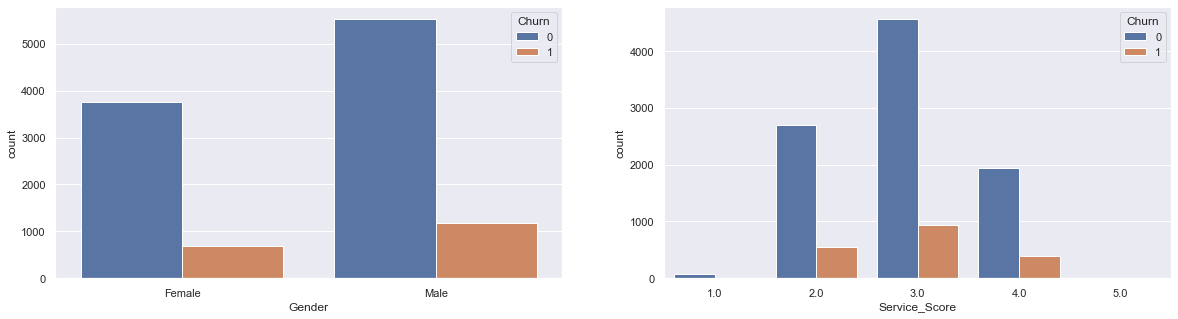

In [201]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.countplot(data=df,hue='Churn', x='Gender')
plt.subplot(1,2,2)
sns.countplot(data=df,hue='Churn', x='Service_Score')


In [202]:
pd.crosstab(df["Churn"],df["Gender"],margins=True,normalize='columns').round(2)


Gender  Female  Male   All
Churn                     
0         0.85  0.82  0.83
1         0.15  0.18  0.17

In [203]:
pd.crosstab(df["Churn"],df["Service_Score"],margins=True,normalize='columns').round(2)

Service_Score  1.0   2.0   3.0   4.0  5.0   All
Churn                                          
0              1.0  0.83  0.83  0.83  1.0  0.83
1              0.0  0.17  0.17  0.17  0.0  0.17

From above count plots and cross tab we can see that :-
- All Gender type appears to have similar proportion of non churned account vs churned accounts
- Regarding Service score, score of 1 and 5 have no churned account. However both these score were given by very few accounts (less than 1% of total accounts)

<AxesSubplot:xlabel='CC_Agent_Score', ylabel='count'>

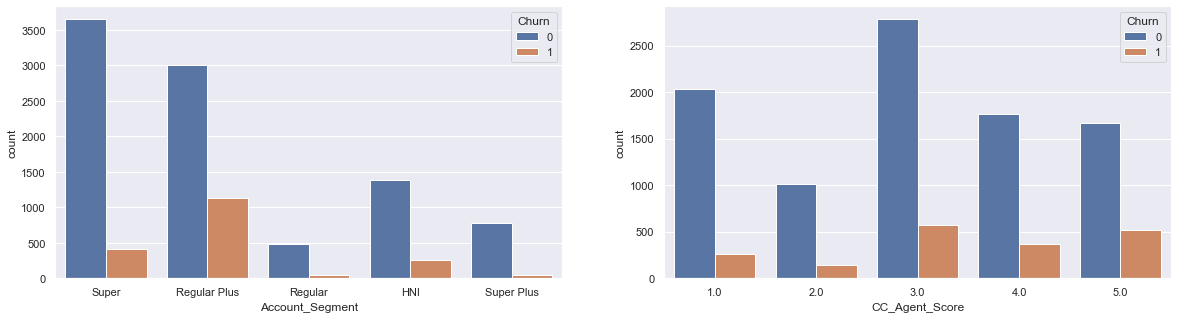

In [204]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.countplot(data=df,hue='Churn', x='Account_Segment')
plt.subplot(1,2,2)
sns.countplot(data=df,hue='Churn', x='CC_Agent_Score')


In [205]:
pd.crosstab(df["Churn"],df["Account_Segment"],margins=True,normalize='columns').round(2)


Account_Segment   HNI  Regular  Regular Plus  Super  Super Plus   All
Churn                                                                
0                0.84     0.92          0.73    0.9        0.95  0.83
1                0.16     0.08          0.27    0.1        0.05  0.17

In [206]:
pd.crosstab(df["Churn"],df["CC_Agent_Score"],margins=True,normalize='columns').round(2)

CC_Agent_Score   1.0   2.0   3.0   4.0   5.0   All
Churn                                             
0               0.89  0.87  0.83  0.83  0.76  0.83
1               0.11  0.13  0.17  0.17  0.24  0.17

From above count plots and cross tab we can see that :-
- Regular, Super and Super Plus have lower proportion of churned accounts.
- Regular Plus account segment have higher proportion of churned accounts.
- Regarding Service score, score of 5 have higher proprotion of churned accounts.

<AxesSubplot:xlabel='Complain_LY', ylabel='count'>

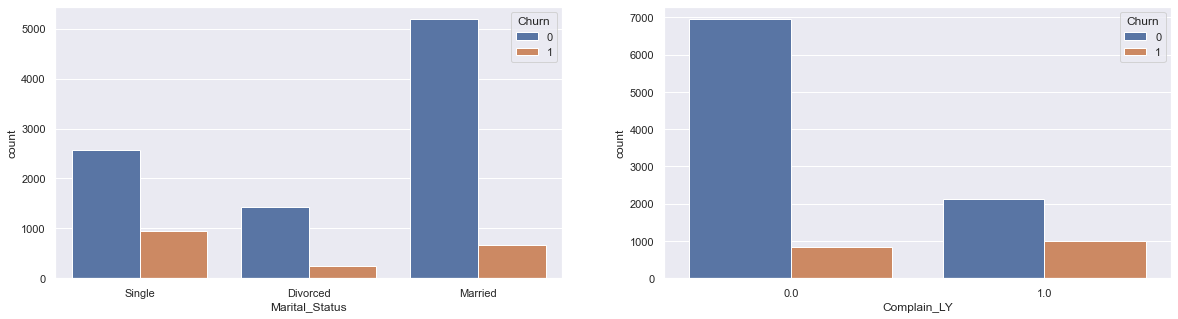

In [207]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.countplot(data=df,hue='Churn', x='Marital_Status')
plt.subplot(1,2,2)
sns.countplot(data=df,hue='Churn', x='Complain_LY')


In [208]:
pd.crosstab(df["Churn"],df["Marital_Status"],margins=True,normalize='columns').round(2)


Marital_Status  Divorced  Married  Single   All
Churn                                          
0                   0.85     0.89    0.73  0.83
1                   0.15     0.11    0.27  0.17

In [209]:
pd.crosstab(df["Churn"],df["Complain_LY"],margins=True,normalize='columns').round(2)

Complain_LY   0.0   1.0   All
Churn                        
0            0.89  0.68  0.83
1            0.11  0.32  0.17

From above count plots and cross tab we can see that :-
- Single marital status have higher proportion of churned accounts.
- Customer who have complained last year, have very high proportion (32%) of churend accounts.

<AxesSubplot:xlabel='Login_device', ylabel='count'>

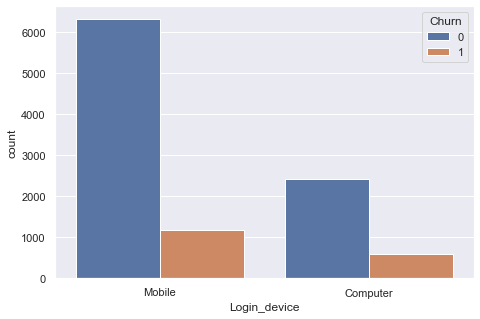

In [210]:
plt.figure(figsize=(7.5,5))
sns.countplot(data=df,hue='Churn', x='Login_device')

In [211]:
pd.crosstab(df["Churn"],df["Login_device"],margins=True,normalize='columns').round(2)

Login_device  Computer  Mobile   All
Churn                               
0                  0.8    0.84  0.83
1                  0.2    0.16  0.17

Login device doesnt seems to have much impact on the account getting churned.

## Outlier Treatment (Flooring and Capping)

#### Visualizing Outliers before treatment

<ipython-input-212-eb3da24e25a1>:3: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  splot.set(Title = 'Box plot for outliers')


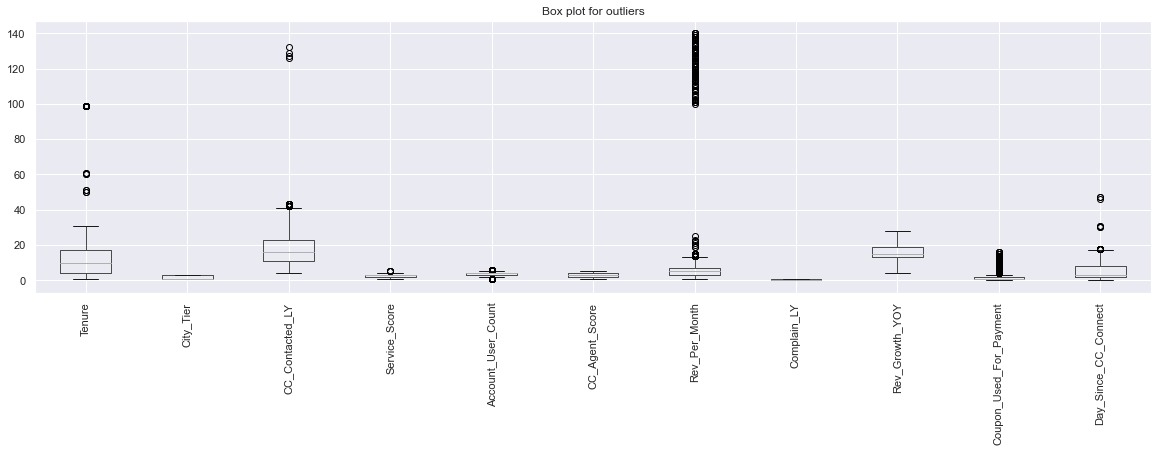

In [212]:
plt.figure(figsize = (20,5))
splot=df[numeric_col_names[1:-1]].boxplot()
splot.set(Title = 'Box plot for outliers')

# rotating the x axis labels
for item in splot.get_xticklabels():
    item.set_rotation(90)

[Text(0.5, 1.0, 'box plot of Cashback for outliers')]

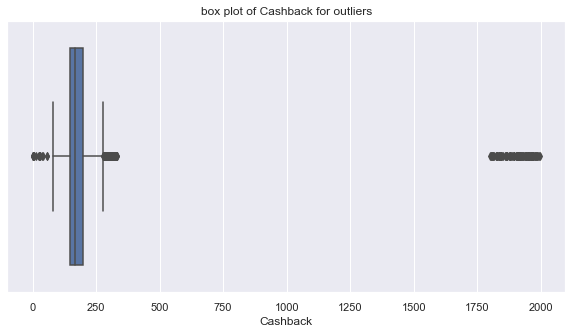

In [213]:
plt.figure(figsize = (10,5))
sns.boxplot(data=df,x='Cashback').set(title ='box plot of Cashback for outliers')


In [214]:
df_bkp1 = df.copy()

Running outlier on backup dataset to check the outlier count and percentages for various numeric features

In [215]:
df_bkp1,df_outlier_summary=Outlier_treatment(df_bkp1,numeric_col_names[1:])

In [216]:
df_outlier_summary

Feature     LR  Min  Outlier_Lesser_LR      UR     Max  \
0                    Tenure -15.50  1.0                  0   36.50    99.0   
1                 City_Tier  -2.00  1.0                  0    6.00     3.0   
2           CC_Contacted_LY  -7.00  4.0                  0   41.00   132.0   
3             Service_Score   0.50  1.0                  0    4.50     5.0   
4        Account_User_Count   1.50  1.0                446    5.50     6.0   
5            CC_Agent_Score  -1.00  1.0                  0    7.00     5.0   
6             Rev_Per_Month  -3.00  1.0                  0   13.00   140.0   
7               Complain_LY  -1.50  0.0                  0    2.50     1.0   
8            Rev_Growth_YOY   4.00  4.0                  0   28.00    28.0   
9   Coupon_Used_For_Payment  -0.50  0.0                  0    3.50    16.0   
10     Day_Since_CC_Connect  -7.00  0.0                  0   17.00    47.0   
11                 Cashback  68.01  0.0                 20  279.21  1997.0   

    Outlier_Greator_UR  Total_Outliers_Count  Total_Outliers_Percentage  
0                  139                   139                       1.42  
1                    0                     0                       0.00  
2                   42                    42                       0.38  
3                    5                     5                       0.04  
4                  315                   761                       7.04  
5                    0                     0                       0.00  
6                  185                   185                       1.77  
7                    0                     0                       0.00  
8                    0                     0                       0.00  
9                 1380                  1380                      12.26  
10                  33                    33                       0.30  
11                 859                   879                       8.15

From the above outliers table created using flooring and capping technique, we can see that

- Except Account_User_Count and Cashback, all features have outliers on the higher side of the upper range
- For Account_User_Count, min value is 1 and Lower Range is 1.5. Since it would not make sense to have 1.5 users in an account, we are keeping LR as 1 only here. Thus flooring is not required for this feature
- For Account_User_Count, max value is 6 and Upper Range is 5.5. Since it would not make sense to have 5.5 users in an account, we are keeping UR as 6 only here. Thus Capping is not required for this feature
- Similarly for Service_Score feautre UR is 4.5 and max value is 5. So if we round it off to 5 then no treatment is required for this feature.
- For Coupon_Used_For_Payment and Cashback features, outlier percentage is 12% and 8% respectively which is quite high.
- So now flooring is required for only 1 features :-
    - Cashback
- Capping is required for following featues :-
    - Tenure
    - CC_Contacted_LY
    - Rev_Per_Month
    - Coupon_Used_For_Payment
    - Day_Since_CC_Connect	
    - Cashback
    

In [217]:
outlier_treatment_feature = ['Tenure','CC_Contacted_LY','Rev_Per_Month','Coupon_Used_For_Payment','Day_Since_CC_Connect','Cashback']

In [218]:
df,df_outlier_summary_post_OT=Outlier_treatment(df,outlier_treatment_feature)

#### Visualizing Outliers after treatment

<ipython-input-219-eb3da24e25a1>:3: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  splot.set(Title = 'Box plot for outliers')


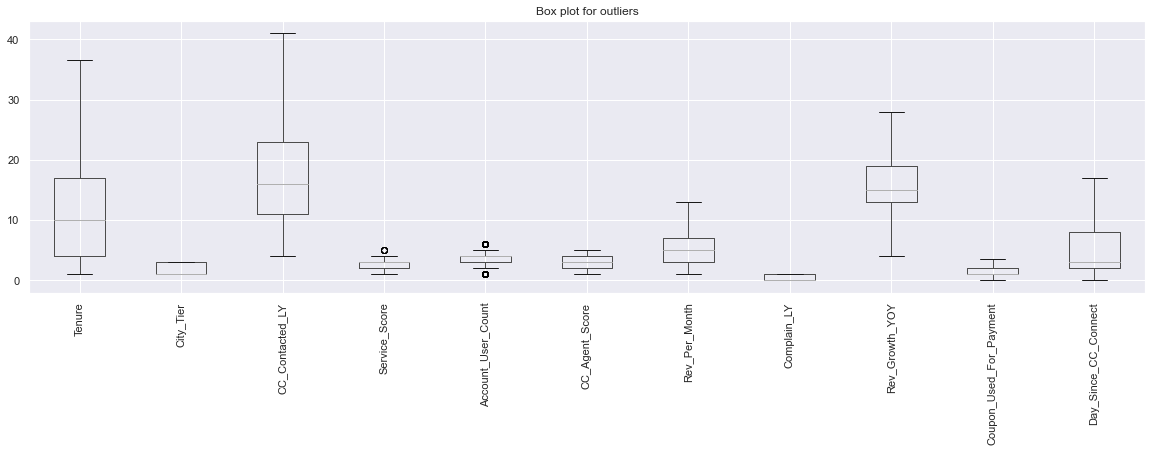

In [219]:
plt.figure(figsize = (20,5))
splot=df[numeric_col_names[1:-1]].boxplot()
splot.set(Title = 'Box plot for outliers')

# rotating the x axis labels
for item in splot.get_xticklabels():
    item.set_rotation(90)

[Text(0.5, 1.0, 'box plot of Cashback for outliers')]

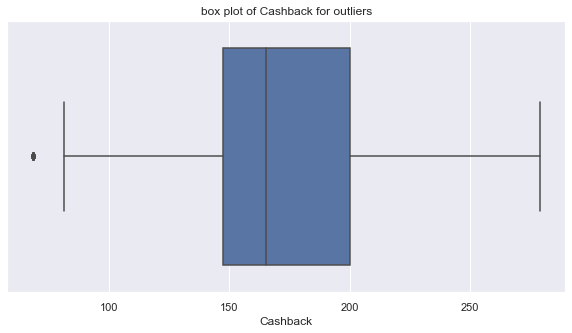

In [220]:
plt.figure(figsize = (10,5))
sns.boxplot(data=df,x='Cashback').set(title ='box plot of Cashback for outliers')


Now we can see visually that apart from 2-3 places where outliers are near to lower/upper range all other outliers have been removed.

In [221]:
df.Cashback.describe()

count    10787.000000
mean       178.457283
std         45.880067
min         68.010000
25%        147.210000
50%        165.250000
75%        200.010000
max        279.210000
Name: Cashback, dtype: float64

In [222]:
df.to_csv('df_bef_impute.csv',index=False)

### Missing Value Treatment

In [223]:
missing_check(df)

Total  Percent
Tenure                    1449    12.87
Rev_Per_Month              791     7.02
Login_device               760     6.75
Cashback                   473     4.20
Account_User_Count         444     3.94
Day_Since_CC_Connect       358     3.18
Complain_LY                357     3.17
Marital_Status             212     1.88
CC_Agent_Score             116     1.03
City_Tier                  112     0.99
Payment                    109     0.97
Gender                     108     0.96
Service_Score              106     0.94
CC_Contacted_LY            102     0.91
Account_Segment             97     0.86
Rev_Growth_YOY               3     0.03
Coupon_Used_For_Payment      3     0.03
Churn                        0     0.00

Outlier treatment needs to be performed first as outliers impact the mean of the features. Since outlier treatment is now done, we can use missing value imputation technique

We are using KNN imputer to impute the missing values for numerical features and for categorical features we will be using modal value to replace the missing values

#### Imputing categorical feature missing value with the mode value

In [224]:
object_col_names=df.select_dtypes(include='object').columns
object_col_names

Index(['Payment', 'Gender', 'Account_Segment', 'Marital_Status',
       'Login_device'],
      dtype='object')

In [225]:
missing_check(df[object_col_names])

Total  Percent
Login_device       760     6.75
Marital_Status     212     1.88
Payment            109     0.97
Gender             108     0.96
Account_Segment     97     0.86

In [226]:
for col in object_col_names:
    print (col,df[col].mode())
    df[col].replace(np.nan,df[col].mode().values[0],inplace=True)

Payment 0    Debit Card
dtype: object
Gender 0    Male
dtype: object
Account_Segment 0    Regular Plus
dtype: object
Marital_Status 0    Married
dtype: object
Login_device 0    Mobile
dtype: object


In [101]:
missing_check(df[object_col_names])

Total  Percent
Payment              0      0.0
Gender               0      0.0
Account_Segment      0      0.0
Marital_Status       0      0.0
Login_device         0      0.0

We can see that the categorical features have been imputed with their Modal values and now no missing values are present

### KNN Imputer

For K nearest neigbhour imputer, we first need to encode the non numeric data to the numeric data

#### Encoding for Categorical features

In [102]:
df.Account_Segment.value_counts()

Regular Plus    4221
Super           4062
HNI             1639
Super Plus       818
Regular          520
Name: Account_Segment, dtype: int64

We have total of 5 object features :-
    
    1) Payment : Mode of payment for customers. Its a nominal categorical feature where there is no order or ranking in it. 
    2) Gender : Gender of primary customer. Its again a nominal categorical feature
    3) Account_Segment: These are account segment of customer on the basis of their spend. There is an order in it. So this is ordinal feature
    4) Marital_Status : Marital status of primary customer (Single/Married/Divorced). Its a nominal feature
    5) Login_device : Preferred Login device(Mobile/Computer) of primary customer. Its a nominal feature.

Due to the presence of missing value, we are label encoding all these features

#### Encoding Features using label encoding 

Account_segment feature contains different segement on the basis of spend of the customers. As no order is mentioned that which segment is spending more or less. So we have assumed the following order in increasing order of spend :-

  Regular -> 1

  Regular Plus -> 2
  
  Super -> 3
  
  Super Plus -> 4
  
  HNI -> 5

In [103]:
# replacing account segement to their numeric values
df.Account_Segment = df.Account_Segment.replace('Regular',1).replace('Regular Plus',2).replace('Super',3).replace('Super Plus',4).replace('HNI',5) 

In [104]:
# Converting it to numeric feature
df.Account_Segment = df.Account_Segment.astype('int')

### One hot encoding using get_dummies

**Drop First is used to ensure that multiple columns created based on the levels of categorical variable are not included else it will result in to multicollinearity . This is done to ensure that we do not land in to dummy trap.**

In [105]:
cat1 = object_col_names.drop(['Account_Segment'])

In [106]:
df =pd.get_dummies(df, columns=cat1,drop_first=True)

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Churn                    11260 non-null  int64  
 1   Tenure                   9811 non-null   float64
 2   City_Tier                11148 non-null  float64
 3   CC_Contacted_LY          11158 non-null  float64
 4   Service_Score            11154 non-null  float64
 5   Account_User_Count       10816 non-null  float64
 6   Account_Segment          11260 non-null  int32  
 7   CC_Agent_Score           11144 non-null  float64
 8   Rev_Per_Month            10469 non-null  float64
 9   Complain_LY              10903 non-null  float64
 10  Rev_Growth_YOY           11257 non-null  float64
 11  Coupon_Used_For_Payment  11257 non-null  float64
 12  Day_Since_CC_Connect     10902 non-null  float64
 13  Cashback                 10787 non-null  float64
 14  Payment_Credit Card   

We can see that all the features are numerical in nature now

In [108]:
df_bkp2 = df.copy()

#### Segregate the predictors and response 

In [109]:
df.select_dtypes(include='uint8').columns

Index(['Payment_Credit Card', 'Payment_Debit Card', 'Payment_E wallet',
       'Payment_UPI', 'Gender_Male', 'Marital_Status_Married',
       'Marital_Status_Single', 'Login_device_Mobile'],
      dtype='object')

In [110]:
predictors = df.drop(['Payment_Credit Card', 'Payment_Debit Card', 'Payment_E wallet', 'Payment_UPI', 'Gender_Male',
                      'Marital_Status_Married','Marital_Status_Single', 'Login_device_Mobile','Churn'], axis = 1)
response = df[['Payment_Credit Card', 'Payment_Debit Card', 'Payment_E wallet', 'Payment_UPI', 'Gender_Male',
                      'Marital_Status_Married','Marital_Status_Single', 'Login_device_Mobile','Churn']]

#### Scale the predictors 

In [111]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_predictors = pd.DataFrame(scaler.fit_transform(predictors), columns = predictors.columns)

In [112]:
df1 = pd.concat([scaled_predictors, response], axis = 1)

In [113]:
df1.head()

Tenure  City_Tier  CC_Contacted_LY  Service_Score  Account_User_Count  \
0 -0.870626   1.471157        -1.375600       0.132189           -0.677332   
1       NaN  -0.714697        -1.143070       0.132189            0.300253   
2       NaN  -0.714697         1.414758      -1.253556            0.300253   
3       NaN   1.471157        -0.329216      -1.253556            0.300253   
4       NaN  -0.714697        -0.678011      -1.253556           -0.677332   

   Account_Segment  CC_Agent_Score  Rev_Per_Month  Complain_LY  \
0         0.094301       -0.772983       1.249484     1.582612   
1        -0.817139       -0.048194       0.579565     1.582612   
2        -0.817139       -0.048194       0.244605     1.582612   
3         0.094301        1.401386       0.914524    -0.631867   
4        -0.817139        1.401386      -0.760274    -0.631867   

   Rev_Growth_YOY  ...  Cashback  Payment_Credit Card  Payment_Debit Card  \
0       -1.382120  ... -0.403839                    0                   1   
1       -0.317598  ... -1.254574                    0                   0   
2       -0.583728  ...       NaN                    0                   1   
3        1.811447  ... -0.967508                    0                   1   
4       -1.382120  ... -1.064941                    1                   0   

   Payment_E wallet  Payment_UPI  Gender_Male  Marital_Status_Married  \
0                 0            0            0                       0   
1                 0            1            1                       0   
2                 0            0            1                       0   
3                 0            0            1                       0   
4                 0            0            1                       0   

   Marital_Status_Single  Login_device_Mobile  Churn  
0                      1                    1      1  
1                      1                    1      1  
2                      1                    1      1  
3                      1                    1      1  
4                      1                    1      1  

[5 rows x 22 columns]

#### Imputing the remaining missing values

In [114]:
from sklearn.impute import KNNImputer

In [115]:
imputer = KNNImputer(n_neighbors=10)

In [116]:
df_imputed = pd.DataFrame(imputer.fit_transform(df1), columns = df1.columns)

In [117]:
df_imputed.isnull().sum()

Tenure                     0
City_Tier                  0
CC_Contacted_LY            0
Service_Score              0
Account_User_Count         0
Account_Segment            0
CC_Agent_Score             0
Rev_Per_Month              0
Complain_LY                0
Rev_Growth_YOY             0
Coupon_Used_For_Payment    0
Day_Since_CC_Connect       0
Cashback                   0
Payment_Credit Card        0
Payment_Debit Card         0
Payment_E wallet           0
Payment_UPI                0
Gender_Male                0
Marital_Status_Married     0
Marital_Status_Single      0
Login_device_Mobile        0
Churn                      0
dtype: int64

We can see that no missing values are there

#### Let's visually inspect the missing values again our data

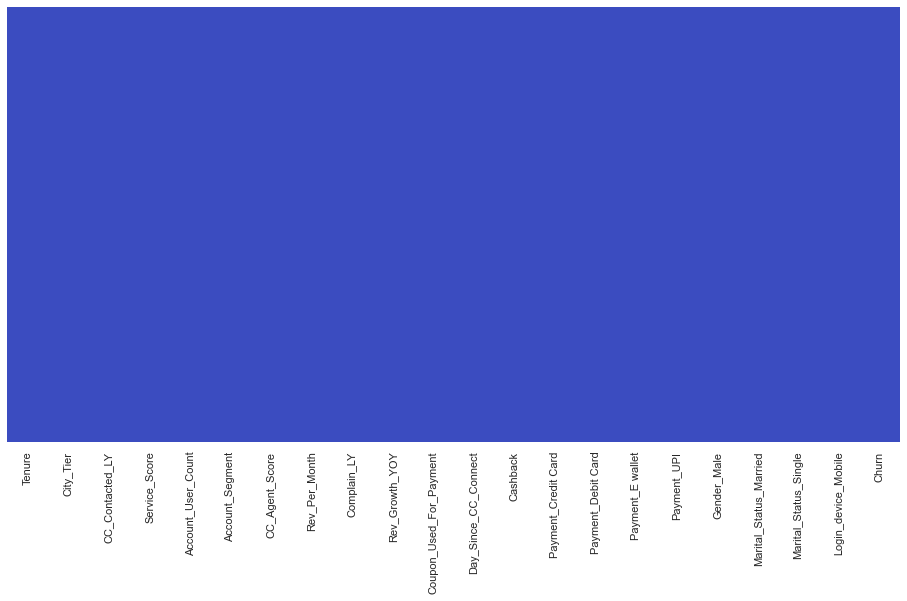

In [118]:
plt.figure(figsize = (16,8))
sns.heatmap(df_imputed.isnull(), cbar = False, cmap = 'coolwarm', yticklabels = False)
plt.show()

We can see that no missing values are there


### Correlation matrix for numeric features

In [119]:
numeric_col_names

Index(['Churn', 'Tenure', 'City_Tier', 'CC_Contacted_LY', 'Service_Score',
       'Account_User_Count', 'CC_Agent_Score', 'Rev_Per_Month', 'Complain_LY',
       'Rev_Growth_YOY', 'Coupon_Used_For_Payment', 'Day_Since_CC_Connect',
       'Cashback'],
      dtype='object')

In [120]:
Cor=df_imputed[numeric_col_names].corr().round(2)
Cor

Churn  Tenure  City_Tier  CC_Contacted_LY  \
Churn                     1.00   -0.27       0.08             0.08   
Tenure                   -0.27    1.00      -0.06            -0.03   
City_Tier                 0.08   -0.06       1.00             0.01   
CC_Contacted_LY           0.08   -0.03       0.01             1.00   
Service_Score             0.01   -0.06      -0.01             0.06   
Account_User_Count        0.11   -0.06       0.03             0.02   
CC_Agent_Score            0.11   -0.01      -0.01             0.01   
Rev_Per_Month             0.04    0.18      -0.03             0.07   
Complain_LY               0.25   -0.02       0.00             0.03   
Rev_Growth_YOY           -0.01    0.01      -0.03             0.07   
Coupon_Used_For_Payment  -0.02    0.06       0.03             0.01   
Day_Since_CC_Connect     -0.16    0.14       0.02             0.02   
Cashback                 -0.15    0.40       0.07             0.02   

                         Service_Score  Account_User_Count  CC_Agent_Score  \
Churn                             0.01                0.11            0.11   
Tenure                           -0.06               -0.06           -0.01   
City_Tier                        -0.01                0.03           -0.01   
CC_Contacted_LY                   0.06                0.02            0.01   
Service_Score                     1.00                0.32            0.03   
Account_User_Count                0.32                1.00           -0.02   
CC_Agent_Score                    0.03               -0.02            1.00   
Rev_Per_Month                     0.13                0.07            0.05   
Complain_LY                       0.00                0.00           -0.03   
Rev_Growth_YOY                    0.10                0.07           -0.03   
Coupon_Used_For_Payment           0.28                0.21            0.02   
Day_Since_CC_Connect              0.10                0.04            0.03   
Cashback                          0.15                0.13            0.00   

                         Rev_Per_Month  Complain_LY  Rev_Growth_YOY  \
Churn                             0.04         0.25           -0.01   
Tenure                            0.18        -0.02            0.01   
City_Tier                        -0.03         0.00           -0.03   
CC_Contacted_LY                   0.07         0.03            0.07   
Service_Score                     0.13         0.00            0.10   
Account_User_Count                0.07         0.00            0.07   
CC_Agent_Score                    0.05        -0.03           -0.03   
Rev_Per_Month                     1.00        -0.02            0.05   
Complain_LY                      -0.02         1.00           -0.00   
Rev_Growth_YOY                    0.05        -0.00            1.00   
Coupon_Used_For_Payment           0.07        -0.01            0.05   
Day_Since_CC_Connect             -0.06        -0.04            0.00   
Cashback                          0.18         0.01            0.02   

                         Coupon_Used_For_Payment  Day_Since_CC_Connect  \
Churn                                      -0.02                 -0.16   
Tenure                                      0.06                  0.14   
City_Tier                                   0.03                  0.02   
CC_Contacted_LY                             0.01                  0.02   
Service_Score                               0.28                  0.10   
Account_User_Count                          0.21                  0.04   
CC_Agent_Score                              0.02                  0.03   
Rev_Per_Month                               0.07                 -0.06   
Complain_LY                                -0.01                 -0.04   
Rev_Growth_YOY                              0.05                  0.00   
Coupon_Used_For_Payment                     1.00                  0.36   
Day_Since_CC_Connect                        0.36                  1.

### Heat Map

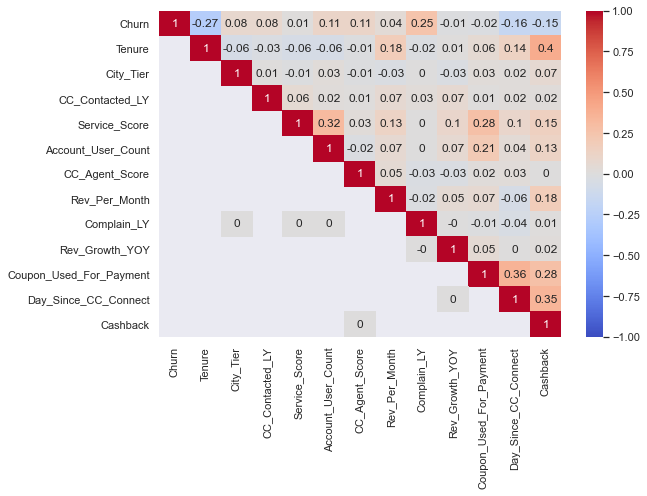

In [121]:
# plot the correlation coefficients as a heatmap
## Correlation Matrix
sns.set(font_scale=1)
plt.figure(figsize=(9 ,6))
mask = np.array(Cor)
mask[np.triu_indices_from(mask)] =False
sns.heatmap(data =Cor, annot =True, mask =mask,vmax =1, vmin=-1, cmap ='coolwarm');

Following correlations can be seen in heatmap & correlation matrix :-

Among Dependent and Independent Features :-
  - Churn is positively correlated with the Comlain last year feature. As complaints last year increases, Churn also increases.
  - Churn is negatively correlated with Tenure , Day_since_CC_Connect, Cashback. Churn is less if there is increase in value for these features
  
Among independent features correlations :-
  - Tenure is positively correlated with Cashback i.e. higher is tenure higher is cashback and vice verse
  - Tenure has a slight positive correlation with the Days since last customer care connect
  - Service score is positively correlated with Account_User_count and Coupon used for Payment feature
  - Days since customer care feature is positively correlated with the Cashback

### Pairplot for continuous features with Churn (Target)

In [125]:
pairplot_feature = ['Churn','Tenure',  'CC_Contacted_LY',  'Account_User_Count',  'Rev_Per_Month',  'Rev_Growth_YOY',
                     'Coupon_Used_For_Payment',  'Day_Since_CC_Connect',  'Cashback']

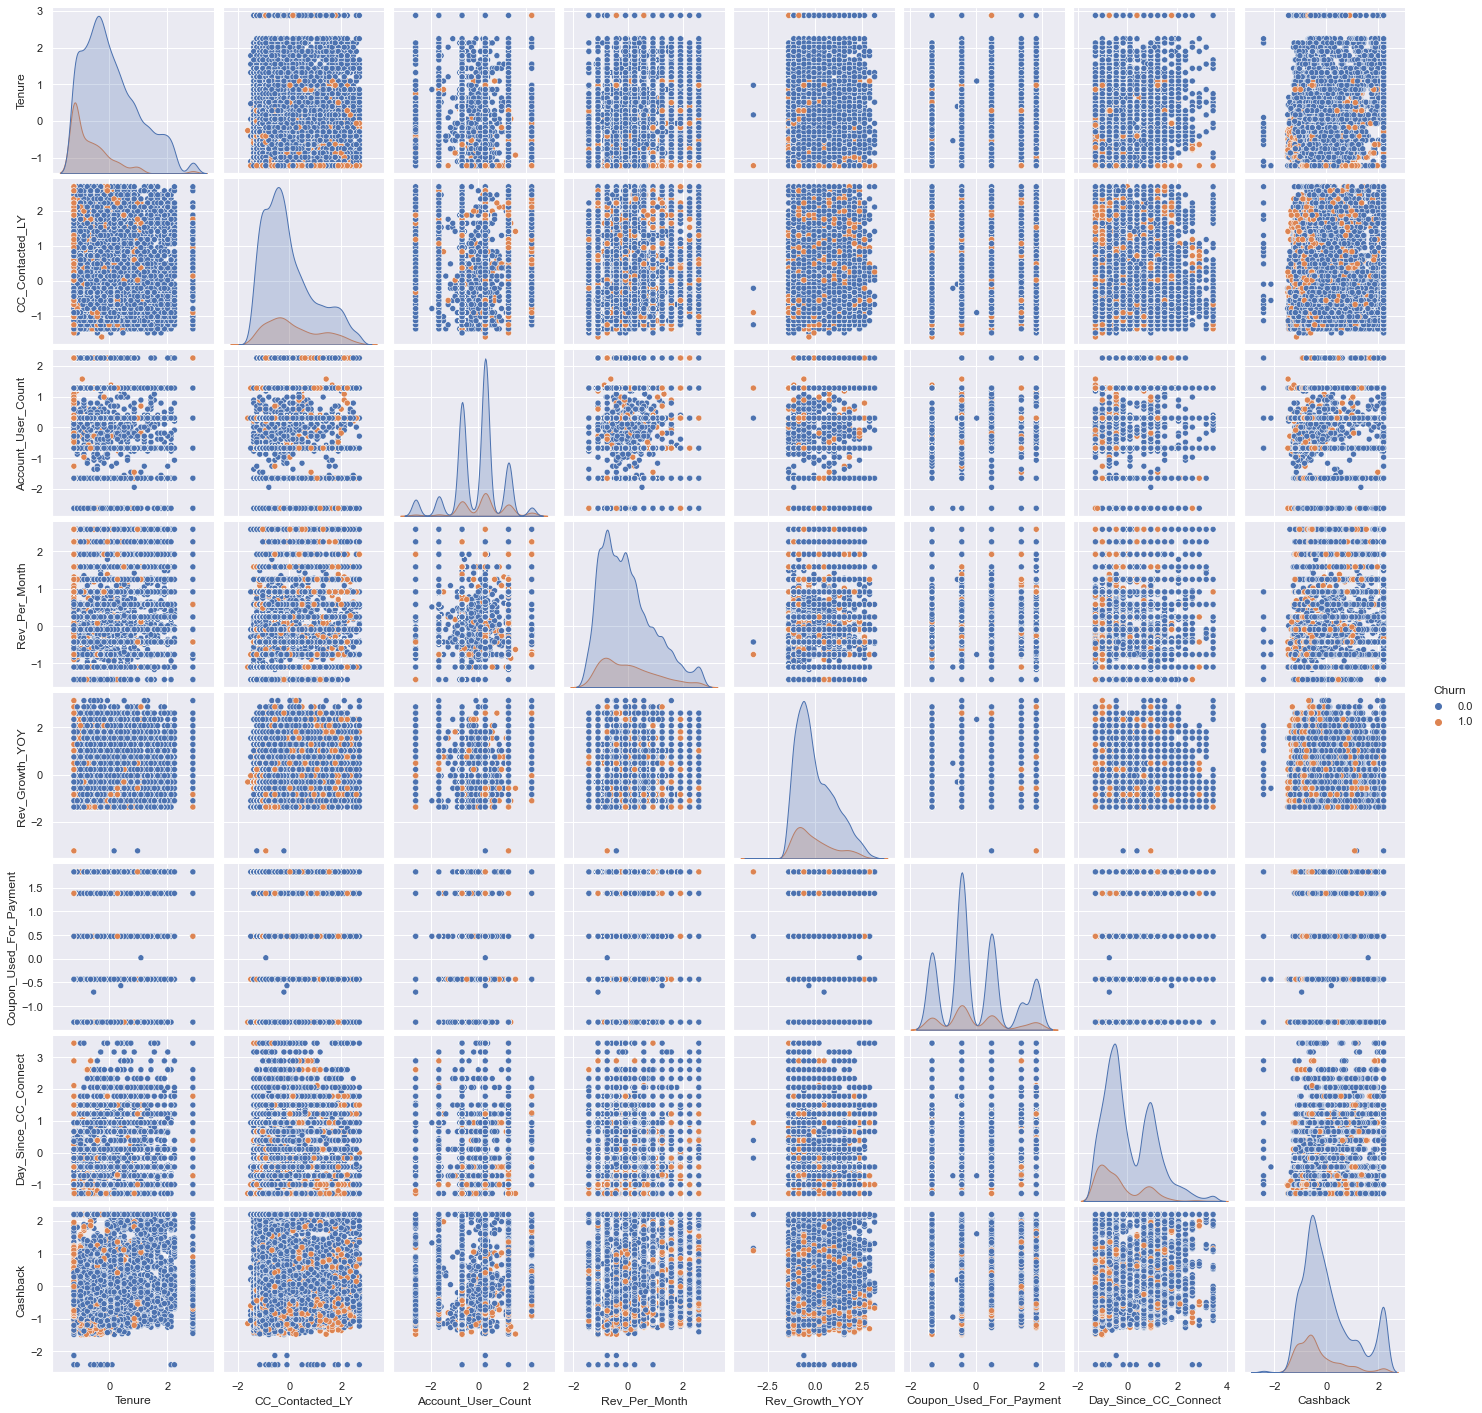

In [126]:
sns.pairplot (df_imputed[pairplot_feature],diag_kind='kde',hue='Churn')

In pairplot we are not able to visually notice any strong correlations

- We can see slight positive correlation in Cashback and Tenure
- We can see slight positive correlation in Tenure and DAsy since CC Connect

## Feature Engineering

Feature AccountID has already been dropped from the analysis as its a unique field for each row and it was not required for further analysis

#### Is_COD_Ewallet feature creation

As per EDA, we found that Cash on Delivery and E-wallet have slightly higher churned accounts as compared to other payment modes
so we are creating a new feature Is_COD_Ewallet which will be true(1) if payment is Cash on Delivery or E-Wallet

In [121]:
df_imputed

Tenure  City_Tier  CC_Contacted_LY  Service_Score  \
0     -0.870626   1.471157        -1.375600       0.132189   
1     -0.789996  -0.714697        -1.143070       0.132189   
2     -0.674809  -0.714697         1.414758      -1.253556   
3     -0.686328   1.471157        -0.329216      -1.253556   
4     -0.824552  -0.714697        -0.678011      -1.253556   
...         ...        ...              ...            ...   
11255 -0.179507  -0.714697         1.879818       0.132189   
11256  0.166052  -0.714697         0.135844       0.132189   
11257 -1.216186  -0.714697        -0.445481       0.132189   
11258  1.317918   1.471157        -0.794275       1.517933   
11259 -0.409880  -0.714697         0.484639       0.132189   

       Account_User_Count  Account_Segment  CC_Agent_Score  Rev_Per_Month  \
0               -0.677332         0.094301       -0.772983       1.249484   
1                0.300253        -0.817139       -0.048194       0.579565   
2                0.300253        -0.817139       -0.048194       0.244605   
3                0.300253         0.094301        1.401386       0.914524   
4               -0.677332        -0.817139        1.401386      -0.760274   
...                   ...              ...             ...            ...   
11255           -1.654917         0.094301       -1.497773       1.249484   
11256            1.277838         1.917181        1.401386       0.579565   
11257           -1.654917         0.094301        0.676596       0.579565   
11258            1.277838         0.094301        0.676596       0.579565   
11259           -1.654917         0.094301       -0.048194      -0.090355   

       Complain_LY  Rev_Growth_YOY  ...  Cashback  Payment_Credit Card  \
0         1.582612       -1.382120  ... -0.403839                  0.0   
1         1.582612       -0.317598  ... -1.254574                  0.0   
2         1.582612       -0.583728  ... -0.598180                  0.0   
3        -0.631867        1.811447  ... -0.967508                  0.0   
4        -0.631867       -1.382120  ... -1.064941                  1.0   
...            ...             ...  ...       ...                  ...   
11255    -0.631867        0.746924  ... -0.539416                  1.0   
11256    -0.631867       -0.051467  ...  1.056122                  1.0   
11257     1.582612        1.545316  ...  0.282548                  0.0   
11258    -0.631867       -0.051467  ...  0.031447                  1.0   
11259    -0.631867       -0.849859  ... -0.074486                  1.0   

       Payment_Debit Card  Payment_E wallet  Payment_UPI  Gender_Male  \
0                     1.0               0.0          0.0          0.0   
1                     0.0               0.0          1.0          1.0   
2                     1.0               0.0          0.0          1.0   
3                     1.0               0.0          0.0          1.0   
4                     0.0               0.0          0.0          1.0   
...                   ...               ...          ...          ...   
11255                 0.0               0.0          0.0          1.0   
11256                 0.0               0.0          0.0          1.0   
11257                 1.0               0.0          0.0          1.0   
11258                 0.0               0.0          0.0          1.0   
11259                 0.0               0.0          0.0          1.0   

       Marital_Status_Married  Marital_Status_Single  Login_device_Mobile  \
0                         0.0                    1.0                  1.0   
1                         0.0                    1.0                  1.0   
2                         0.0                    1.0                  1.0   
3                         0.0                    1.0                  1.0   
4                         0.0                    1.0                  1.0   
...                       ...                    ...                  ...   
11255                     1.0     

In [122]:
df_bkp1.Payment.value_counts()

Debit Card          4587
Credit Card         3511
E wallet            1217
Cash on Delivery    1014
UPI                  822
Name: Payment, dtype: int64

In [123]:
df_imputed[df_imputed['Payment_E wallet'] ==1]

Tenure  City_Tier  CC_Contacted_LY  Service_Score  \
8      0.166052   1.471157        -1.026805      -1.253556   
17     2.872936   1.471157        -0.794275      -1.253556   
22    -0.058561   1.471157         1.182228      -1.253556   
26    -0.409880   1.471157        -1.375600       0.132189   
27     1.663478   1.471157        -0.678011      -1.253556   
...         ...        ...              ...            ...   
11236 -0.409880   1.471157         2.577407       1.517933   
11237 -0.179507   1.471157         1.298493       0.132189   
11243 -0.179507   1.471157         0.252109       1.517933   
11251  0.281239   1.471157         2.228612       0.132189   
11252  0.166052   1.471157         1.763553       0.132189   

       Account_User_Count  Account_Segment  CC_Agent_Score  Rev_Per_Month  \
8                0.300253        -0.817139       -0.048194      -1.095234   
17               0.300253         0.094301       -0.048194      -1.095234   
22              -0.677332        -0.817139       -0.048194      -1.095234   
26              -0.677332         1.917181        0.676596      -1.095234   
27              -0.677332         0.094301       -0.048194      -0.760274   
...                   ...              ...             ...            ...   
11236            1.277838         0.094301       -0.048194      -0.425315   
11237            2.255423         0.094301       -1.497773       0.579565   
11243            1.277838         0.094301       -1.497773       1.249484   
11251            1.277838         1.917181        1.401386       1.249484   
11252            0.691287         1.005741       -1.497773      -0.425315   

       Complain_LY  Rev_Growth_YOY  ...  Cashback  Payment_Credit Card  \
8         1.582612       -0.583728  ... -1.125318                  0.0   
17        1.582612       -1.382120  ... -0.458113                  0.0   
22        1.582612        0.746924  ... -1.345032                  0.0   
26       -0.631867       -0.849859  ... -0.120042                  0.0   
27        1.582612        1.013055  ... -1.207493                  0.0   
...            ...             ...  ...       ...                  ...   
11236    -0.631867        1.545316  ...  0.428588                  0.0   
11237    -0.631867        2.343708  ...  0.143919                  0.0   
11243    -0.631867       -0.317598  ...  0.328322                  0.0   
11251     1.582612       -0.583728  ...  1.353215                  0.0   
11252    -0.631867       -1.115989  ...  1.609765                  0.0   

       Payment_Debit Card  Payment_E wallet  Payment_UPI  Gender_Male  \
8                     0.0               1.0          0.0          1.0   
17                    0.0               1.0          0.0          1.0   
22                    0.0               1.0          0.0          1.0   
26                    0.0               1.0          0.0          1.0   
27                    0.0               1.0          0.0          1.0   
...                   ...               ...          ...          ...   
11236                 0.0               1.0          0.0          0.0   
11237                 0.0               1.0          0.0          1.0   
11243                 0.0               1.0          0.0          0.0   
11251                 0.0               1.0          0.0          1.0   
11252                 0.0               1.0          0.0          0.0   

       Marital_Status_Married  Marital_Status_Single  Login_device_Mobile  \
8                         0.0                    0.0                  1.0   
17                        0.0                    1.0                  1.0   
22                        0.0                    1.0                  1.0   
26                        0.0                    0.0                  1.0   
27                        0.0                    0.0                  1.0   
...                       ...                    ...                  ...   
11236                     1.0     

In [124]:
df_imputed['Is_COD_Ewallet'] = np.where(((df_imputed['Payment_E wallet'] ==1)|((df_imputed['Payment_E wallet'] ==0)&
                                                                               (df_imputed['Payment_Debit Card'] ==0)&
                                                                               (df_imputed['Payment_Credit Card'] ==0)&
                                                                               (df_imputed['Payment_UPI'] ==0))),1,0)


In [125]:
df_imputed['Is_COD_Ewallet'].value_counts()

0    9029
1    2231
Name: Is_COD_Ewallet, dtype: int64

<AxesSubplot:xlabel='Is_COD_Ewallet', ylabel='count'>

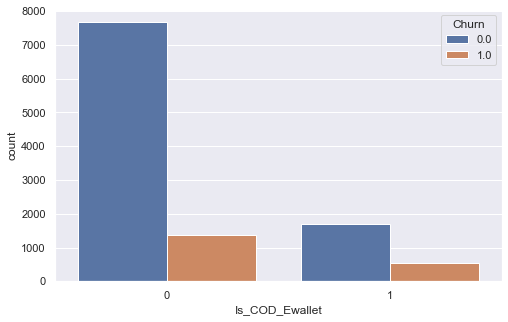

In [126]:
plt.figure(figsize=(8,5))
sns.countplot(data=df_imputed,hue='Churn', x='Is_COD_Ewallet')

In [127]:
pd.crosstab(df_imputed["Churn"],df_imputed["Is_COD_Ewallet"],margins=True,normalize='columns').round(2)

Is_COD_Ewallet     0     1   All
Churn                           
0.0             0.85  0.76  0.83
1.0             0.15  0.24  0.17

#### Is_Reg_Sup feature creation

Regular, Super and Super Plus have lower proportion of churned accounts.
so we are creating a new feature which will be true (1) if account segment is either regular or super or super plus

In [128]:
df_imputed.Account_Segment.value_counts().head(5)

-0.817139    4221
 0.094301    4062
 1.917181    1639
 1.005741     818
-1.728579     520
Name: Account_Segment, dtype: int64

In [129]:
df_imputed['Is_Reg_Sup'] = np.where(((df_imputed.Account_Segment.round(2) == -1.73)|
                                     (df_imputed.Account_Segment.round(2) == 0.09)|
                                     (df_imputed.Account_Segment.round(2) == 1.01)),1,0)
df_imputed['Is_Reg_Sup'].value_counts()

0    5860
1    5400
Name: Is_Reg_Sup, dtype: int64

In [130]:
df_bkp1.Account_Segment.value_counts().head(5)

Regular Plus    4124
Super           4062
HNI             1639
Super Plus       818
Regular          520
Name: Account_Segment, dtype: int64

<AxesSubplot:xlabel='Is_Reg_Sup', ylabel='count'>

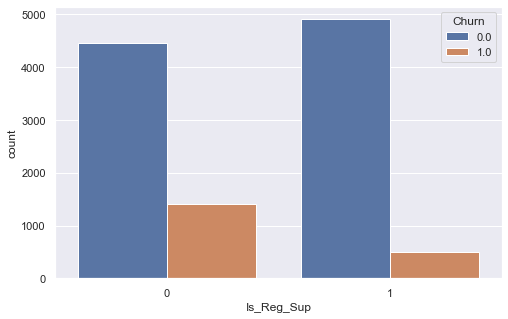

In [131]:
plt.figure(figsize=(8,5))
sns.countplot(data=df_imputed,hue='Churn', x='Is_Reg_Sup')

In [132]:
pd.crosstab(df_imputed["Churn"],df_imputed["Is_Reg_Sup"],margins=True,normalize='columns').round(2)

Is_Reg_Sup     0     1   All
Churn                       
0.0         0.76  0.91  0.83
1.0         0.24  0.09  0.17

In [133]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [134]:
def checkvif(X):
    vif = pd.DataFrame()
    vif["Variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    print (vif)

In [135]:
cont_feature

['Tenure',
 'CC_Contacted_LY',
 'Account_User_Count',
 'Rev_Per_Month',
 'Rev_Growth_YOY',
 'Coupon_Used_For_Payment',
 'Day_Since_CC_Connect',
 'Cashback']

In [136]:
X = df_imputed[cont_feature]
checkvif(X)

                 Variables       VIF
0                   Tenure  1.232446
1          CC_Contacted_LY  1.013054
2       Account_User_Count  1.076488
3            Rev_Per_Month  1.081998
4           Rev_Growth_YOY  1.013823
5  Coupon_Used_For_Payment  1.233268
6     Day_Since_CC_Connect  1.274749
7                 Cashback  1.423535


We can see that VIF is less than 5 for all these continuous features. Hence this dataset has no multicollinearity problem

### Chi-Square test for testing categorical variables Multicollinearity

In [137]:
cat_features = ['City_Tier',  'Payment',  'Gender',  'Service_Score',  'Account_Segment',  'CC_Agent_Score',  'Marital_Status',
 'Complain_LY',  'Login_device']

In [138]:
from scipy.stats import chi2_contingency

In [139]:
chi_square_summ ={'cat_feature1':[],'cat_feature2':[],'p_value':[],'Relationship':[]}
for i in range(len(cat_features)) :
    for j in range(i+1,len(cat_features)):
        df_crosstab = pd.DataFrame(pd.crosstab(df_bkp1[cat_features[i]],df_bkp1[cat_features[j]]))
        df_crosstab
        chi2, pval, dof, exp_freq = chi2_contingency(df_crosstab, correction = False)
        if (pval.round(4)<0.05):
            relationship_msg = 'Yes'
        else:
            relationship_msg = 'No'
            
        chi_square_summ['cat_feature1'].append(cat_features[i])
        chi_square_summ['cat_feature2'].append(cat_features[j])
        chi_square_summ['p_value'].append(pval.round(4))
        chi_square_summ['Relationship'].append(relationship_msg)
#         print ("Chi-Square test p value of ",cat_features[i], " and ",cat_features[j]," is ", pval.round(4), ". ", relationship_msg)

df_chi_square_summ = pd.DataFrame(chi_square_summ)


#### Following categorical features have relationship among them as their p value of Chi-square test is less than the significant value (0.05)

In [140]:
df_chi_square_summ[df_chi_square_summ['Relationship'] == 'Yes']

cat_feature1     cat_feature2  p_value Relationship
0         City_Tier          Payment   0.0000          Yes
1         City_Tier           Gender   0.0000          Yes
3         City_Tier  Account_Segment   0.0000          Yes
4         City_Tier   CC_Agent_Score   0.0000          Yes
5         City_Tier   Marital_Status   0.0000          Yes
8           Payment           Gender   0.0000          Yes
10          Payment  Account_Segment   0.0000          Yes
11          Payment   CC_Agent_Score   0.0000          Yes
12          Payment   Marital_Status   0.0002          Yes
14          Payment     Login_device   0.0012          Yes
15           Gender    Service_Score   0.0309          Yes
16           Gender  Account_Segment   0.0000          Yes
17           Gender   CC_Agent_Score   0.0010          Yes
18           Gender   Marital_Status   0.0001          Yes
19           Gender      Complain_LY   0.0000          Yes
21    Service_Score  Account_Segment   0.0078          Yes
23    Service_Score   Marital_Status   0.0002          Yes
25    Service_Score     Login_device   0.0358          Yes
26  Account_Segment   CC_Agent_Score   0.0001          Yes
27  Account_Segment   Marital_Status   0.0000          Yes
29  Account_Segment     Login_device   0.0000          Yes
30   CC_Agent_Score   Marital_Status   0.0000          Yes
31   CC_Agent_Score      Complain_LY   0.0000          Yes
32   CC_Agent_Score     Login_device   0.0000          Yes
34   Marital_Status     Login_device   0.0012          Yes

#### Following categorical features have no relationship among them as their p value of Chi-square test is greator than the significant value (0.05)

In [141]:
df_chi_square_summ[df_chi_square_summ['Relationship'] == 'No']

cat_feature1    cat_feature2  p_value Relationship
2         City_Tier   Service_Score   0.1119           No
6         City_Tier     Complain_LY   0.2440           No
7         City_Tier    Login_device   0.6690           No
9           Payment   Service_Score   0.3307           No
13          Payment     Complain_LY   0.1125           No
20           Gender    Login_device   0.1207           No
22    Service_Score  CC_Agent_Score   0.0958           No
24    Service_Score     Complain_LY   0.4533           No
28  Account_Segment     Complain_LY   0.0604           No
33   Marital_Status     Complain_LY   0.8018           No
35      Complain_LY    Login_device   0.4838           No

We can see that lot of categorical features have relationship among them. We are not dropping these features now. We will try to run the model and then see its performance (AIC/BIC) and will then decide accordingly

## Creating Clusters using KMeans

In [142]:
from sklearn.cluster import KMeans

In [143]:
scaled_df1 = df_imputed[cont_feature]

In [144]:
scaled_df1

Tenure  CC_Contacted_LY  Account_User_Count  Rev_Per_Month  \
0     -0.870626        -1.375600           -0.677332       1.249484   
1     -0.789996        -1.143070            0.300253       0.579565   
2     -0.674809         1.414758            0.300253       0.244605   
3     -0.686328        -0.329216            0.300253       0.914524   
4     -0.824552        -0.678011           -0.677332      -0.760274   
...         ...              ...                 ...            ...   
11255 -0.179507         1.879818           -1.654917       1.249484   
11256  0.166052         0.135844            1.277838       0.579565   
11257 -1.216186        -0.445481           -1.654917       0.579565   
11258  1.317918        -0.794275            1.277838       0.579565   
11259 -0.409880         0.484639           -1.654917      -0.090355   

       Rev_Growth_YOY  Coupon_Used_For_Payment  Day_Since_CC_Connect  Cashback  
0           -1.382120                -0.431307              0.106133 -0.403839  
1           -0.317598                -1.338485             -1.281898 -1.254574  
2           -0.583728                -1.338485             -0.449080 -0.598180  
3            1.811447                -1.338485             -0.449080 -0.967508  
4           -1.382120                -0.431307             -0.449080 -1.064941  
...               ...                      ...                   ...       ...  
11255        0.746924                -0.431307             -0.171473 -0.539416  
11256       -0.051467                -0.431307              0.938952  1.056122  
11257        1.545316                -0.431307             -0.171473  0.282548  
11258       -0.051467                 0.475872              1.216558  0.031447  
11259       -0.849859                 0.475872             -0.449080 -0.074486  

[11260 rows x 8 columns]

### Calculating WSS for values of K from 1 to 10 - Elbow Method

In [145]:
wss =[] 
for i in range(1,11):
    KM = KMeans(n_clusters=i,random_state=1)
    KM.fit(scaled_df1)
    wss.append(KM.inertia_)

In [146]:
wss

[87819.08763105294,
 73809.08591176377,
 67381.5801042067,
 62239.50973504853,
 58342.47953593523,
 55084.540226729914,
 52414.51589240061,
 50084.03232421475,
 48493.75683901843,
 46962.186446259846]

We can see that WSS (within cluster sum of square variance) reduces as K keeps increasing

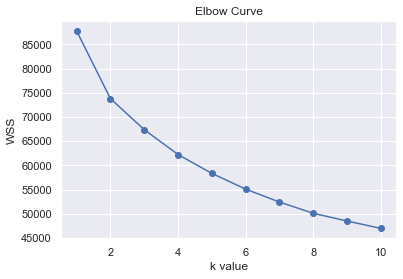

In [147]:
plt.plot(range(1,11), wss, 'o-');
plt.title('Elbow Curve')
plt.xlabel('k value')
plt.ylabel('WSS')
plt.show;

We can see that WSS decreases if we increase the value of k(clusters). 

On changing K value from 1 to 2 there is a significant drop (around 14k) in WSS and on changing K from 2 to 3 WSS drop is nearly 7k. After 3, drop is around 5k and it reduces further with the increasing value of K.

As drop is not that significant after k=4 and an elbow is forming at K value near about 3 to 5, we can opt for optmium value of K anywhere near 3 to 5  

Lets check the silhouette score for k= 3 to 5


### KMeans with K=3

In [148]:
k_means = KMeans(n_clusters = 3,random_state=1)
k_means.fit(scaled_df1)
labels = k_means.labels_

### Cluster evaluation for 3 clusters: the silhouette score

In [149]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [150]:
# Calculating silhouette_score
silhouette_score(scaled_df1,labels,random_state=1)

0.12595770051115046

### Cluster evaluation for 4 clusters: the silhouette score

In [151]:
k_means = KMeans(n_clusters = 4,random_state=1)
k_means.fit(scaled_df1)
labels = k_means.labels_
# Calculating silhouette_score
silhouette_score(scaled_df1,labels,random_state=1)

0.12859665985502117

### Cluster evaluation for 5 clusters: the silhouette score

In [152]:
k_means = KMeans(n_clusters = 5,random_state=1)
k_means.fit(scaled_df1)
labels = k_means.labels_
# Calculating silhouette_score
silhouette_score(scaled_df1,labels,random_state=1)

0.11822950680570027

we can see that Silhouette score is best for K value 3

### The silhouette width

In [153]:
# calculating silhouette width
k_means = KMeans(n_clusters = 3,random_state=1)
k_means.fit(scaled_df1)
labels = k_means.labels_
sil_width = silhouette_samples(scaled_df1,labels)

In [154]:
df_bkp1["sil_width"] = sil_width
df_bkp1.head(5)

Churn  Tenure  City_Tier  CC_Contacted_LY      Payment  Gender  \
0      1     4.0        3.0              6.0   Debit Card  Female   
1      1     NaN        1.0              8.0          UPI    Male   
2      1     NaN        1.0             30.0   Debit Card    Male   
3      1     NaN        3.0             15.0   Debit Card    Male   
4      1     NaN        1.0             12.0  Credit Card    Male   

   Service_Score  Account_User_Count Account_Segment  CC_Agent_Score  \
0            3.0                 3.0           Super             2.0   
1            3.0                 4.0    Regular Plus             3.0   
2            2.0                 4.0    Regular Plus             3.0   
3            2.0                 4.0           Super             5.0   
4            2.0                 3.0    Regular Plus             5.0   

  Marital_Status  Rev_Per_Month  Complain_LY  Rev_Growth_YOY  \
0         Single            9.0          1.0            11.0   
1         Single            7.0          1.0            15.0   
2         Single            6.0          1.0            14.0   
3         Single            8.0          0.0            23.0   
4         Single            3.0          0.0            11.0   

   Coupon_Used_For_Payment  Day_Since_CC_Connect  Cashback Login_device  \
0                      1.0                   5.0    159.93       Mobile   
1                      0.0                   0.0    120.90       Mobile   
2                      0.0                   3.0       NaN       Mobile   
3                      0.0                   3.0    134.07       Mobile   
4                      1.0                   3.0    129.60       Mobile   

   sil_width  
0   0.217789  
1   0.205318  
2  -0.030962  
3   0.069180  
4   0.365812

In [155]:
df_bkp1.sil_width.describe()

count    11260.000000
mean         0.125958
std          0.105936
min         -0.126542
25%          0.049905
50%          0.120282
75%          0.199558
max          0.382358
Name: sil_width, dtype: float64

In [156]:
df_bkp1[df_bkp1.sil_width<0]

Churn  Tenure  City_Tier  CC_Contacted_LY      Payment  Gender  \
2          1     NaN        1.0             30.0   Debit Card    Male   
20         1     NaN        3.0             12.0   Debit Card    Male   
23         1     NaN        3.0             26.0   Debit Card  Female   
31         0     NaN        1.0             13.0  Credit Card     NaN   
32         0    30.0        1.0             15.0  Credit Card  Female   
...      ...     ...        ...              ...          ...     ...   
11226      0     NaN        3.0             19.0  Credit Card    Male   
11230      0    10.0        1.0             16.0   Debit Card  Female   
11241      0    12.0        3.0             19.0   Debit Card  Female   
11245      0    14.0        1.0             14.0   Debit Card    Male   
11257      0     1.0        1.0             14.0   Debit Card    Male   

       Service_Score  Account_User_Count Account_Segment  CC_Agent_Score  \
2                2.0                 4.0    Regular Plus             3.0   
20               3.0                 5.0             NaN             3.0   
23               3.0                 5.0           Super             3.0   
31               2.0                 4.0           Super             3.0   
32               3.0                 4.0    Regular Plus             4.0   
...              ...                 ...             ...             ...   
11226            3.0                 4.0    Regular Plus             5.0   
11230            4.0                 4.0           Super             4.0   
11241            4.0                 4.0           Super             1.0   
11245            1.0                 5.0    Regular Plus             3.0   
11257            3.0                 2.0           Super             4.0   

      Marital_Status  Rev_Per_Month  Complain_LY  Rev_Growth_YOY  \
2             Single            6.0          1.0            14.0   
20          Divorced            5.0          1.0            18.0   
23          Divorced            4.0          1.0            11.0   
31          Divorced            3.0          0.0            17.0   
32          Divorced            5.0          1.0            20.0   
...              ...            ...          ...             ...   
11226         Single            7.0          1.0            14.0   
11230        Married            9.0          0.0            14.0   
11241        Married            4.0          0.0            12.0   
11245         Single            6.0          0.0            16.0   
11257        Married            7.0          1.0            22.0   

       Coupon_Used_For_Payment  Day_Since_CC_Connect  Cashback Login_device  \
2                          0.0                   3.0       NaN       Mobile   
20                         3.5                   7.0    161.72       Mobile   
23                         1.0                   2.0       NaN       Mobile   
31                         1.0                   0.0    279.21       Mobile   
32                         1.0                   0.0    133.46       Mobile   
...                        ...                   ...       ...          ...   
11226                      2.0                   3.0    154.80       Mobile   
11230                      1.0                   3.0    180.31     Computer   
11241                      1.0                  10.0    181.43       Mobile   
11245                      1.0                   3.0    153.09       Mobile   
11257                      1.0                   4.0    191.42       Mobile   

       sil_width  
2      -0.030962  
20     -0.025893  
23     -0.045957  
31     -0.005074  
32     -0.029556  
...          ...  
11226  -0.024551  
11230  -0.026999  
11241  -0.077503  
11245  -0.027134  
11257  -0.044365  

[1519 rows x 19 columns]

We can see that for around 10% observations silhouette width is negative i.e. distance between observation and its nearest cluster centorid is less than the distance between obstervation and its centroid. Hence clustering doesnt appears to be very good on this data set.

In [157]:
k_means = KMeans(n_clusters = 3,random_state=1)
k_means.fit(scaled_df1)
labels = k_means.labels_
df_bkp1["Clus_kmeans"] = labels
df_bkp1.head()

Churn  Tenure  City_Tier  CC_Contacted_LY      Payment  Gender  \
0      1     4.0        3.0              6.0   Debit Card  Female   
1      1     NaN        1.0              8.0          UPI    Male   
2      1     NaN        1.0             30.0   Debit Card    Male   
3      1     NaN        3.0             15.0   Debit Card    Male   
4      1     NaN        1.0             12.0  Credit Card    Male   

   Service_Score  Account_User_Count Account_Segment  CC_Agent_Score  \
0            3.0                 3.0           Super             2.0   
1            3.0                 4.0    Regular Plus             3.0   
2            2.0                 4.0    Regular Plus             3.0   
3            2.0                 4.0           Super             5.0   
4            2.0                 3.0    Regular Plus             5.0   

  Marital_Status  Rev_Per_Month  Complain_LY  Rev_Growth_YOY  \
0         Single            9.0          1.0            11.0   
1         Single            7.0          1.0            15.0   
2         Single            6.0          1.0            14.0   
3         Single            8.0          0.0            23.0   
4         Single            3.0          0.0            11.0   

   Coupon_Used_For_Payment  Day_Since_CC_Connect  Cashback Login_device  \
0                      1.0                   5.0    159.93       Mobile   
1                      0.0                   0.0    120.90       Mobile   
2                      0.0                   3.0       NaN       Mobile   
3                      0.0                   3.0    134.07       Mobile   
4                      1.0                   3.0    129.60       Mobile   

   sil_width  Clus_kmeans  
0   0.217789            1  
1   0.205318            1  
2  -0.030962            0  
3   0.069180            0  
4   0.365812            1

In [158]:
# scaled_df1.drop('Clus_kmeans',axis=1,inplace=True)

### Describing cluster profiles for the clusters defined

### Cluster Profiling

In [159]:
df_bkp1.Clus_kmeans.value_counts().sort_index()

0    3433
1    4559
2    3268
Name: Clus_kmeans, dtype: int64

In [160]:
# clust_profile=df1.drop(['clusters','Agglo_CLusters'],axis=1)
clust_profile=df_bkp1.groupby('Clus_kmeans').mean()
clust_profile['freq']=df_bkp1.Clus_kmeans.value_counts().sort_index()
clust_profile

Churn     Tenure  City_Tier  CC_Contacted_LY  Service_Score  \
Clus_kmeans                                                                   
0            0.244101   8.711089   1.640611        22.937096       3.113116   
1            0.170871   9.117845   1.639246        14.817538       2.683773   
2            0.085373  17.084572   1.688408        16.671914       2.992117   

             Account_User_Count  CC_Agent_Score  Rev_Per_Month  Complain_LY  \
Clus_kmeans                                                                   
0                      4.134050        3.059135       6.650140     0.294453   
1                      3.271399        3.064802       4.012518     0.281796   
2                      3.838226        3.076567       5.565720     0.280646   

             Rev_Growth_YOY  Coupon_Used_For_Payment  Day_Since_CC_Connect  \
Clus_kmeans                                                                  
0                 18.438648                 1.487766              3.371834   
1                 14.804520                 0.865182              3.317068   
2                 15.773256                 2.314146              7.718868   

               Cashback  sil_width  freq  
Clus_kmeans                               
0            169.504912   0.073680  3433  
1            151.860979   0.198147  4559  
2            224.555919   0.080168  3268

Cluster 0 (New customers with high revenue) : These customers are the old spending group and give high revenue to the DTH company.

Cluster 1 (Medium Customer with low revenue) : These customers are not very old customers but they give lowest revenue to the DTH company.

Cluster 2 (Old Customer with medium revenue) : These customers are the oldest but they are giving medium revenue to the DTH company.


## Visualising the groups

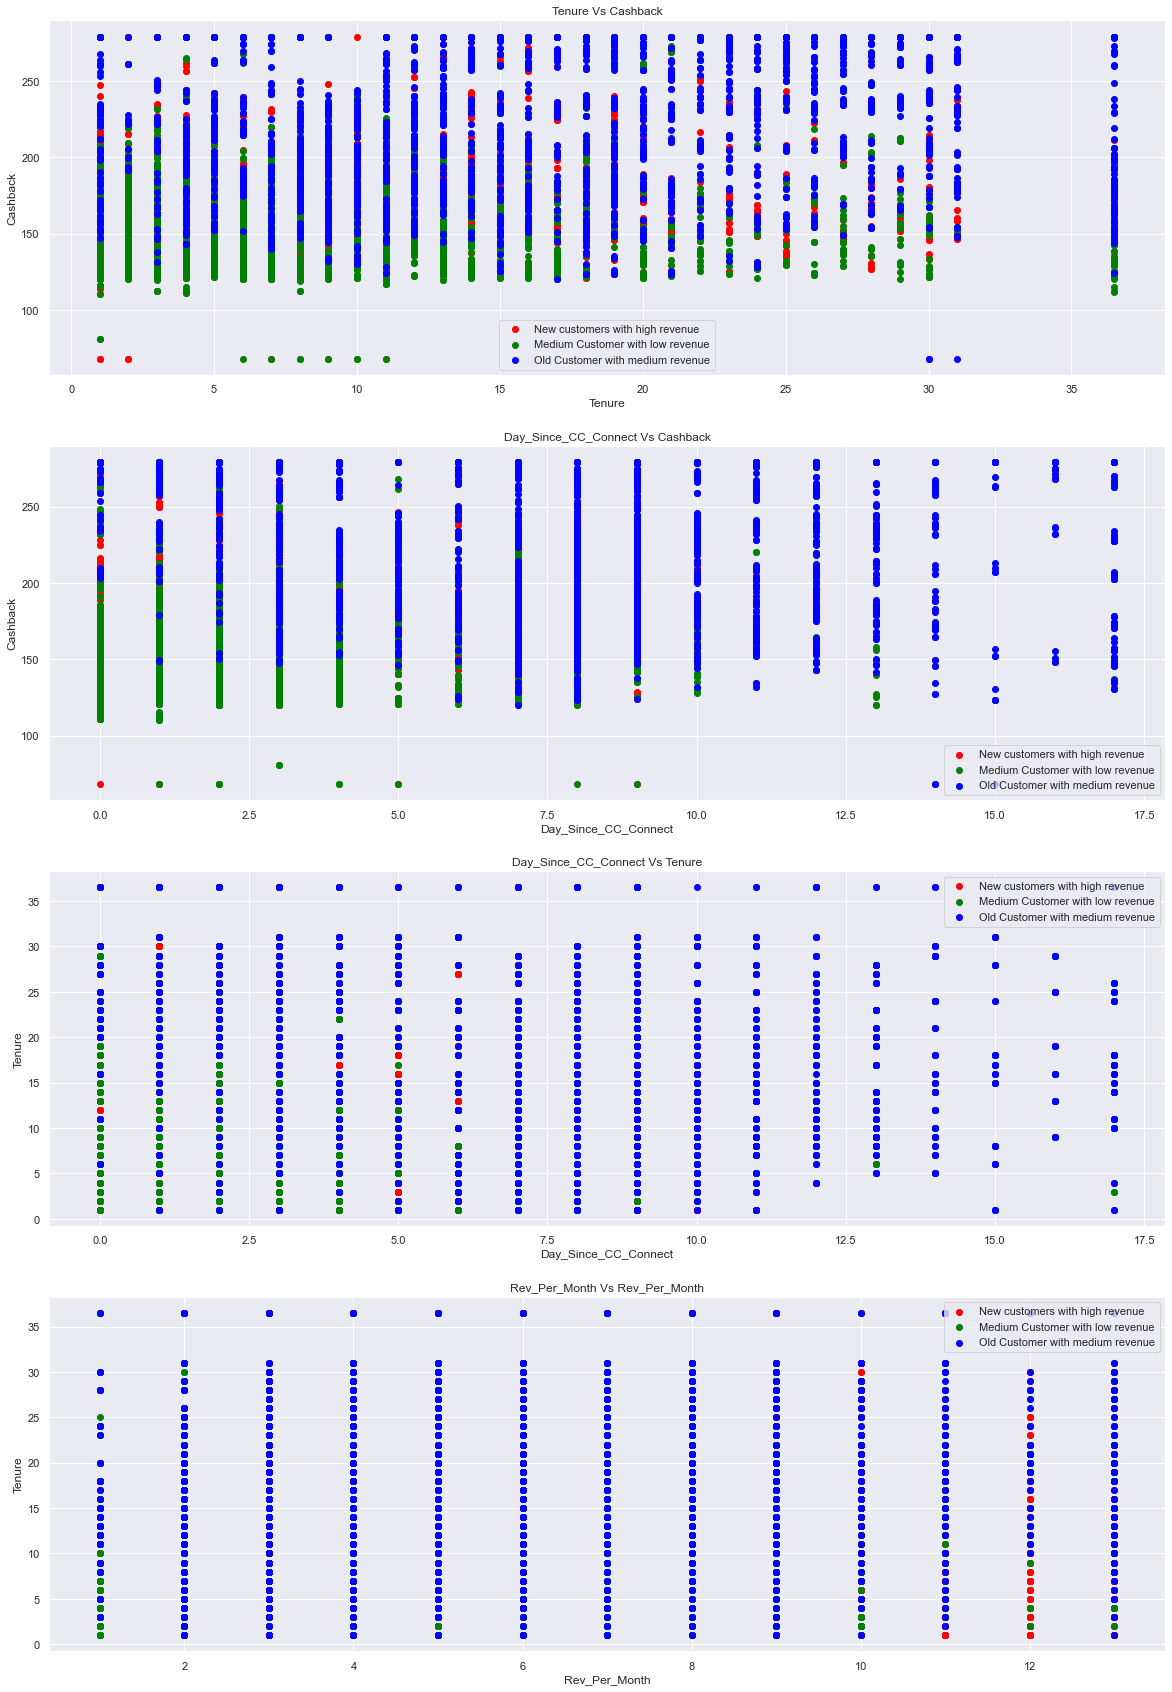

In [161]:
df1_clus0 =df_bkp1[df_bkp1["Clus_kmeans"]==0]
df1_clus1 =df_bkp1[df_bkp1["Clus_kmeans"]==1]
df1_clus2 =df_bkp1[df_bkp1["Clus_kmeans"]==2]
label0='New customers with high revenue'
label1='Medium Customer with low revenue'
label2='Old Customer with medium revenue'

fig, ax = plt.subplots(4,1, sharey=False,figsize= (20,30))
ax[0].scatter( df1_clus0['Tenure'], df1_clus0['Cashback'], color ='red', label=label0)
ax[0].scatter( df1_clus1['Tenure'], df1_clus1['Cashback'], color ='green', label=label1)
ax[0].scatter( df1_clus2['Tenure'], df1_clus2['Cashback'], color ='blue', label=label2)
ax[0].set(xlabel="Tenure",ylabel="Cashback")
ax[0].set_title("Tenure Vs Cashback");
ax[0].legend()
ax[1].scatter( df1_clus0['Day_Since_CC_Connect'], df1_clus0['Cashback'], color ='red', label=label0)
ax[1].scatter( df1_clus1['Day_Since_CC_Connect'], df1_clus1['Cashback'], color ='green', label=label1)
ax[1].scatter( df1_clus2['Day_Since_CC_Connect'], df1_clus2['Cashback'], color ='blue', label=label2)
ax[1].set(xlabel="Day_Since_CC_Connect",ylabel="Cashback")
ax[1].set_title("Day_Since_CC_Connect Vs Cashback");
ax[1].legend()
ax[2].scatter( df1_clus0['Day_Since_CC_Connect'], df1_clus0['Tenure'], color ='red', label=label0)
ax[2].scatter( df1_clus1['Day_Since_CC_Connect'], df1_clus1['Tenure'], color ='green', label=label1)
ax[2].scatter( df1_clus2['Day_Since_CC_Connect'], df1_clus2['Tenure'], color ='blue', label=label2)
ax[2].set(xlabel="Day_Since_CC_Connect",ylabel="Tenure")
ax[2].set_title("Day_Since_CC_Connect Vs Tenure");
ax[2].legend()
ax[3].scatter( df1_clus0['Rev_Per_Month'], df1_clus0['Tenure'], color ='red', label=label0)
ax[3].scatter( df1_clus1['Rev_Per_Month'], df1_clus1['Tenure'], color ='green', label=label1)
ax[3].scatter( df1_clus2['Rev_Per_Month'], df1_clus2['Tenure'], color ='blue', label=label2)
ax[3].set(xlabel="Rev_Per_Month",ylabel="Tenure")
ax[3].set_title("Rev_Per_Month Vs Rev_Per_Month");
ax[3].legend()

plt.show()

We can see that all three clusters are separated but the there seems to be some overlap.

<AxesSubplot:xlabel='Clus_kmeans', ylabel='count'>

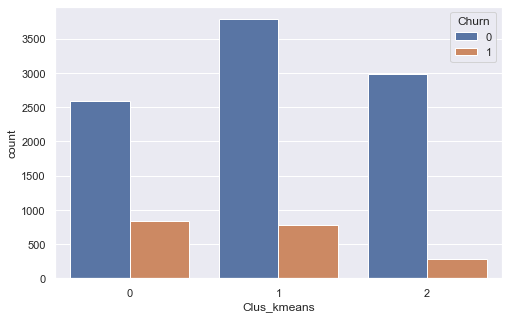

In [162]:
plt.figure(figsize=(8,5))
sns.countplot(data=df_bkp1,hue='Churn', x='Clus_kmeans')

In [163]:
pd.crosstab(df_bkp1["Churn"],df_bkp1["Clus_kmeans"],margins=True,normalize='columns').round(2)

Clus_kmeans     0     1     2   All
Churn                              
0            0.76  0.83  0.91  0.83
1            0.24  0.17  0.09  0.17

In [164]:
df_crosstab = pd.DataFrame(pd.crosstab(df_bkp1["Churn"],df_bkp1["Clus_kmeans"]))
chi2, pval, dof, exp_freq = chi2_contingency(df_crosstab, correction = False)
pval

3.272543035831068e-66

We can see that the p value is nearly 0. So this confirms statistically with 95% confidence that the given clusters are impacting the Churn attribute

## Recommendations

1.	New customers with high revenue 

These customers are newer customers but they are giving higher revenue to the company.  This cluster has the highest churning around 24%.

So, several offers like discount on continuing the account like new products offerings, cashbacks on every recharge or renewal etc should be offered to these customers in order to retain them as they are giving maximum revenue to the company.

2.	Medium tenure Customer with low revenue
These customers are giving lowest revenue to the DTH company. These have slightly higher tenure than the previous cluster “New customers with high revenue”. 

Their churning is around 17%. 

So, these customers could be given combo offers in which they can renew the account for more period/time than their normal time then they get some extra returns like OTT content, free subscriptions of the OTT providers etc. 

Offers should be designed in a way that increases the revenue of the company in longer run



3.	'Old Customer with medium revenue 
These are the oldest customer of the company and they are kind of stable customer or may be loyal customers as their churning is lowest. Churning of this group is only 9%
Since these customers are giving revenue to the DTH company and less likely to churn, these are the most loyal customers of the DTH company. DTH company should honour them by proving some loyalty offers like on spend of some money cash backs could be offered. 
DTH company should give more weightage to the complaints of these customers and should instruct their CRM team to listen to their feedback carefully as they are the most loyal ones and they can provide the genuine feedback back to the company.



# Project Notes - II 

## 1). Model building and interpretation.

### Train-Test Split

In [165]:
# Copy all the predictor variables into X dataframe

X = df_imputed.drop(['Churn'], axis=1)
#X = df1[['carat','depth']]

# Copy target into the y dataframe. 
y = df1[['Churn']]

In [166]:
X.head()

Tenure  City_Tier  CC_Contacted_LY  Service_Score  Account_User_Count  \
0 -0.870626   1.471157        -1.375600       0.132189           -0.677332   
1 -0.789996  -0.714697        -1.143070       0.132189            0.300253   
2 -0.674809  -0.714697         1.414758      -1.253556            0.300253   
3 -0.686328   1.471157        -0.329216      -1.253556            0.300253   
4 -0.824552  -0.714697        -0.678011      -1.253556           -0.677332   

   Account_Segment  CC_Agent_Score  Rev_Per_Month  Complain_LY  \
0         0.094301       -0.772983       1.249484     1.582612   
1        -0.817139       -0.048194       0.579565     1.582612   
2        -0.817139       -0.048194       0.244605     1.582612   
3         0.094301        1.401386       0.914524    -0.631867   
4        -0.817139        1.401386      -0.760274    -0.631867   

   Rev_Growth_YOY  ...  Payment_Credit Card  Payment_Debit Card  \
0       -1.382120  ...                  0.0                 1.0   
1       -0.317598  ...                  0.0                 0.0   
2       -0.583728  ...                  0.0                 1.0   
3        1.811447  ...                  0.0                 1.0   
4       -1.382120  ...                  1.0                 0.0   

   Payment_E wallet  Payment_UPI  Gender_Male  Marital_Status_Married  \
0               0.0          0.0          0.0                     0.0   
1               0.0          1.0          1.0                     0.0   
2               0.0          0.0          1.0                     0.0   
3               0.0          0.0          1.0                     0.0   
4               0.0          0.0          1.0                     0.0   

   Marital_Status_Single  Login_device_Mobile  Is_COD_Ewallet  Is_Reg_Sup  
0                    1.0                  1.0               0           1  
1                    1.0                  1.0               0           0  
2                    1.0                  1.0               0           0  
3                    1.0                  1.0               0           1  
4                    1.0                  1.0               0           0  

[5 rows x 23 columns]

In [167]:
# Split X and y into training and test set in 70:30 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1,stratify=y)

#### creating user define function so to run model multiple times for different grid search parameters

In [168]:
def run_gridsearch(model,param_grid,X_train, train_labels,cv_value=5,scoring_value='recall',verbose_value=3):
    grid_search = GridSearchCV(estimator = model, param_grid = param_grid, cv = cv_value, n_jobs =-1,scoring=scoring_value,verbose=verbose_value)
    print ("\n Running grid search\n")
    grid_search.fit(X_train, train_labels)
    print ("\n Showing best parameters for the grid search\n")
    print (grid_search.best_params_)
    print ("\n Showing best score for the grid search\n")
    print (grid_search.best_score_)
             
    return grid_search

In [169]:
def check_performance(grid_search,X_train, X_test, train_labels, test_labels):
    best_grid = grid_search.best_estimator_
    ytrain_predict = best_grid.predict(X_train)
    ytest_predict = best_grid.predict(X_test)
    print("\n Classification Report for Train dataset\n")
    print(classification_report(train_labels,ytrain_predict))
    print("\n Classification Report for Test dataset\n")
    print(classification_report(test_labels,ytest_predict))

In [170]:
def calc_auc_roc(model, y,X,plot_label):
    prob = model.predict_proba(X)[:, 1]
    auc = roc_auc_score(y, prob)
    train_fpr, train_tpr, train_thresholds = roc_curve(y, prob)
    plt.plot(train_fpr, train_tpr,label = plot_label)
#     plt.plot(train_fpr, train_tpr, marker='.')
    plt.title('ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    
    return auc, train_fpr, train_tpr, train_thresholds

In [171]:
def class_pred_diff_threshold(y_predict,threshold=0.05):
    y_class_pred=[]
    for i in range(0,len(y_predict)):
        if np.array(y_predict)[i]>threshold:
            a=1
        else:
            a=0
        y_class_pred.append(a)
    return y_class_pred 

#  Apply Logistic Regression

### Logistic Regression Model




In [172]:
# Fit the Logistic Regression model
model = LogisticRegression()
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X_train, y_train, scoring='recall', cv=cv, n_jobs=-1, error_score='raise')
# summarize result
print('Mean Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))


Mean Accuracy: 0.406 (0.028)


## Model Evaluation

In [173]:
model.fit(X_train, y_train)
# Accuracy - Training Data
print ('Model score for training dataset', model.score(X_train, y_train))
print ('Model score for testing dataset',model.score(X_test, y_test))

Model score for training dataset 0.8776960162395331
Model score for testing dataset 0.8783303730017762


C:\Users\ragha\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


We can see that score of train and test data set is within 5% range. Hence model appears good. Lets try to finetune the model and see if its score improves.

In [174]:
# Prediction on the training & Test set

ytrain_predict = model.predict(X_train)
ytest_predict = model.predict(X_test)

### AUC and ROC for the training data & test data

AUC for Train dataset: 0.856
AUC for Train dataset: 0.839


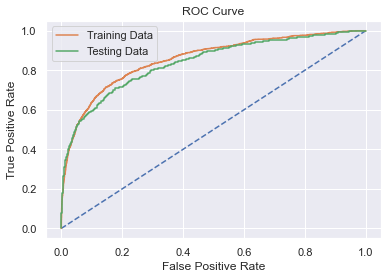

In [175]:
plt.plot([0, 1], [0, 1], linestyle='--')
train_auc,train_fpr, train_tpr, train_thresholds = calc_auc_roc(model,y_train,X_train,'Training Data')
print('AUC for Train dataset: %.3f' % train_auc)
test_auc,test_fpr, test_tpr, test_thresholds = calc_auc_roc(model,y_test,X_test,'Testing Data')
print('AUC for Train dataset: %.3f' % test_auc)
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

### Confusion Matrix for the training data and testing data

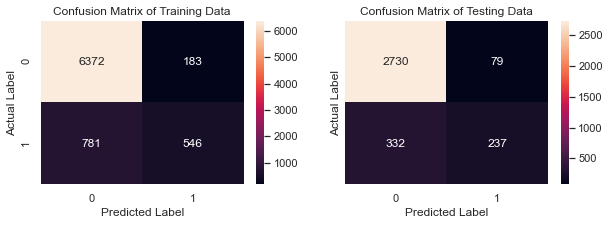

In [176]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False,figsize= (10,3))

#Plotting confusion matrix for the different models for the Training Data
# sns.set(font_scale=2)
plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,ytrain_predict)),annot=True,fmt='.5g',ax=a[0][0]);
a[0][0].set(xlabel = "Predicted Label",ylabel="Actual Label")
a[0][0].set_title('Confusion Matrix of Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,ytest_predict)),annot=True,fmt='.5g',ax=a[0][1]);
a[0][1].set_title('Confusion Matrix of Testing Data')
a[0][1].set(xlabel = "Predicted Label",ylabel="Actual Label");


### Training Data and Test Data Classification Report Comparison

In [177]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,ytrain_predict),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,ytest_predict),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.89      0.97      0.93      6555
           1       0.75      0.41      0.53      1327

    accuracy                           0.88      7882
   macro avg       0.82      0.69      0.73      7882
weighted avg       0.87      0.88      0.86      7882
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.89      0.97      0.93      2809
           1       0.75      0.42      0.54       569

    accuracy                           0.88      3378
   macro avg       0.82      0.69      0.73      3378
weighted avg       0.87      0.88      0.86      3378
 



We can see that accuracy , precision and recall scores of both train and test set are matching in train and test dataset.

But the problem here is recall. Recall values are very less only 42%. It tells us that out of total accounts actually getting churned, our model is able to correctly predict only 42%

## Tuning for Logistic Regression

For tuning of Logistic Regression we will try different solvers like liblinear, lbfgs, newton-cg , penalty, tolerance values and C value

In [178]:
grid={'penalty':['none'], # ,  ,'l1','l2',
      'solver':['lbfgs'],   # ,'liblinear','newton-cg'
      'tol':[0.001,0.01], # ,0.00001,0.0001,0.00001
       'C':[0.5]}  # ,5,15,50,0.01,1

In [179]:
lr_model = LogisticRegression(max_iter=10000,n_jobs=-1)

In [180]:
# grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 3,n_jobs=-1,scoring='f1')
# cv_value=3
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
grid_search = run_gridsearch(lr_model,grid,X_train, y_train,cv)
result = pd.DataFrame(grid_search.cv_results_)
#check_performance(grid_search,X_train, X_test, y_train, y_test)
## Scoring - Strategy to evaluate the performance of the cross-validated model on the test set.


 Running grid search

Fitting 15 folds for each of 2 candidates, totalling 30 fits


C:\Users\ragha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\ragha\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)



 Showing best parameters for the grid search

{'C': 0.5, 'penalty': 'none', 'solver': 'lbfgs', 'tol': 0.001}

 Showing best score for the grid search

0.4071631909963588


In [181]:
best_model = grid_search.best_estimator_

In [182]:
# Prediction on the training set

ytrain_predict = best_model.predict(X_train)
ytest_predict = best_model.predict(X_test)

In [183]:
## Getting the probabilities on the test set

ytest_predict_prob=best_model.predict_proba(X_test)
#pd.DataFrame(ytest_predict_prob).head()

## Model Evaluation

In [184]:
# Accuracy - Training Data
print ('Model score for training dataset', best_model.score(X_train, y_train))
print ('Model score for training dataset',best_model.score(X_test, y_test))

Model score for training dataset 0.8773154021821873
Model score for training dataset 0.8786264061574897


### Building Equation

In [185]:
eq=""
for idx, col_name in enumerate(X_train.columns):
#     print("The coefficient for {} is {:.2f}".format(col_name, best_model.coef_[0][idx]))
    eq = eq + "{:.2f} * {} + ".format( best_model.coef_[0][idx],col_name)

intercept = best_model.intercept_[0]
# print("The intercept for our model is {:.2f}".format(intercept))
eq = eq +  " {:.2f} ".format(intercept)

print (eq)

-0.98 * Tenure + 0.37 * City_Tier + 0.31 * CC_Contacted_LY + -0.21 * Service_Score + 0.34 * Account_User_Count + -0.17 * Account_Segment + 0.39 * CC_Agent_Score + 0.39 * Rev_Per_Month + 0.75 * Complain_LY + -0.12 * Rev_Growth_YOY + 0.11 * Coupon_Used_For_Payment + -0.30 * Day_Since_CC_Connect + -0.10 * Cashback + -0.61 * Payment_Credit Card + -0.46 * Payment_Debit Card + -0.10 * Payment_E wallet + -0.48 * Payment_UPI + 0.24 * Gender_Male + -0.21 * Marital_Status_Married + 0.82 * Marital_Status_Single + -0.42 * Login_device_Mobile + 0.05 * Is_COD_Ewallet + -1.15 * Is_Reg_Sup +  -1.51 


### AUC and ROC for the training data & test data

AUC for Train dataset: 0.856
AUC for Train dataset: 0.839


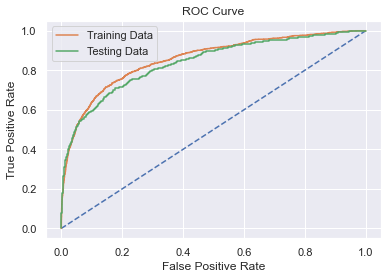

In [186]:
plt.plot([0, 1], [0, 1], linestyle='--')
train_auc,train_fpr, train_tpr, train_thresholds = calc_auc_roc(best_model,y_train,X_train,'Training Data')
print('AUC for Train dataset: %.3f' % train_auc)
test_auc,test_fpr, test_tpr, test_thresholds = calc_auc_roc(best_model,y_test,X_test,'Testing Data')
print('AUC for Train dataset: %.3f' % test_auc)
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

### Confusion Matrix for the training data and testing data

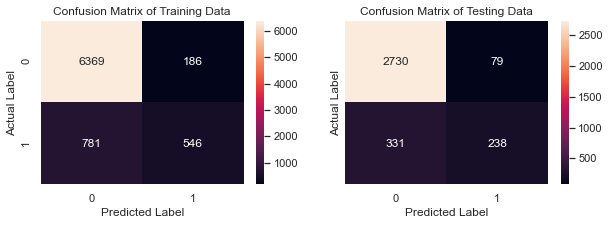

In [187]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False,figsize= (10,3))

#Plotting confusion matrix for the different models for the Training Data
# sns.set(font_scale=2)
plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,ytrain_predict)),annot=True,fmt='.5g',ax=a[0][0]);
a[0][0].set(xlabel = "Predicted Label",ylabel="Actual Label")
a[0][0].set_title('Confusion Matrix of Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,ytest_predict)),annot=True,fmt='.5g',ax=a[0][1]);
a[0][1].set_title('Confusion Matrix of Testing Data')
a[0][1].set(xlabel = "Predicted Label",ylabel="Actual Label");


### Training Data and Test Data Classification Report Comparison

In [188]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,ytrain_predict),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,ytest_predict),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.89      0.97      0.93      6555
           1       0.75      0.41      0.53      1327

    accuracy                           0.88      7882
   macro avg       0.82      0.69      0.73      7882
weighted avg       0.87      0.88      0.86      7882
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.89      0.97      0.93      2809
           1       0.75      0.42      0.54       569

    accuracy                           0.88      3378
   macro avg       0.82      0.70      0.73      3378
weighted avg       0.87      0.88      0.86      3378
 



## Choosing the optimal threshold

In [189]:
optimal_idx = np.argmax(train_tpr - train_fpr)
optimal_threshold = train_thresholds[optimal_idx]
optimal_threshold

0.24146269375087792

## Checking for Threshhold = 0.241

### Prediction on Train & Test set

In [190]:
### Prediction on Train & Test set
threshold = 0.241

y_predict_train = best_model.predict_proba(X_train)[:, 1]
y_predict_test = best_model.predict_proba(X_test)[:, 1]
ytrain_predict = class_pred_diff_threshold(y_predict_train,threshold)
ytest_predict = class_pred_diff_threshold(y_predict_test,threshold)
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,ytrain_predict),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,ytest_predict),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.94      0.85      0.89      6555
           1       0.50      0.72      0.59      1327

    accuracy                           0.83      7882
   macro avg       0.72      0.78      0.74      7882
weighted avg       0.86      0.83      0.84      7882
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.93      0.85      0.89      2809
           1       0.47      0.67      0.56       569

    accuracy                           0.82      3378
   macro avg       0.70      0.76      0.72      3378
weighted avg       0.85      0.82      0.83      3378
 



for 24.1% threshhold, we can see that recall has gone up to 67% but precision has fallen to 47%. Overall f1 score which is a combination of recall and precision has increased by 2%. We can notice a 25% increase in recall at a cost of 28% precision.

### Logistics Regression Conclusion

We have run the base model and model fine tuned using grid search and then used the optimal threshhold for best recall. Different evaluation meterics results for all three model run are as shown below :-

<b>Train Data</b>

   <b> Base model - </b>
        AUC: 86%,  Accuracy: 88%, Precision: 75%, Recall: 41%, f1-Score: 53%
    
   <b>Tuned model - </b>
        AUC: 86%,  Accuracy: 88%, Precision: 75%, Recall: 41%, f1-Score: 53%
    
   <b>Tuned and with optimal threshhold - </b>
        AUC: 86%,  Accuracy: 83%, Precision: %50, Recall: 72%, f1-Score: 59%

<b>Test Data </b>

   <b> Base model - </b>
        AUC: 84%,  Accuracy: 88%, Precision: 75%, Recall: 42%, f1-Score: 54%
    
   <b>Tuned model - </b>
        AUC: 84%,  Accuracy: 88%, Precision: 75%, Recall: 42%, f1-Score: 54%
    
   <b>Tuned and with optimal threshhold - </b>
        AUC: 84%,  Accuracy: 82%, Precision: 47%, Recall: 67%, f1-Score: 56%



   - **Train and Test dataset have similar statistics, hence model is giving similar result for test and train data set..**


   - We can see that overall accuracy is high (around 82%) but with recall rate is less(67%). With this recall rate, model is only able to predict 67% of account getting churned correctly out of the total account getting churned.

   - Precision is 47% of test data which means, out of total account predicted by model as churned, 47% accunt actually churned. 

   - F1-score is the harmonic mean of precision and recall, it takes into the effect of both the scores and this value is low if any of these 2 value is low.

   - Since we are building a model to predict whether account will churn or not, for practical purposes, we will be more interested in correctly classifying 1 (account getting churned) than 0(account not getting churned).

   - If a account not churning is incorrectly predicted to be "churned" by the model, then the impact on cost for DTH company would be less. But if a account who actually churned is incorrectly predicted to be not churned by the model, then the cost impact would be very high for the DTH company. Hence recall rate (actual data point identified as True by model) is very important in this scenario.

   - for 24.1% optimum threshhold, we can see that recall has gone up to 67% but precision has fallen to 47%. Overall f1 score which is a combination of recall and precision has increased by 2%. We can notice a 25% increase in recall at a cost of 28% precision. 

   - **Best model is with optimal threshhold since its best recall and f1 score**

   - #### Logistic regression equation is as shown below :-

    Log (odd) = -0.98 * Tenure + 0.37 * City_Tier + 0.31 * CC_Contacted_LY + -0.21 * Service_Score + 0.34 * Account_User_Count + -0.17 * Account_Segment + 0.39 * CC_Agent_Score + 0.39 * Rev_Per_Month + 0.75 * Complain_LY + -0.12 * Rev_Growth_YOY + 0.11 * Coupon_Used_For_Payment + -0.30 * Day_Since_CC_Connect + -0.10 * Cashback + -0.61 * Payment_Credit Card + -0.46 * Payment_Debit Card + -0.10 * Payment_E wallet + -0.48 * Payment_UPI + 0.24 * Gender_Male + -0.21 * Marital_Status_Married + 0.82 * Marital_Status_Single + -0.42 * Login_device_Mobile + 0.05 * Is_COD_Ewallet + -1.15 * Is_Reg_Sup +  -1.51 


   - As per this model, attributes like Is_Reg_Sup, Tenure, Marital_Status_Single, Complain_LY, Payment_Credit are the best features for predicting churned accounts

   - Is_COD_Ewallet attribute is least affecting the Churn.




### LDA Model

In [191]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [192]:
#Build LDA Model
clf = LinearDiscriminantAnalysis()

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(clf, X_train, y_train, scoring='recall', cv=cv, n_jobs=-1, error_score='raise')
# summarize result
print('Mean Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Mean Accuracy: 0.410 (0.026)


## Model Evaluation

In [193]:
# Accuracy - Training Data
model=clf.fit(X_train,y_train)
print ('Model score for training dataset', model.score(X_train, y_train))
print ('Model score for testing dataset',model.score(X_test, y_test))

Model score for training dataset 0.8751585891905608
Model score for testing dataset 0.8780343398460627


C:\Users\ragha\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


We can see that score of train and test data set is within 5% range. Hence model appears good. 

In [194]:
model

LinearDiscriminantAnalysis()

In [195]:
# Prediction on the training & Test set

ytrain_predict = model.predict(X_train)
ytest_predict = model.predict(X_test)

### AUC and ROC for the training data & test data

AUC for Train dataset: 0.852
AUC for Train dataset: 0.837


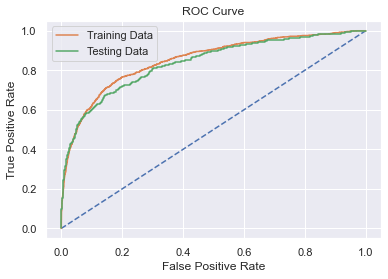

In [196]:
plt.plot([0, 1], [0, 1], linestyle='--')
train_auc,train_fpr, train_tpr, train_thresholds = calc_auc_roc(model,y_train,X_train,'Training Data')
print('AUC for Train dataset: %.3f' % train_auc)
test_auc,test_fpr, test_tpr, test_thresholds = calc_auc_roc(model,y_test,X_test,'Testing Data')
print('AUC for Train dataset: %.3f' % test_auc)
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

### Confusion Matrix for the training data and testing data

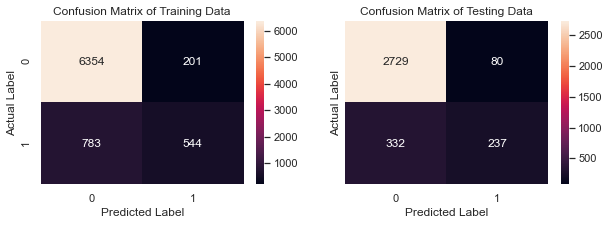

In [197]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False,figsize= (10,3))

#Plotting confusion matrix for the different models for the Training Data
# sns.set(font_scale=2)
plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,ytrain_predict)),annot=True,fmt='.5g',ax=a[0][0]);
a[0][0].set(xlabel = "Predicted Label",ylabel="Actual Label")
a[0][0].set_title('Confusion Matrix of Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,ytest_predict)),annot=True,fmt='.5g',ax=a[0][1]);
a[0][1].set_title('Confusion Matrix of Testing Data')
a[0][1].set(xlabel = "Predicted Label",ylabel="Actual Label");


### Training Data and Test Data Classification Report Comparison

In [198]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,ytrain_predict),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,ytest_predict),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.89      0.97      0.93      6555
           1       0.73      0.41      0.53      1327

    accuracy                           0.88      7882
   macro avg       0.81      0.69      0.73      7882
weighted avg       0.86      0.88      0.86      7882
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.89      0.97      0.93      2809
           1       0.75      0.42      0.53       569

    accuracy                           0.88      3378
   macro avg       0.82      0.69      0.73      3378
weighted avg       0.87      0.88      0.86      3378
 



## Tuning LDA

For tuning of LDA, there are very few hyper parameters like solver and shrinkage. Shrinakge parameter is not applicable for svd. 

In [445]:
grid={'solver':['svd', 'lsqr', 'eigen'],
#      'shrinkage': [np.arange(0, 1, 0.1)],  # no shrinkage for svd
     'tol':[0.0001,0.001]
     }


In [446]:
clf.get_params().keys()

dict_keys(['covariance_estimator', 'n_components', 'priors', 'shrinkage', 'solver', 'store_covariance', 'tol'])

In [447]:
# grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 3,n_jobs=-1,scoring='f1')
# cv_value=3
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
grid_search = run_gridsearch(clf,grid,X_train, y_train,cv)
result = pd.DataFrame(grid_search.cv_results_)
#check_performance(grid_search,X_train, X_test, y_train, y_test)
## Scoring - Strategy to evaluate the performance of the cross-validated model on the test set.


 Running grid search

Fitting 15 folds for each of 6 candidates, totalling 90 fits

 Showing best parameters for the grid search

{'solver': 'svd', 'tol': 0.0001}

 Showing best score for the grid search

0.4099352153969831


C:\Users\ragha\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.40993522 0.40993522 0.40993522 0.40993522        nan        nan]
  warnings.warn(
C:\Users\ragha\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [448]:
best_model = grid_search.best_estimator_

In [449]:
# Prediction on the training set

ytrain_predict = best_model.predict(X_train)
ytest_predict = best_model.predict(X_test)

In [450]:
## Getting the probabilities on the test set

ytest_predict_prob=best_model.predict_proba(X_test)
#pd.DataFrame(ytest_predict_prob).head()

## Model Evaluation

In [451]:
# Accuracy - Training Data
print ('Model score for training dataset', best_model.score(X_train, y_train))
print ('Model score for testing dataset',best_model.score(X_test, y_test))

Model score for training dataset 0.8751585891905608
Model score for testing dataset 0.8780343398460627


### AUC and ROC for the training data & test data

AUC for Train dataset: 0.852
AUC for Train dataset: 0.837


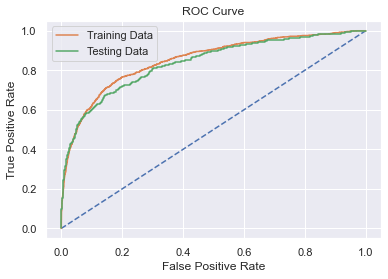

In [452]:
plt.plot([0, 1], [0, 1], linestyle='--')
train_auc,train_fpr, train_tpr, train_thresholds = calc_auc_roc(best_model,y_train,X_train,'Training Data')
print('AUC for Train dataset: %.3f' % train_auc)
test_auc,test_fpr, test_tpr, test_thresholds = calc_auc_roc(best_model,y_test,X_test,'Testing Data')
print('AUC for Train dataset: %.3f' % test_auc)
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

### Training Data and Test Data Confusion Matrix Comparison

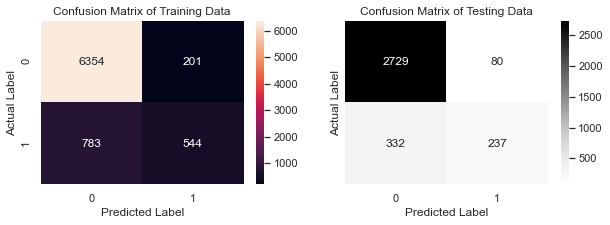

In [453]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False,figsize= (10,3))

#Plotting confusion matrix for the different models for the Training Data
sns.set(font_scale=1)
plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,ytrain_predict)),annot=True,fmt='.5g',ax=a[0][0]);
a[0][0].set(xlabel = "Predicted Label",ylabel="Actual Label")
a[0][0].set_title('Confusion Matrix of Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,ytest_predict)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Confusion Matrix of Testing Data')
a[0][1].set(xlabel = "Predicted Label",ylabel="Actual Label");


### Training Data and Test Data Classification Report Comparison

In [454]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,ytrain_predict),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,ytest_predict),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.89      0.97      0.93      6555
           1       0.73      0.41      0.53      1327

    accuracy                           0.88      7882
   macro avg       0.81      0.69      0.73      7882
weighted avg       0.86      0.88      0.86      7882
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.89      0.97      0.93      2809
           1       0.75      0.42      0.53       569

    accuracy                           0.88      3378
   macro avg       0.82      0.69      0.73      3378
weighted avg       0.87      0.88      0.86      3378
 



## Choosing the optimal threshold

In [455]:
optimal_idx = np.argmax(train_tpr - train_fpr)
optimal_threshold = train_thresholds[optimal_idx]
optimal_threshold

0.19421550468717758

## Checking for Threshhold = 0.194

### Prediction on Train & Test set

In [456]:
### Prediction on Train & Test set
threshold = 0.194

y_predict_train = best_model.predict_proba(X_train)[:, 1]
y_predict_test = best_model.predict_proba(X_test)[:, 1]
ytrain_predict = class_pred_diff_threshold(y_predict_train,threshold)
ytest_predict = class_pred_diff_threshold(y_predict_test,threshold)
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,ytrain_predict),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,ytest_predict),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.94      0.81      0.87      6555
           1       0.45      0.75      0.56      1327

    accuracy                           0.80      7882
   macro avg       0.70      0.78      0.72      7882
weighted avg       0.86      0.80      0.82      7882
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.93      0.81      0.87      2809
           1       0.43      0.71      0.54       569

    accuracy                           0.79      3378
   macro avg       0.68      0.76      0.70      3378
weighted avg       0.85      0.79      0.81      3378
 



for 19.4% threshhold, we can see that recall has gone up to 71% but precision has fallen to 43%. Overall f1 score which is a combination of recall and precision has increased by 1%. We can notice a 23% increase in recall at a cost of 30% precision.

### LDA Conclusion

We have run the base model and model fine tuned using grid search and then used the optimal threshhold for best recall. Different evaluation meterics results for all three model run are as shown below :-

<b>Train Data</b>

   <b> Base model - </b>
        AUC: 85%,  Accuracy: 88%, Precision: 73%, Recall: 41%, f1-Score: 53%
    
   <b>Tuned model - </b>
        AUC: 85%,  Accuracy: 88%, Precision: 73%, Recall: 41%, f1-Score: 53%
    
   <b>Tuned and with optimal threshhold - </b>
        AUC: 85%,  Accuracy: 80%, Precision: %45, Recall: 75%, f1-Score: 56%

<b>Test Data </b>

   <b> Base model - </b>
        AUC: 84%,  Accuracy: 88%, Precision: 75%, Recall: 42%, f1-Score: 53%
    
   <b>Tuned model - </b>
        AUC: 84%,  Accuracy: 88%, Precision: 75%, Recall: 42%, f1-Score: 53%
    
   <b>Tuned and with optimal threshhold - </b>
        AUC: 84%,  Accuracy: 79%, Precision: 43%, Recall: 71%, f1-Score: 54%



- **Train and Test dataset have similar statistics, hence model is giving similar result for test and train data set..**


- We can see that overall accuracy is high (around %)79 but with recall rate is less(71%). With this recall rate, model is only able to predict 71% of account getting churned correctly out of the total account getting churned.

- Precision is 43% of test data which means, out of total account predicted by model as churned, 43% accunt actually churned. 

- F1-score is the harmonic mean of precision and recall, it takes into the effect of both the scores and this value is low if any of these 2 value is low.

- Since we are building a model to predict whether account will churn or not, for practical purposes, we will be more interested in correctly classifying 1 (account getting churned) than 0(account not getting churned).

- If a account not churning is incorrectly predicted to be "churned" by the model, then the impact on cost for DTH company would be less. But if a account who actually churned is incorrectly predicted to be not churned by the model, then the cost impact would be very high for the DTH company. Hence recall rate (actual data point identified as True by model) is very important in this scenario.

- For 19.4% threshhold, we can see that recall has gone up to 71% but precision has fallen to 43%. Overall f1 score which is a combination of recall and precision has increased by 1%. We can notice a 23% increase in recall at a cost of 30% precision. 

- **Best model is with optimal threshhold since its best recall and f1 score**


### Naïve Bayes Model

In [229]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [459]:
NB_model = GaussianNB()

In [462]:
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(NB_model, X_train, y_train, scoring='recall', cv=cv, n_jobs=-1, error_score='raise')
# summarize result
print (scores)
print('Mean recall: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

[0.56015038 0.51503759 0.56226415 0.5509434  0.48679245 0.55639098
 0.56015038 0.51320755 0.54716981 0.55471698 0.54887218 0.52631579
 0.54339623 0.59245283 0.52075472]
Mean recall: 0.543 (0.025)


## Model Evaluation

In [463]:
# Accuracy - Training Data
model=NB_model.fit(X_train, y_train)
print ('Model score for training dataset', model.score(X_train, y_train))
print ('Model score for testing dataset',model.score(X_test, y_test))

Model score for training dataset 0.8367165693986298
Model score for testing dataset 0.8321492007104796


C:\Users\ragha\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


We can see that score of train and test data set is within 5% range. Hence model appears good. 

In [464]:
model

GaussianNB()

In [465]:
# Prediction on the training & Test set

ytrain_predict = model.predict(X_train)
ytest_predict = model.predict(X_test)

### AUC and ROC for the training data & test data

AUC for Train dataset: 0.811
AUC for Train dataset: 0.788


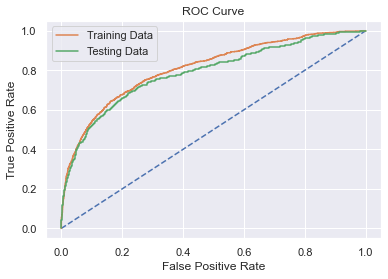

In [466]:
plt.plot([0, 1], [0, 1], linestyle='--')
train_auc,train_fpr, train_tpr, train_thresholds = calc_auc_roc(model,y_train,X_train,'Training Data')
print('AUC for Train dataset: %.3f' % train_auc)
test_auc,test_fpr, test_tpr, test_thresholds = calc_auc_roc(model,y_test,X_test,'Testing Data')
print('AUC for Train dataset: %.3f' % test_auc)
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

### Confusion Matrix for the training data and testing data

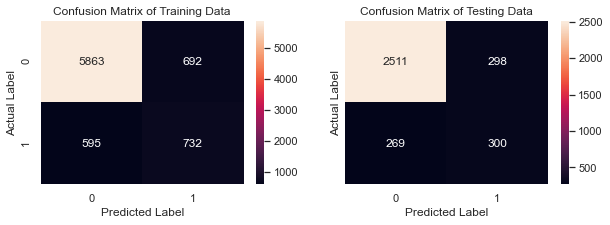

In [467]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False,figsize= (10,3))

#Plotting confusion matrix for the different models for the Training Data
# sns.set(font_scale=2)
plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,ytrain_predict)),annot=True,fmt='.5g',ax=a[0][0]);
a[0][0].set(xlabel = "Predicted Label",ylabel="Actual Label")
a[0][0].set_title('Confusion Matrix of Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,ytest_predict)),annot=True,fmt='.5g',ax=a[0][1]);
a[0][1].set_title('Confusion Matrix of Testing Data')
a[0][1].set(xlabel = "Predicted Label",ylabel="Actual Label");


### Training Data and Test Data Classification Report Comparison

In [468]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,ytrain_predict),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,ytest_predict),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.91      0.89      0.90      6555
           1       0.51      0.55      0.53      1327

    accuracy                           0.84      7882
   macro avg       0.71      0.72      0.72      7882
weighted avg       0.84      0.84      0.84      7882
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.90      0.89      0.90      2809
           1       0.50      0.53      0.51       569

    accuracy                           0.83      3378
   macro avg       0.70      0.71      0.71      3378
weighted avg       0.84      0.83      0.83      3378
 



## Tuning for Naïve Bayes

There are almost no hyper parameters for Naive Bayes model. Just trying with priors and smoothing factor to see whether there is any improvment in score

In [475]:
grid={'priors':[None],
     'var_smoothing': [1e-01,1e-02,1e-03,1e-04] #1e-10,1e-08,1e-09,1e-08,1e-07,1e-06
     }    

In [476]:
NB_model = GaussianNB()

In [477]:
NB_model.get_params().keys()

dict_keys(['priors', 'var_smoothing'])

In [478]:
# grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 3,n_jobs=-1,scoring='f1')
cv_value=3
grid_search = run_gridsearch(NB_model,grid,X_train, y_train,cv)
result = pd.DataFrame(grid_search.cv_results_)
#check_performance(grid_search,X_train, X_test, y_train, y_test)
## Scoring - Strategy to evaluate the performance of the cross-validated model on the test set.


 Running grid search

Fitting 15 folds for each of 4 candidates, totalling 60 fits

 Showing best parameters for the grid search

{'priors': None, 'var_smoothing': 0.0001}

 Showing best score for the grid search

0.5428249869957914


C:\Users\ragha\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [479]:
best_model = grid_search.best_estimator_

In [480]:
# Prediction on the training set

ytrain_predict = best_model.predict(X_train)
ytest_predict = best_model.predict(X_test)

## Model Evaluation

In [481]:
# Accuracy - Training Data
print ('Model score for training dataset', best_model.score(X_train, y_train))
print ('Model score for testing dataset',best_model.score(X_test, y_test))

Model score for training dataset 0.8368434407510784
Model score for testing dataset 0.8327412670219064


### AUC and ROC for the training data & test data

AUC for Train dataset: 0.811
AUC for Train dataset: 0.788


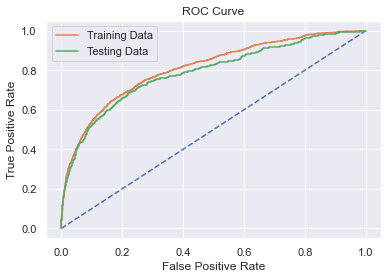

In [482]:
plt.plot([0, 1], [0, 1], linestyle='--')
train_auc,train_fpr, train_tpr, train_thresholds = calc_auc_roc(best_model,y_train,X_train,'Training Data')
print('AUC for Train dataset: %.3f' % train_auc)
test_auc,test_fpr, test_tpr, test_thresholds = calc_auc_roc(best_model,y_test,X_test,'Testing Data')
print('AUC for Train dataset: %.3f' % test_auc)
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

### Training Data and Test Data Confusion Matrix Comparison

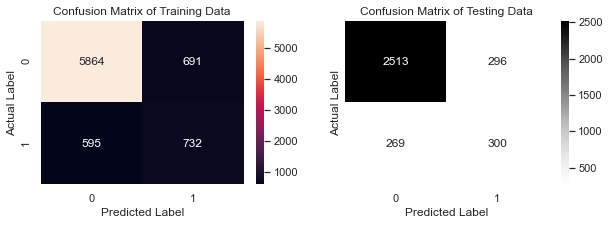

In [483]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False,figsize= (10,3))

#Plotting confusion matrix for the different models for the Training Data
sns.set(font_scale=1)
plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,ytrain_predict)),annot=True,fmt='.5g',ax=a[0][0]);
a[0][0].set(xlabel = "Predicted Label",ylabel="Actual Label")
a[0][0].set_title('Confusion Matrix of Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,ytest_predict)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Confusion Matrix of Testing Data')
a[0][1].set(xlabel = "Predicted Label",ylabel="Actual Label");


### Training Data and Test Data Classification Report Comparison

In [484]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,ytrain_predict),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,ytest_predict),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.91      0.89      0.90      6555
           1       0.51      0.55      0.53      1327

    accuracy                           0.84      7882
   macro avg       0.71      0.72      0.72      7882
weighted avg       0.84      0.84      0.84      7882
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.90      0.89      0.90      2809
           1       0.50      0.53      0.52       569

    accuracy                           0.83      3378
   macro avg       0.70      0.71      0.71      3378
weighted avg       0.84      0.83      0.83      3378
 



## Choosing the optimal threshold

In [485]:
optimal_idx = np.argmax(train_tpr - train_fpr)
optimal_threshold = train_thresholds[optimal_idx]
optimal_threshold

0.3125431832838148

## Checking for Threshhold = 0.312

### Prediction on Train & Test set

In [487]:
### Prediction on Train & Test set
threshold = 0.312

y_predict_train = best_model.predict_proba(X_train)[:, 1]
y_predict_test = best_model.predict_proba(X_test)[:, 1]
ytrain_predict = class_pred_diff_threshold(y_predict_train,threshold)
ytest_predict = class_pred_diff_threshold(y_predict_test,threshold)
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,ytrain_predict),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,ytest_predict),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.92      0.81      0.86      6555
           1       0.41      0.67      0.51      1327

    accuracy                           0.78      7882
   macro avg       0.67      0.74      0.69      7882
weighted avg       0.84      0.78      0.80      7882
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.92      0.80      0.86      2809
           1       0.40      0.66      0.50       569

    accuracy                           0.78      3378
   macro avg       0.66      0.73      0.68      3378
weighted avg       0.83      0.78      0.80      3378
 



For 31.2% threshhold, we can see that recall has gone up to 66% but precision has fallen to 40%. Overall f1 score which is a combination of recall and precision has decreased by 2%. We can notice a 13% increase in recall at a cost of 10% precision.

### Naïve Conclusion

We have run the base model and model fine tuned using grid search and then used the optimal threshhold for best recall. Different evaluation meterics results for all three model run are as shown below :-

<b>Train Data</b>

   <b> Base model - </b>
        AUC: 81%,  Accuracy: 84%, Precision: 51%, Recall: 55%, f1-Score: 53%
    
   <b>Tuned model - </b>
        AUC: 81%,  Accuracy: 84%, Precision: 51%, Recall: 55%, f1-Score: 53%
    
   <b>Tuned and with optimal threshhold - </b>
        AUC: 81%,  Accuracy: 78%, Precision: %41, Recall: 67%, f1-Score: 51%

<b>Test Data </b>

   <b> Base model - </b>
        AUC: 79%,  Accuracy: 83%, Precision: 50%, Recall: 53%, f1-Score: 51%
    
   <b>Tuned model - </b>
        AUC: 79%,  Accuracy: 83%, Precision: 50%, Recall: 53%, f1-Score: 52%
    
   <b>Tuned and with optimal threshhold - </b>
        AUC: 79%,  Accuracy: 78%, Precision: 40%, Recall: 66%, f1-Score: 50%



- **Train and Test dataset have similar statistics, hence model is giving similar result for test and train data set..**


- We can see that overall accuracy is high (around 78%) but with recall rate is less(66%). With this recall rate, model is only able to predict 66% of account getting churned correctly out of the total account getting churned.

- Precision is 40% of test data which means, out of total account predicted by model as churned, 40% accunt actually churned. 

- F1-score is the harmonic mean of precision and recall, it takes into the effect of both the scores and this value is low if any of these 2 value is low.

- Since we are building a model to predict whether account will churn or not, for practical purposes, we will be more interested in correctly classifying 1 (account getting churned) than 0(account not getting churned).

- If a account not churning is incorrectly predicted to be "churned" by the model, then the impact on cost for DTH company would be less. But if a account who actually churned is incorrectly predicted to be not churned by the model, then the cost impact would be very high for the DTH company. Hence recall rate (actual data point identified as True by model) is very important in this scenario.

- For 31.2% threshhold, we can see that recall has gone up to 66% but precision has fallen to 40%. Overall f1 score which is a combination of recall and precision has decreased by 2%. We can notice a 13% increase in recall at a cost of 10% precision.

- **Best model is with optimal threshhold since its best recall and f1 score**


## KNN Model

In [175]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model=KNeighborsClassifier()

In [490]:
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(KNN_model, X_train, y_train, scoring='recall', cv=cv, n_jobs=-1, error_score='raise')
# summarize result
print('Mean Recall: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Mean Recall: 0.720 (0.033)


## Model Evaluation

In [491]:
# Accuracy - Training Data
model=KNN_model.fit(X_train,y_train)
print ('Model score for training dataset', model.score(X_train, y_train))
print ('Model score for testing dataset',model.score(X_test, y_test))

C:\Users\ragha\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model score for training dataset 0.9781781273788379
Model score for testing dataset 0.9526346950858496


We can see that score of train and test data set is almost in 5% range. Hence model appears good. 

In [492]:
# Prediction on the training & Test set

ytrain_predict = model.predict(X_train)
ytest_predict = model.predict(X_test)
print('\nClassification Report of the training data:\n\n',metrics.classification_report(y_train,ytrain_predict),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,ytest_predict),'\n')


Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.98      0.99      0.99      6555
           1       0.96      0.90      0.93      1327

    accuracy                           0.98      7882
   macro avg       0.97      0.95      0.96      7882
weighted avg       0.98      0.98      0.98      7882
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.96      0.99      0.97      2809
           1       0.92      0.79      0.85       569

    accuracy                           0.95      3378
   macro avg       0.94      0.89      0.91      3378
weighted avg       0.95      0.95      0.95      3378
 



### Finding optimal number of neighbours for KNN model

Now this score is for default n_neighbors=5, now lets check for other values of n_neighbor

**Run the KNN with no of neighbours to be 1,3,5..19 and *Find the optimal number of neighbours from K=1,3,5,7....19 using the Mis classification error**

Misclassification error **(MCE) = 1 - Test accuracy score.** Calculated MCE for each model with neighbours = 1,3,5...19 and find the model with lowest MCE

In [504]:
# empty list that will hold accuracy scores
ac_scores = []

# perform accuracy metrics for values from 1,3,5....19
for k in range(1,20,2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    # evaluate test accuracy
    scores = knn.score(X_test, y_test)
    ac_scores.append(scores)

# changing to misclassification error
MCE = [1 - x for x in ac_scores]
MCE

C:\Users\ragha\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\ragha\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\ragha\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\ragha\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

[0.018354055654233314,
 0.03404381290704561,
 0.047365304914150363,
 0.06601539372409715,
 0.07726465364120783,
 0.08644168146832443,
 0.09621077560686797,
 0.10213143872113672,
 0.10449970396684427,
 0.10775606867969212]

**Plot misclassification error vs k (with k value on X-axis) using matplotlib**

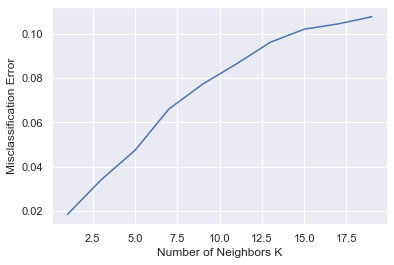

In [505]:
import matplotlib.pyplot as plt
# plot misclassification error vs k
plt.plot(range(1,20,2), MCE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

For K = 1 it is giving the best test accuracy but K=1 is too noisy, lets check train and test for K=3

In [211]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model=KNeighborsClassifier(n_neighbors=3)
model=KNN_model.fit(X_train,y_train)
print ('Model score for training dataset', model.score(X_train, y_train))
print ('Model score for testing dataset',model.score(X_test, y_test))
ytrain_predict = model.predict(X_train)
ytest_predict = model.predict(X_test)
print('\nClassification Report of the training data:\n\n',metrics.classification_report(y_train,ytrain_predict),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,ytest_predict),'\n')

C:\Users\ragha\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model score for training dataset 0.9909921339761482
Model score for testing dataset 0.9659561870929544

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.99      1.00      0.99      6555
           1       0.98      0.96      0.97      1327

    accuracy                           0.99      7882
   macro avg       0.99      0.98      0.98      7882
weighted avg       0.99      0.99      0.99      7882
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.97      0.98      0.98      2809
           1       0.92      0.87      0.90       569

    accuracy                           0.97      3378
   macro avg       0.95      0.93      0.94      3378
weighted avg       0.97      0.97      0.97      3378
 



We can see that for K value of 3, we are getting better f1 score and difference in train and test accuracy is the least. 
So we will go for n_neighbor =3

In [212]:
KNN_model=KNeighborsClassifier(n_neighbors=3)
model=KNN_model.fit(X_train,y_train)
print ('Model score for training dataset', model.score(X_train, y_train))
print ('Model score for testing dataset',model.score(X_test, y_test))
ytrain_predict = model.predict(X_train)
ytest_predict = model.predict(X_test)


C:\Users\ragha\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model score for training dataset 0.9909921339761482
Model score for testing dataset 0.9659561870929544


### AUC and ROC for the training data & test data

AUC for Train dataset: 0.999
AUC for Train dataset: 0.978


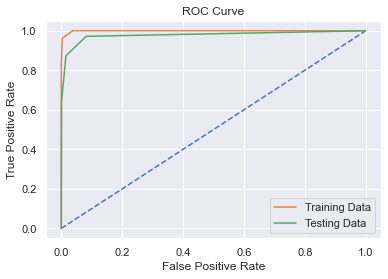

In [213]:
plt.plot([0, 1], [0, 1], linestyle='--')
train_auc,train_fpr, train_tpr, train_thresholds = calc_auc_roc(model,y_train,X_train,'Training Data')
print('AUC for Train dataset: %.3f' % train_auc)
test_auc,test_fpr, test_tpr, test_thresholds = calc_auc_roc(model,y_test,X_test,'Testing Data')
print('AUC for Train dataset: %.3f' % test_auc)
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

### Confusion Matrix for the training data and testing data

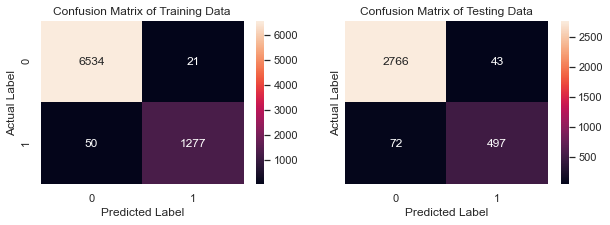

In [214]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False,figsize= (10,3))

#Plotting confusion matrix for the different models for the Training Data
# sns.set(font_scale=2)
plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,ytrain_predict)),annot=True,fmt='.5g',ax=a[0][0]);
a[0][0].set(xlabel = "Predicted Label",ylabel="Actual Label")
a[0][0].set_title('Confusion Matrix of Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,ytest_predict)),annot=True,fmt='.5g',ax=a[0][1]);
a[0][1].set_title('Confusion Matrix of Testing Data')
a[0][1].set(xlabel = "Predicted Label",ylabel="Actual Label");


## Applying GridSearchCV for KNN

For tuning of KNN, we are trying with different distances, algorithms and weights to check if we are getting better results.

In [511]:
KNN_model=KNeighborsClassifier()

In [300]:
grid = {'n_neighbors': [3], #[i for i in range(5,18,2)],
         'algorithm': ['auto'],  # ,'ball_tree','kd_tree','brute'
         'leaf_size':[30],    #i for i in range(1,30,2)
         'p':[1,2],  #1
        'metric':['minkowski'],  #,'euclidean','manhattan','chebyshev', 'mahanalobis'
        'weights':['uniform','distance']
         }


In [301]:
KNN_model.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [326]:
# grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 3,n_jobs=-1,scoring='f1')
cv_value=3
grid_search = run_gridsearch(KNN_model,grid,X_train, y_train,cv_value)
result = pd.DataFrame(grid_search.cv_results_)
#check_performance(grid_search,X_train, X_test, y_train, y_test)
## Scoring - Strategy to evaluate the performance of the cross-validated model on the test set.


 Running grid search

Fitting 3 folds for each of 4 candidates, totalling 12 fits

 Showing best parameters for the grid search

{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'n_neighbors': 3, 'p': 1, 'weights': 'distance'}

 Showing best score for the grid search

0.8402449363145155


C:\Users\ragha\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [327]:
best_model = grid_search.best_estimator_

In [328]:
# Prediction on the training set

ytrain_predict = best_model.predict(X_train)
ytest_predict = best_model.predict(X_test)

In [329]:
## Getting the probabilities on the test set

ytest_predict_prob=best_model.predict_proba(X_test)
#pd.DataFrame(ytest_predict_prob).head()

## Model Evaluation

In [330]:
# Accuracy - Training Data
print ('Model score for training dataset', best_model.score(X_train, y_train))
print ('Model score for testing dataset',best_model.score(X_test, y_test))

Model score for training dataset 1.0
Model score for testing dataset 0.9834221432800474


### AUC and ROC for the training data & test data

AUC for Train dataset: 1.000
AUC for Train dataset: 0.998


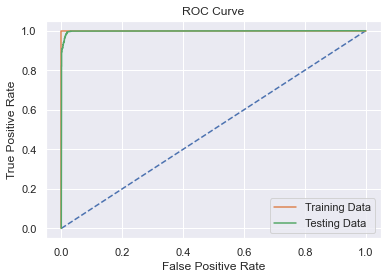

In [331]:
plt.plot([0, 1], [0, 1], linestyle='--')
train_auc,train_fpr, train_tpr, train_thresholds = calc_auc_roc(best_model,y_train,X_train,'Training Data')
print('AUC for Train dataset: %.3f' % train_auc)
test_auc,test_fpr, test_tpr, test_thresholds = calc_auc_roc(best_model,y_test,X_test,'Testing Data')
print('AUC for Train dataset: %.3f' % test_auc)
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

### Training Data and Test Data Confusion Matrix Comparison

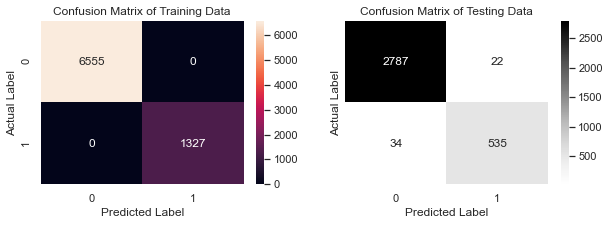

In [332]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False,figsize= (10,3))

#Plotting confusion matrix for the different models for the Training Data
sns.set(font_scale=1)
plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,ytrain_predict)),annot=True,fmt='.5g',ax=a[0][0]);
a[0][0].set(xlabel = "Predicted Label",ylabel="Actual Label")
a[0][0].set_title('Confusion Matrix of Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,ytest_predict)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Confusion Matrix of Testing Data')
a[0][1].set(xlabel = "Predicted Label",ylabel="Actual Label");


### Training Data and Test Data Classification Report Comparison

In [333]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,ytrain_predict),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,ytest_predict),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00      6555
           1       1.00      1.00      1.00      1327

    accuracy                           1.00      7882
   macro avg       1.00      1.00      1.00      7882
weighted avg       1.00      1.00      1.00      7882
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.99      0.99      0.99      2809
           1       0.96      0.94      0.95       569

    accuracy                           0.98      3378
   macro avg       0.97      0.97      0.97      3378
weighted avg       0.98      0.98      0.98      3378
 



### KNN Conclusion

We have run the base model and model fine tuned using grid search for n = 3 (nearest neighbour). Different evaluation meterics results for all the model run are as shown below :-

<b>Train Data</b>

   <b> Base model - </b>
        AUC: 100%, Accuracy: 100%, Precision: 100%, Recall: 100%, f1-Score: 100%
    
   <b>Tuned model - </b>
        AUC: 100%,  Accuracy: 100%, Precision: 100%, Recall: 100%, f1-Score: 100%
    
<b>Test Data </b>

   <b> Base model - </b>
        AUC: 98%,  Accuracy: 98%, Precision: 94%, Recall: 95%, f1-Score: 95%
    
   <b>Tuned model - </b>
        AUC: 99.8%,  Accuracy: 98%, Precision: 96%, Recall: 94%, f1-Score: 95%
    

- **Train and Test dataset have similar statistics, hence model is giving similar result for test and train data set..**


- We can see that overall accuracy is high (around 98%) but with high recall rate(94%). With this recall rate, model is able to predict 94% of account getting churned correctly out of the total account getting churned.

- Precision is 96% of test data which means, out of total account predicted by model as churned, 96% accunt actually churned. 

- F1-score is the harmonic mean of precision and recall, it takes into the effect of both the scores and this value is low if any of these 2 value is low.

- Since we are building a model to predict whether account will churn or not, for practical purposes, we will be more interested in correctly classifying 1 (account getting churned) than 0(account not getting churned).

- If a account not churning is incorrectly predicted to be "churned" by the model, then the impact on cost for DTH company would be less. But if a account who actually churned is incorrectly predicted to be not churned by the model, then the cost impact would be very high for the DTH company. Hence recall rate (actual data point identified as True by model) is very important in this scenario.


- **Best model is with tuned model since its best recall and f1 score**

## Random Forest

In [199]:
from sklearn.ensemble import RandomForestClassifier

In [200]:
RF_model=RandomForestClassifier(n_estimators=100,random_state=1)

In [201]:
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(RF_model, X_train, y_train, scoring='recall', cv=cv, n_jobs=-1, error_score='raise')
# summarize result
print (scores)
print('Mean Recall: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

[0.73684211 0.72932331 0.77358491 0.70188679 0.70188679 0.73684211
 0.77443609 0.72075472 0.70188679 0.6754717  0.72556391 0.77067669
 0.73584906 0.75849057 0.72075472]
Mean Recall: 0.731 (0.028)


## Model Evaluation

In [202]:
# Accuracy - Training Data
model=RF_model.fit(X_train, y_train)
print ('Model score for training dataset', model.score(X_train, y_train))
print ('Model score for testing dataset',model.score(X_test, y_test))

<ipython-input-202-1652d00f1c10>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model=RF_model.fit(X_train, y_train)


Model score for training dataset 1.0
Model score for testing dataset 0.9674363528715216


We can see that score of train and test data set varies for around 17%. Hence this model is overfitting

In [203]:
model

RandomForestClassifier(random_state=1)

In [204]:
# Prediction on the training & Test set

ytrain_predict = model.predict(X_train)
ytest_predict = model.predict(X_test)

### AUC and ROC for the training data & test data

AUC for Train dataset: 1.000
AUC for Train dataset: 0.992


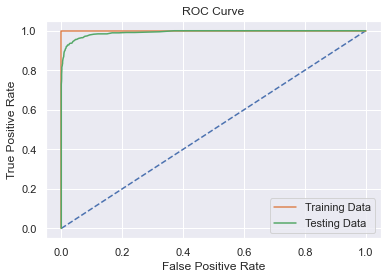

In [205]:
plt.plot([0, 1], [0, 1], linestyle='--')
train_auc,train_fpr, train_tpr, train_thresholds = calc_auc_roc(model,y_train,X_train,'Training Data')
print('AUC for Train dataset: %.3f' % train_auc)
test_auc,test_fpr, test_tpr, test_thresholds = calc_auc_roc(model,y_test,X_test,'Testing Data')
print('AUC for Train dataset: %.3f' % test_auc)
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

### Confusion Matrix for the training data and testing data

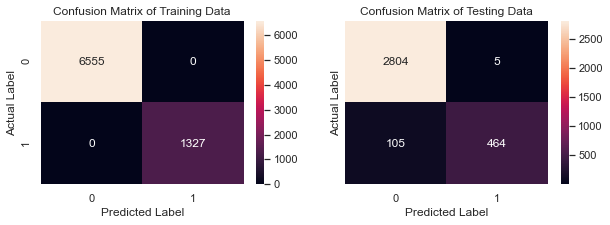

In [206]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False,figsize= (10,3))

#Plotting confusion matrix for the different models for the Training Data
# sns.set(font_scale=2)
plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,ytrain_predict)),annot=True,fmt='.5g',ax=a[0][0]);
a[0][0].set(xlabel = "Predicted Label",ylabel="Actual Label")
a[0][0].set_title('Confusion Matrix of Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,ytest_predict)),annot=True,fmt='.5g',ax=a[0][1]);
a[0][1].set_title('Confusion Matrix of Testing Data')
a[0][1].set(xlabel = "Predicted Label",ylabel="Actual Label");


### Training Data and Test Data Classification Report Comparison

In [207]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,ytrain_predict),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,ytest_predict),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00      6555
           1       1.00      1.00      1.00      1327

    accuracy                           1.00      7882
   macro avg       1.00      1.00      1.00      7882
weighted avg       1.00      1.00      1.00      7882
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.96      1.00      0.98      2809
           1       0.99      0.82      0.89       569

    accuracy                           0.97      3378
   macro avg       0.98      0.91      0.94      3378
weighted avg       0.97      0.97      0.97      3378
 



In [208]:
X_train.shape

(7882, 23)

## Applying GridSearchCV for Random Forest

Initially we need to assume values of search grid parameters. 
 
Initially, we are taking max_depth as [10 20]

max_features is taken as [3 5]. 5 is square root of max features.

min_samples_leaf is normally taken around 1-3% of observations (1061 in train) , hence taking it as [70 210]

min_samples_split is normally 3 times min_samples_leaf, hence taking it as [210 600].

CV parameter is taken as 3 (3 cross fold validation)

n_estimators is taken as 101 intially. Large no of estimators will increase the search time.

In [209]:
grid = {
    'max_depth': [None],  # 10,20
    'max_features': [8,9], # 3,10,11
    'min_samples_leaf': [1],  # 70,210,40,50,70
    'min_samples_split': [2],  # 210, 600,100,140,20,30,5,8,10
    'n_estimators': [500,550]  # 100, 90, 120
}   

In [210]:
RF_model=RandomForestClassifier(random_state=1)

In [211]:
RF_model.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [212]:
# grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 3,n_jobs=-1,scoring='f1')
# cv_value=3
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
grid_search = run_gridsearch(RF_model,grid,X_train, y_train,cv)
result = pd.DataFrame(grid_search.cv_results_)
#check_performance(grid_search,X_train, X_test, y_train, y_test)
## Scoring - Strategy to evaluate the performance of the cross-validated model on the test set.


 Running grid search

Fitting 15 folds for each of 4 candidates, totalling 60 fits


C:\Users\ragha\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:880: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)



 Showing best parameters for the grid search

{'max_depth': None, 'max_features': 9, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 550}

 Showing best score for the grid search

0.7570700335745022


Now tuning further with reducing min_samples_leaf and min_samples_split values and changing other values for which accuracy increases

In [213]:
best_model = grid_search.best_estimator_

In [214]:
# Prediction on the training set

ytrain_predict = best_model.predict(X_train)
ytest_predict = best_model.predict(X_test)

## Model Evaluation

In [215]:
# Accuracy - Training Data
print ('Model score for training dataset', best_model.score(X_train, y_train))
print ('Model score for testing dataset',best_model.score(X_test, y_test))

Model score for training dataset 1.0
Model score for testing dataset 0.96299585553582


### AUC and ROC for the training data & test data

AUC for Train dataset: 1.000
AUC for Train dataset: 0.988


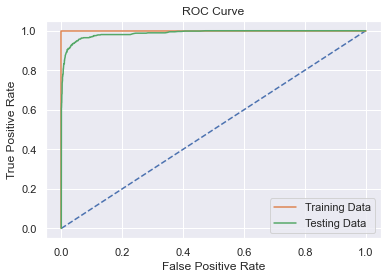

In [216]:
plt.plot([0, 1], [0, 1], linestyle='--')
train_auc,train_fpr, train_tpr, train_thresholds = calc_auc_roc(best_model,y_train,X_train,'Training Data')
print('AUC for Train dataset: %.3f' % train_auc)
test_auc,test_fpr, test_tpr, test_thresholds = calc_auc_roc(best_model,y_test,X_test,'Testing Data')
print('AUC for Train dataset: %.3f' % test_auc)
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

### Training Data and Test Data Confusion Matrix Comparison

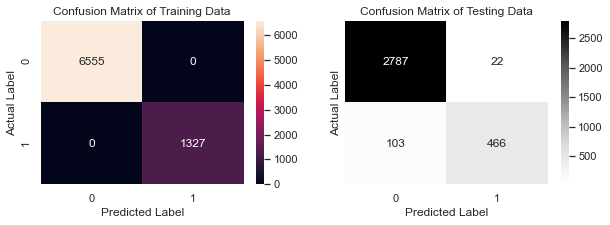

In [217]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False,figsize= (10,3))

#Plotting confusion matrix for the different models for the Training Data
sns.set(font_scale=1)
plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,ytrain_predict)),annot=True,fmt='.5g',ax=a[0][0]);
a[0][0].set(xlabel = "Predicted Label",ylabel="Actual Label")
a[0][0].set_title('Confusion Matrix of Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,ytest_predict)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Confusion Matrix of Testing Data')
a[0][1].set(xlabel = "Predicted Label",ylabel="Actual Label");


### Training Data and Test Data Classification Report Comparison

In [218]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,ytrain_predict),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,ytest_predict),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00      6555
           1       1.00      1.00      1.00      1327

    accuracy                           1.00      7882
   macro avg       1.00      1.00      1.00      7882
weighted avg       1.00      1.00      1.00      7882
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.96      0.99      0.98      2809
           1       0.95      0.82      0.88       569

    accuracy                           0.96      3378
   macro avg       0.96      0.91      0.93      3378
weighted avg       0.96      0.96      0.96      3378
 



## Choosing the optimal threshold

In [219]:
optimal_idx = np.argmax(train_tpr - train_fpr)
optimal_threshold = train_thresholds[optimal_idx]
optimal_threshold

0.6309090909090909

## Checking for Threshhold = 0.6309

### Prediction on Train & Test set

In [220]:
### Prediction on Train & Test set
threshold = 0.31

y_predict_train = best_model.predict_proba(X_train)[:, 1]
y_predict_test = best_model.predict_proba(X_test)[:, 1]
ytrain_predict = class_pred_diff_threshold(y_predict_train,threshold)
ytest_predict = class_pred_diff_threshold(y_predict_test,threshold)
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,ytrain_predict),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,ytest_predict),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00      6555
           1       1.00      1.00      1.00      1327

    accuracy                           1.00      7882
   macro avg       1.00      1.00      1.00      7882
weighted avg       1.00      1.00      1.00      7882
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.98      0.97      0.98      2809
           1       0.86      0.92      0.89       569

    accuracy                           0.96      3378
   macro avg       0.92      0.94      0.93      3378
weighted avg       0.96      0.96      0.96      3378
 



For 31% threshhold, we can see that recall has gone up to 92% but precision has fallen to 86%. Overall f1 score which is a combination of recall and precision has increased by 1%. We can notice a 10% increase in recall at a cost of 9% precision.

### Variable Importance

In [221]:
df2_fi=pd.DataFrame(best_model.feature_importances_*100, columns = ["Important Feature"], index = X_train.columns).sort_values('Important Feature',ascending=False)
df2_fi

Important Feature
Tenure                           18.342382
Cashback                         11.040217
Day_Since_CC_Connect              8.078120
CC_Contacted_LY                   7.298514
Complain_LY                       7.099946
Rev_Per_Month                     6.337244
Rev_Growth_YOY                    5.933782
CC_Agent_Score                    5.528510
Account_User_Count                4.031897
Marital_Status_Single             3.134860
City_Tier                         2.801081
Account_Segment                   2.695019
Coupon_Used_For_Payment           2.656943
Service_Score                     2.113595
Login_device_Mobile               1.951038
Gender_Male                       1.776245
Is_Reg_Sup                        1.752149
Is_COD_Ewallet                    1.591369
Payment_Credit Card               1.452143
Marital_Status_Married            1.261477
Payment_Debit Card                1.220991
Payment_E wallet                  1.099306
Payment_UPI                       0.803172

In [222]:
df_rf_fi = df2_fi.copy()
df_rf_fi.rename(columns = {'Important Feature':'RF_FI'},inplace=True)

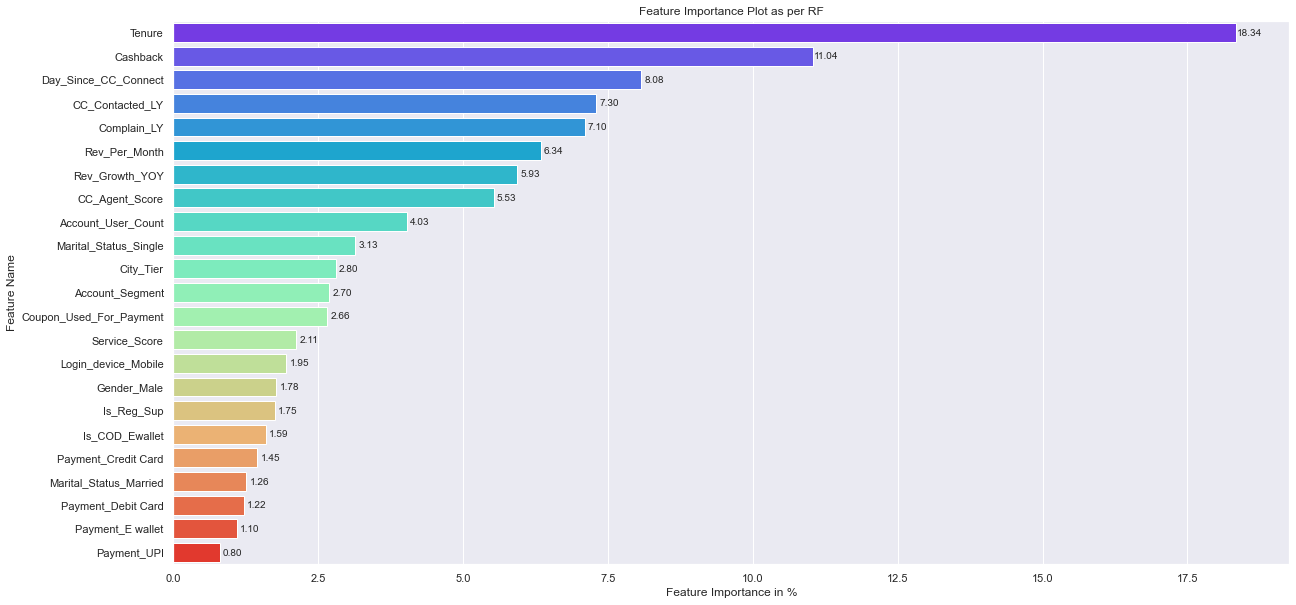

In [699]:
plt.figure(figsize=(20,10))
plots=sns.barplot(data=df2_fi,x="Important Feature",y=df2_fi.index,palette='rainbow')
plt.ylabel('Feature Name')
plt.xlabel('Feature Importance in %')
plt.title('Feature Importance Plot as per RF')

# Iterrating over the bars one-by-one 
for bar in plots.patches: 
      #print ('bar_width:', format(bar.get_width(), '.2f'),'bar_height:' , bar.get_height(), 'get_x:', bar.get_x() ,'get_y', bar.get_y() )
      plots.annotate(format(bar.get_width(), '.2f'), (bar.get_width() , bar.get_y() + bar.get_height()/2),
                   ha='center', va='center', 
                   size=10, xytext=(13, 0), 
                   textcoords='offset points') 
plt.show()

#### As per this model, attributes like Tenure, Cashback, Days_Since_CC_Connect, Complain_LY and REV_PER_Month are the 5 best feautures
#### Payment_UPI, Payment_Ewallet, Payment_Debit Card are the features which are impacting least in predicting the churn

### Random Forest Conclusion

We have run the base model and model fine tuned using grid search and then used the optimal threshhold for best recall. Different evaluation meterics results for all three model run are as shown below :-

Train Data

Base model - AUC: 100%, Accuracy: 100%, Precision: 100%, Recall: 100%, f1-Score: 100%

Tuned model - AUC: 100%, Accuracy: 100%, Precision: 100%, Recall: 100%, f1-Score: 100%

Tuned and with optimal threshhold - AUC: 100%, Accuracy: 100%, Precision: 100%, Recall: 100%, f1-Score: 100%

Test Data

Base model - AUC: 99%, Accuracy: 97%, Precision: 99%, Recall: 82%, f1-Score: 89%

Tuned model - AUC: 99%, Accuracy: 96%, Precision: 95%, Recall: 82%, f1-Score: 88%

Tuned and with optimal threshhold - AUC: 99%, Accuracy: 96%, Precision: 86%, Recall: 92%, f1-Score: 89%

- **Train and Test dataset have similar statistics for accuracy and auc score but its slightly overfitting for f1 score**


- We can see that overall accuracy is high (around 96%) with good recall rate (92%). With this recall rate, model is able to predict 92% of account getting churned correctly out of the total account getting churned.

- Precision is 86% of test data which means, out of total account predicted by model as churned, 86% accunt actually churned. 

- F1-score is the harmonic mean of precision and recall, it takes into the effect of both the scores and this value is low if any of these 2 value is low.

- Since we are building a model to predict whether account will churn or not, for practical purposes, we will be more interested in correctly classifying 1 (account getting churned) than 0(account not getting churned).

- If a account not churning is incorrectly predicted to be "churned" by the model, then the impact on cost for DTH company would be less. But if a account who actually churned is incorrectly predicted to be not churned by the model, then the cost impact would be very high for the DTH company. Hence recall rate (actual data point identified as True by model) is very important in this scenario.

- For 31% threshhold, we can see that recall has gone up to 92% but precision has fallen to 86%. Overall f1 score which is a combination of recall and precision has increased by 1%. We can notice a 10% increase in recall at a cost of 9% precision.

- **Best model is with optimal threshhold since its best recall and f1 score**

- **As per this model, attributes like Tenure, Cashback, Days_Since_CC_Connect, Complain_LY and REV_PER_Month are the 5 best feautures**

- Payment_UPI, Payment_Ewallet, Payment_Debit Card are the features which are impacting least in predicting the churn¶


## Ada Boost

In [233]:
from sklearn.ensemble import AdaBoostClassifier

In [701]:
ADB_model = AdaBoostClassifier(n_estimators=100,random_state=1)

In [702]:
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(ADB_model, X_train, y_train, scoring='recall', cv=cv, n_jobs=-1, error_score='raise')
# summarize result
print (scores)
print('Mean Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

[0.46616541 0.5112782  0.46037736 0.46037736 0.44528302 0.48496241
 0.45864662 0.49056604 0.42264151 0.47169811 0.46240602 0.41729323
 0.4490566  0.48679245 0.49433962]
Mean Accuracy: 0.465 (0.025)


## Model Evaluation

In [703]:
# Accuracy - Training Data
model=ADB_model.fit(X_train, y_train)
print ('Model score for training dataset', model.score(X_train, y_train))
print ('Model score for testing dataset',model.score(X_test, y_test))

C:\Users\ragha\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Model score for training dataset 0.8844201979193098
Model score for testing dataset 0.8804026050917703


We can see that score of train and test data set varies for around 5-6%. Hence this model is good to go.

In [704]:
model

AdaBoostClassifier(n_estimators=100, random_state=1)

In [705]:
# Prediction on the training & Test set

ytrain_predict = model.predict(X_train)
ytest_predict = model.predict(X_test)

### AUC and ROC for the training data & test data

AUC for Train dataset: 0.901
AUC for Train dataset: 0.886


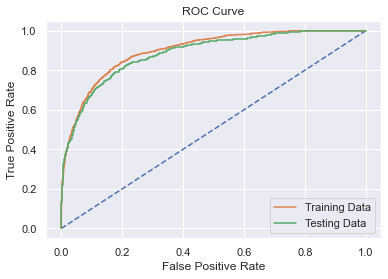

In [706]:
plt.plot([0, 1], [0, 1], linestyle='--')
train_auc,train_fpr, train_tpr, train_thresholds = calc_auc_roc(model,y_train,X_train,'Training Data')
print('AUC for Train dataset: %.3f' % train_auc)
test_auc,test_fpr, test_tpr, test_thresholds = calc_auc_roc(model,y_test,X_test,'Testing Data')
print('AUC for Train dataset: %.3f' % test_auc)
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

### Confusion Matrix for the training data and testing data

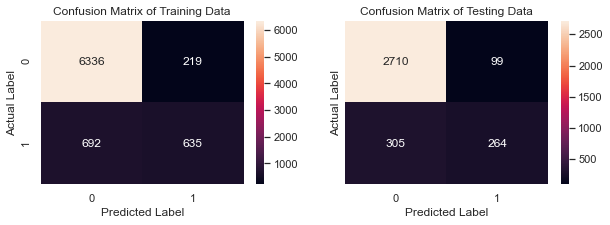

In [707]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False,figsize= (10,3))

#Plotting confusion matrix for the different models for the Training Data
# sns.set(font_scale=2)
plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,ytrain_predict)),annot=True,fmt='.5g',ax=a[0][0]);
a[0][0].set(xlabel = "Predicted Label",ylabel="Actual Label")
a[0][0].set_title('Confusion Matrix of Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,ytest_predict)),annot=True,fmt='.5g',ax=a[0][1]);
a[0][1].set_title('Confusion Matrix of Testing Data')
a[0][1].set(xlabel = "Predicted Label",ylabel="Actual Label");


### Training Data and Test Data Classification Report Comparison

In [708]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,ytrain_predict),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,ytest_predict),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.90      0.97      0.93      6555
           1       0.74      0.48      0.58      1327

    accuracy                           0.88      7882
   macro avg       0.82      0.72      0.76      7882
weighted avg       0.87      0.88      0.87      7882
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.90      0.96      0.93      2809
           1       0.73      0.46      0.57       569

    accuracy                           0.88      3378
   macro avg       0.81      0.71      0.75      3378
weighted avg       0.87      0.88      0.87      3378
 



In [709]:
X_train.shape

(7882, 23)

## Applying GridSearch for ADA Boost

There are not much hyper parameters in ADA boost. Just trying some combination with learning rate, no of estimators and alogorithm used

In [753]:
grid = {
    'algorithm' : ['SAMME'],#'SAMME.R'
    'learning_rate' : [1],  #.9,0.1,0.01,0.5,
    'n_estimators': [1000] # 90, 100,140,150,200,300,400,500,600,700,800,900
}   

In [754]:
ADB_model = AdaBoostClassifier(random_state=1)

In [755]:
ADB_model.get_params().keys()

dict_keys(['algorithm', 'base_estimator', 'learning_rate', 'n_estimators', 'random_state'])

In [756]:
# grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 3,n_jobs=-1,scoring='f1')
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
grid_search = run_gridsearch(ADB_model,grid,X_train, y_train,cv)
result = pd.DataFrame(grid_search.cv_results_)
#check_performance(grid_search,X_train, X_test, y_train, y_test)
## Scoring - Strategy to evaluate the performance of the cross-validated model on the test set.


 Running grid search

Fitting 15 folds for each of 1 candidates, totalling 15 fits


C:\Users\ragha\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)



 Showing best parameters for the grid search

{'algorithm': 'SAMME', 'learning_rate': 1, 'n_estimators': 1000}

 Showing best score for the grid search

0.45188348229063224


Now tuning further with no of estimators and checking the accuracy

In [757]:
best_model = grid_search.best_estimator_

In [758]:
# Prediction on the training set

ytrain_predict = best_model.predict(X_train)
ytest_predict = best_model.predict(X_test)

## Model Evaluation

In [759]:
# Accuracy - Training Data
print ('Model score for training dataset', best_model.score(X_train, y_train))
print ('Model score for testing dataset',best_model.score(X_test, y_test))

Model score for training dataset 0.8836589698046181
Model score for testing dataset 0.8833629366489046


### AUC and ROC for the training data & test data

AUC for Train dataset: 0.895
AUC for Test dataset: 0.882


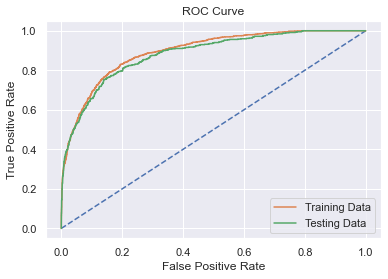

In [760]:
plt.plot([0, 1], [0, 1], linestyle='--')
train_auc,train_fpr, train_tpr, train_thresholds = calc_auc_roc(best_model,y_train,X_train,'Training Data')
print('AUC for Train dataset: %.3f' % train_auc)
test_auc,test_fpr, test_tpr, test_thresholds = calc_auc_roc(best_model,y_test,X_test,'Testing Data')
print('AUC for Test dataset: %.3f' % test_auc)
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

### Training Data and Test Data Confusion Matrix Comparison

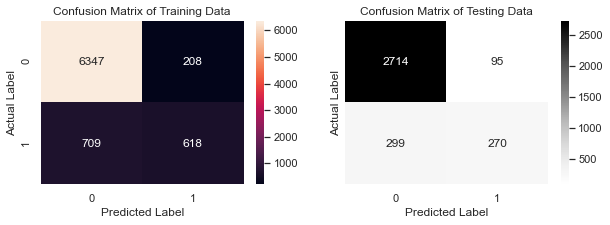

In [761]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False,figsize= (10,3))

#Plotting confusion matrix for the different models for the Training Data
sns.set(font_scale=1)
plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,ytrain_predict)),annot=True,fmt='.5g',ax=a[0][0]);
a[0][0].set(xlabel = "Predicted Label",ylabel="Actual Label")
a[0][0].set_title('Confusion Matrix of Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,ytest_predict)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Confusion Matrix of Testing Data')
a[0][1].set(xlabel = "Predicted Label",ylabel="Actual Label");


### Training Data and Test Data Classification Report Comparison

In [762]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,ytrain_predict),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,ytest_predict),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.90      0.97      0.93      6555
           1       0.75      0.47      0.57      1327

    accuracy                           0.88      7882
   macro avg       0.82      0.72      0.75      7882
weighted avg       0.87      0.88      0.87      7882
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.90      0.97      0.93      2809
           1       0.74      0.47      0.58       569

    accuracy                           0.88      3378
   macro avg       0.82      0.72      0.76      3378
weighted avg       0.87      0.88      0.87      3378
 



## Choosing the optimal threshold

In [763]:
optimal_idx = np.argmax(train_tpr - train_fpr)
optimal_threshold = train_thresholds[optimal_idx]
optimal_threshold

0.4830357654120756

## Checking for Threshhold = 0.483

### Prediction on Train & Test set

In [764]:
### Prediction on Train & Test set
threshold = 0.483

y_predict_train = best_model.predict_proba(X_train)[:, 1]
y_predict_test = best_model.predict_proba(X_test)[:, 1]
ytrain_predict = class_pred_diff_threshold(y_predict_train,threshold)
ytest_predict = class_pred_diff_threshold(y_predict_test,threshold)
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,ytrain_predict),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,ytest_predict),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.96      0.80      0.87      6555
           1       0.46      0.83      0.59      1327

    accuracy                           0.81      7882
   macro avg       0.71      0.82      0.73      7882
weighted avg       0.88      0.81      0.83      7882
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.95      0.80      0.87      2809
           1       0.45      0.80      0.57       569

    accuracy                           0.80      3378
   macro avg       0.70      0.80      0.72      3378
weighted avg       0.87      0.80      0.82      3378
 



For 48.3% threshhold, we can see that recall has gone up to 80% but precision has fallen to 45%. Overall f1 score which is a combination of recall and precision has reduced by 1%. We can notice a 33% increase in recall at a cost of 19% precision.

### Variable Importance

In [765]:
df2_fi=pd.DataFrame(best_model.feature_importances_*100, columns = ["Important Feature"], index = X_train.columns).sort_values('Important Feature',ascending=False)
df2_fi

Important Feature
Tenure                           32.307348
Cashback                         16.993762
Service_Score                    12.306992
Day_Since_CC_Connect              6.445183
Account_User_Count                4.481370
Rev_Growth_YOY                    4.142262
Account_Segment                   3.815306
Complain_LY                       3.301512
Rev_Per_Month                     3.090741
CC_Agent_Score                    2.656277
Marital_Status_Single             1.873144
CC_Contacted_LY                   1.770745
Coupon_Used_For_Payment           1.687084
City_Tier                         1.517552
Is_COD_Ewallet                    1.183345
Is_Reg_Sup                        0.994392
Login_device_Mobile               0.651164
Gender_Male                       0.425216
Marital_Status_Married            0.356605
Payment_UPI                       0.000000
Payment_E wallet                  0.000000
Payment_Debit Card                0.000000
Payment_Credit Card               0.000000

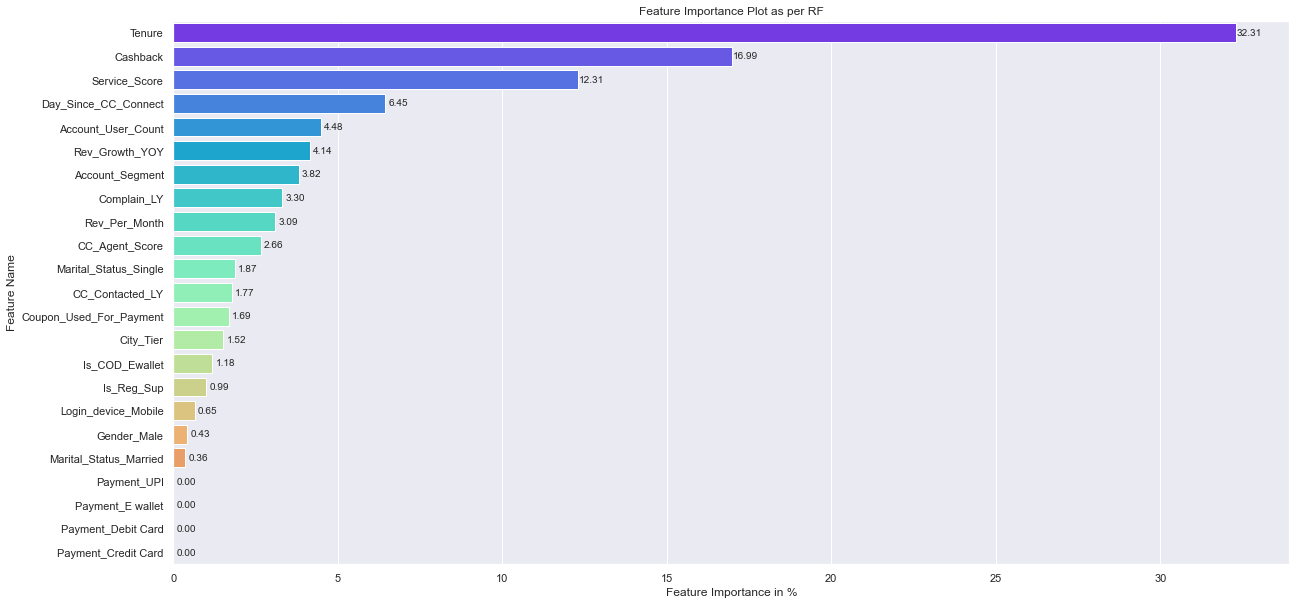

In [766]:
plt.figure(figsize=(20,10))
plots=sns.barplot(data=df2_fi,x="Important Feature",y=df2_fi.index,palette='rainbow')
plt.ylabel('Feature Name')
plt.xlabel('Feature Importance in %')
plt.title('Feature Importance Plot')

# Iterrating over the bars one-by-one 
for bar in plots.patches: 
      #print ('bar_width:', format(bar.get_width(), '.2f'),'bar_height:' , bar.get_height(), 'get_x:', bar.get_x() ,'get_y', bar.get_y() )
      plots.annotate(format(bar.get_width(), '.2f'), (bar.get_width() , bar.get_y() + bar.get_height()/2),
                   ha='center', va='center', 
                   size=10, xytext=(13, 0), 
                   textcoords='offset points') 
plt.show()

#### As per this model, attributes like Tenure, Cashback, Service_Score, Days_Since_CC_Connect, Account User Count and Rev_Growth_YOY are the 5 best feautures
#### Payment_Credit Card, Payment_Debit Card,Payment_Ewallet,  Payment_UPI,   are the features which are impacting least in predicting the churn

### ADA Conclusion

We have run the base model and model fine tuned using grid search and then used the optimal threshhold for best recall. Different evaluation meterics results for all three model run are as shown below :-

Train Data

Base model - AUC: 89%, Accuracy: 88%, Precision: 74%, Recall: 48%, f1-Score: 58%

Tuned model - AUC: 89%, Accuracy: 88%, Precision: 75%, Recall: 47%, f1-Score: 57%

Tuned and with optimal threshhold - AUC: 89%, Accuracy: 81%, Precision: 46%, Recall: 83%, f1-Score: 59%

Test Data

Base model - AUC: 88%, Accuracy: 88%, Precision: 73%, Recall: 46%, f1-Score: 57%

Tuned model - AUC: 88%, Accuracy: 88%, Precision: 74%, Recall: 47%, f1-Score: 58%

Tuned and with optimal threshhold - AUC: 88%, Accuracy: 80%, Precision: 45%, Recall: 80%, f1-Score: 57%

- **Train and Test dataset have similar statistics for accuracy and auc score but its slightly overfitting for f1 score**


- We can see that overall accuracy is high (around 80%) with a recall rate of (80%). With this recall rate, model is able to predict 80% of account getting churned correctly out of the total account getting churned.

- Precision is only 45% of test data which means, out of total account predicted by model as churned, 45% accunt actually churned. 

- F1-score is the harmonic mean of precision and recall, it takes into the effect of both the scores and this value is low if any of these 2 value is low.

- Since we are building a model to predict whether account will churn or not, for practical purposes, we will be more interested in correctly classifying 1 (account getting churned) than 0(account not getting churned).

- If a account not churning is incorrectly predicted to be "churned" by the model, then the impact on cost for DTH company would be less. But if a account who actually churned is incorrectly predicted to be not churned by the model, then the cost impact would be very high for the DTH company. Hence recall rate (actual data point identified as True by model) is very important in this scenario.

- For 48.3% threshhold, we can see that recall has gone up to 80% but precision has fallen to 45%. Overall f1 score which is a combination of recall and precision has reduced by 1%. We can notice a 33% increase in recall at a cost of 19% precision.

- **Best model is with optimal threshhold since its best recall and f1 score**

- As per this model, attributes like Tenure, Cashback, Service_Score, Days_Since_CC_Connect, Account User Count and Rev_Growth_YOY are the 5 best feautures

- Payment_Credit Card, Payment_Debit Card,Payment_Ewallet, Payment_UPI, are the features which are impacting least in predicting the churn

## XG Boost

In [224]:
from xgboost.sklearn import XGBClassifier

In [225]:
XGB_model = XGBClassifier(random_state=1,n_jobs=-1) 

In [226]:
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(XGB_model, X_train, y_train, scoring='recall', cv=cv, n_jobs=-1, error_score='raise')
# summarize result
print (scores)
print('Mean Recall: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

[0.77819549 0.81578947 0.83018868 0.7509434  0.76603774 0.80075188
 0.85338346 0.76603774 0.80377358 0.75471698 0.79323308 0.81203008
 0.77735849 0.83396226 0.79245283]
Mean Recall: 0.795 (0.029)


## Model Evaluation

In [227]:
# Accuracy - Training Data
model=XGB_model.fit(X_train, y_train)
print ('Model score for training dataset', model.score(X_train, y_train))
print ('Model score for testing dataset',model.score(X_test, y_test))

C:\Users\ragha\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\ragha\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[22:22:12] WARNING: D:\bld\xgboost-split_1634712635879\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Model score for training dataset 0.9997462572951028
Model score for testing dataset 0.9647720544701006


We can see that score of train and test data set varies for around 5-6%. Hence this model is good to go.

In [228]:
model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=-1,
              num_parallel_tree=1, predictor='auto', random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [229]:
# Prediction on the training & Test set

ytrain_predict = model.predict(X_train)
ytest_predict = model.predict(X_test)

### AUC and ROC for the training data & test data

AUC for Train dataset: 1.000
AUC for Train dataset: 0.988


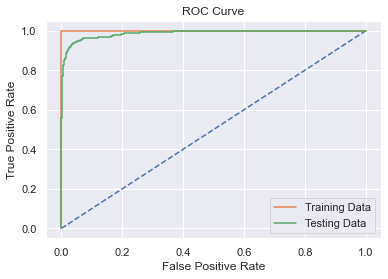

In [230]:
plt.plot([0, 1], [0, 1], linestyle='--')
train_auc,train_fpr, train_tpr, train_thresholds = calc_auc_roc(model,y_train,X_train,'Training Data')
print('AUC for Train dataset: %.3f' % train_auc)
test_auc,test_fpr, test_tpr, test_thresholds = calc_auc_roc(model,y_test,X_test,'Testing Data')
print('AUC for Train dataset: %.3f' % test_auc)
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

### Confusion Matrix for the training data and testing data

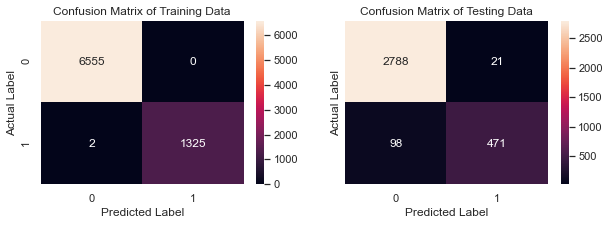

In [231]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False,figsize= (10,3))

#Plotting confusion matrix for the different models for the Training Data
# sns.set(font_scale=2)
plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,ytrain_predict)),annot=True,fmt='.5g',ax=a[0][0]);
a[0][0].set(xlabel = "Predicted Label",ylabel="Actual Label")
a[0][0].set_title('Confusion Matrix of Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,ytest_predict)),annot=True,fmt='.5g',ax=a[0][1]);
a[0][1].set_title('Confusion Matrix of Testing Data')
a[0][1].set(xlabel = "Predicted Label",ylabel="Actual Label");


### Training Data and Test Data Classification Report Comparison

In [232]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,ytrain_predict),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,ytest_predict),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00      6555
           1       1.00      1.00      1.00      1327

    accuracy                           1.00      7882
   macro avg       1.00      1.00      1.00      7882
weighted avg       1.00      1.00      1.00      7882
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.97      0.99      0.98      2809
           1       0.96      0.83      0.89       569

    accuracy                           0.96      3378
   macro avg       0.96      0.91      0.93      3378
weighted avg       0.96      0.96      0.96      3378
 



In [233]:
X_train.shape

(7882, 23)

## Applying GridSearch for XGBoost

There are lot of hyper parameters in XGboost. Just trying some combination with these parameters.

In [234]:
grid = {
    'max_depth': [9],   #4,5,3,4,5,6,7,8,10,11
    'min_child_weight':[1],  #4,5,6,7,8,9,11,12,,6,8,10,2,3,4
    'gamma':[0.1], #,0.1,0.2], #[i/10.0 for i in range(0,5)] ,     
    'subsample':[0.9], #0.6,0.7,0.8,1.05 #[i/10.0 for i in range(6,10)]
    'colsample_bytree':[0.8], #[i/10.0 for i in range(6,10)],0.6,0.8,0.9,1,1
    'reg_alpha':[0.1], # 1e-5, 100,1e-2,, 1,0,0.04,0.02
    'n_estimators':[295], #100,70,110,150,200,300,305,294,296
    'learning_rate':[0.25,0.3,0.35] #0.4
} 

In [235]:
XGB_model.get_params().keys()

dict_keys(['objective', 'use_label_encoder', 'base_score', 'booster', 'colsample_bylevel', 'colsample_bynode', 'colsample_bytree', 'enable_categorical', 'gamma', 'gpu_id', 'importance_type', 'interaction_constraints', 'learning_rate', 'max_delta_step', 'max_depth', 'min_child_weight', 'missing', 'monotone_constraints', 'n_estimators', 'n_jobs', 'num_parallel_tree', 'predictor', 'random_state', 'reg_alpha', 'reg_lambda', 'scale_pos_weight', 'subsample', 'tree_method', 'validate_parameters', 'verbosity'])

In [236]:
# grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 3,n_jobs=-1,scoring='f1')
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
grid_search = run_gridsearch(XGB_model,grid,X_train, y_train,cv)
result = pd.DataFrame(grid_search.cv_results_)
#check_performance(grid_search,X_train, X_test, y_train, y_test)
## Scoring - Strategy to evaluate the performance of the cross-validated model on the test set.


 Running grid search

Fitting 15 folds for each of 3 candidates, totalling 45 fits


C:\Users\ragha\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\ragha\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[22:22:49] WARNING: D:\bld\xgboost-split_1634712635879\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

 Showing best parameters for the grid search

{'colsample_bytree': 0.8, 'gamma': 0.1, 'learning_rate': 0.3, 'max_depth': 9, 'min_child_weight': 1, 'n_estimators': 295, 'reg_alpha': 0.1, 'subsample': 0.9}

 Showing best score for the grid search

0.8271650825176148


Now tuning further with no of estimators and checking the accuracy

In [237]:
best_model = grid_search.best_estimator_

In [238]:
# Prediction on the training set

ytrain_predict = best_model.predict(X_train)
ytest_predict = best_model.predict(X_test)

## Model Evaluation

In [239]:
# Accuracy - Training Data
print ('Model score for training dataset', best_model.score(X_train, y_train))
print ('Model score for testing dataset',best_model.score(X_test, y_test))

Model score for training dataset 1.0
Model score for testing dataset 0.9689165186500888


### AUC and ROC for the training data & test data

AUC for Train dataset: 1.000
AUC for Test dataset: 0.992


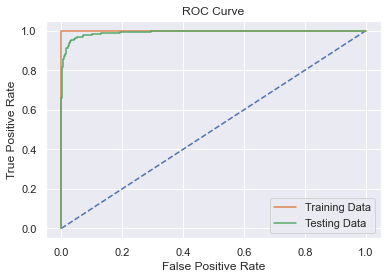

In [240]:
plt.plot([0, 1], [0, 1], linestyle='--')
train_auc,train_fpr, train_tpr, train_thresholds = calc_auc_roc(best_model,y_train,X_train,'Training Data')
print('AUC for Train dataset: %.3f' % train_auc)
test_auc,test_fpr, test_tpr, test_thresholds = calc_auc_roc(best_model,y_test,X_test,'Testing Data')
print('AUC for Test dataset: %.3f' % test_auc)
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

### Training Data and Test Data Confusion Matrix Comparison

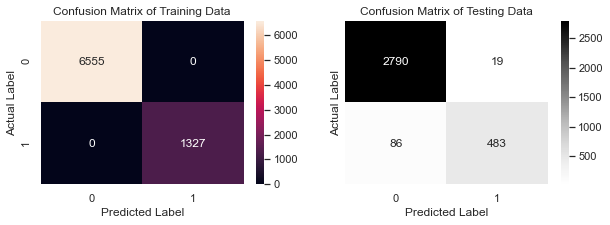

In [241]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False,figsize= (10,3))

#Plotting confusion matrix for the different models for the Training Data
sns.set(font_scale=1)
plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,ytrain_predict)),annot=True,fmt='.5g',ax=a[0][0]);
a[0][0].set(xlabel = "Predicted Label",ylabel="Actual Label")
a[0][0].set_title('Confusion Matrix of Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,ytest_predict)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Confusion Matrix of Testing Data')
a[0][1].set(xlabel = "Predicted Label",ylabel="Actual Label");


### Training Data and Test Data Classification Report Comparison

In [242]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,ytrain_predict),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,ytest_predict),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00      6555
           1       1.00      1.00      1.00      1327

    accuracy                           1.00      7882
   macro avg       1.00      1.00      1.00      7882
weighted avg       1.00      1.00      1.00      7882
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.97      0.99      0.98      2809
           1       0.96      0.85      0.90       569

    accuracy                           0.97      3378
   macro avg       0.97      0.92      0.94      3378
weighted avg       0.97      0.97      0.97      3378
 



## Choosing the optimal threshold

In [243]:
optimal_idx = np.argmax(train_tpr - train_fpr)
optimal_threshold = train_thresholds[optimal_idx]
optimal_threshold

0.8814639

## Checking for Threshhold = 0.881

With this threshhold, recall decreases and precision increases. Just trying it .119

### Prediction on Train & Test set

In [244]:
### Prediction on Train & Test set
threshold = 0.119

y_predict_train = best_model.predict_proba(X_train)[:, 1]
y_predict_test = best_model.predict_proba(X_test)[:, 1]
ytrain_predict = class_pred_diff_threshold(y_predict_train,threshold)
ytest_predict = class_pred_diff_threshold(y_predict_test,threshold)
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,ytrain_predict),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,ytest_predict),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00      6555
           1       1.00      1.00      1.00      1327

    accuracy                           1.00      7882
   macro avg       1.00      1.00      1.00      7882
weighted avg       1.00      1.00      1.00      7882
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.99      0.97      0.98      2809
           1       0.86      0.95      0.90       569

    accuracy                           0.97      3378
   macro avg       0.92      0.96      0.94      3378
weighted avg       0.97      0.97      0.97      3378
 



For 11.9% threshhold, we can see that recall has gone up to 95% but precision has fallen to 86%. Overall f1 score which is a combination of recall and precision has remained same. We can notice a 10% increase in recall at a cost of 10% precision.

### Variable Importance

In [247]:
df2_fi=pd.DataFrame(best_model.feature_importances_*100, columns = ["Important Feature"], index = X_train.columns).sort_values('Important Feature',ascending=False)
df2_fi

Important Feature
Complain_LY                      12.825586
Account_Segment                   7.556020
Marital_Status_Single             6.724294
Tenure                            5.735798
City_Tier                         4.856368
Day_Since_CC_Connect              4.626607
Is_COD_Ewallet                    4.393944
Is_Reg_Sup                        4.357225
Payment_E wallet                  4.281604
Login_device_Mobile               4.223140
CC_Agent_Score                    4.180928
Payment_UPI                       3.929049
Rev_Per_Month                     3.363834
Cashback                          3.273685
Gender_Male                       3.116419
CC_Contacted_LY                   3.071544
Payment_Credit Card               3.037336
Marital_Status_Married            2.983265
Account_User_Count                2.946683
Payment_Debit Card                2.938422
Coupon_Used_For_Payment           2.648289
Service_Score                     2.513937
Rev_Growth_YOY                    2.416037

In [250]:
df_XGB_fi = df2_fi.copy()
df_XGB_fi.rename(columns = {'Important Feature':'XGB_FI'},inplace=True)

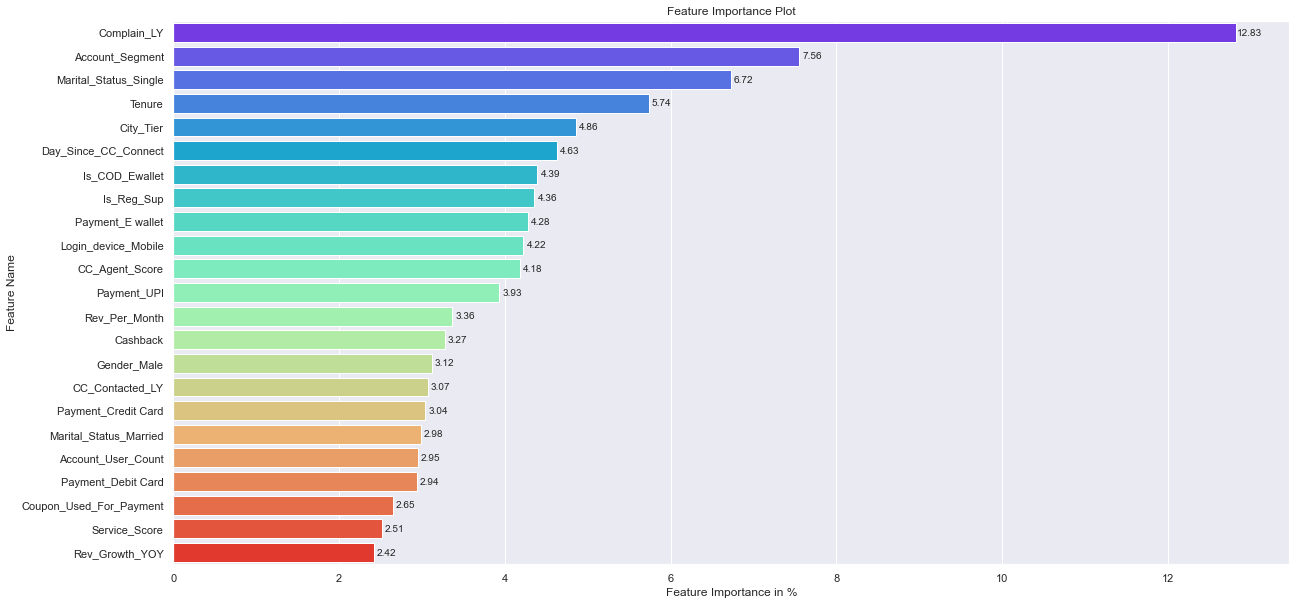

In [251]:
plt.figure(figsize=(20,10))
plots=sns.barplot(data=df2_fi,x="Important Feature",y=df2_fi.index,palette='rainbow')
plt.ylabel('Feature Name')
plt.xlabel('Feature Importance in %')
plt.title('Feature Importance Plot')

# Iterrating over the bars one-by-one 
for bar in plots.patches: 
      #print ('bar_width:', format(bar.get_width(), '.2f'),'bar_height:' , bar.get_height(), 'get_x:', bar.get_x() ,'get_y', bar.get_y() )
      plots.annotate(format(bar.get_width(), '.2f'), (bar.get_width() , bar.get_y() + bar.get_height()/2),
                   ha='center', va='center', 
                   size=10, xytext=(13, 0), 
                   textcoords='offset points') 
plt.show()

#### As per this model, attributes like Complain_LY, Account_Segment, Marital_Staus_Single,Tenure, City_Tier are the 5 best feautures
#### Rev_Growth_YOY, Service Score, Coupon_Used_For_Payment, Payment_Debit Card, Account_User_Count are the features which are impacting least in predicting the churn

### XGBoost Conclusion

We have run the base model and model fine tuned using grid search and then used the optimal threshhold for best recall. Different evaluation meterics results for all three model run are as shown below :-

Train Data

Base model - AUC: 100%, Accuracy: 100%, Precision: 100%, Recall: 100%, f1-Score: 100%

Tuned model - AUC: 100%, Accuracy: 100%, Precision: 100%, Recall: 100%, f1-Score: 100%

Tuned and with optimal threshhold - AUC: 100%, Accuracy: 100%, Precision: 100%, Recall: 100%, f1-Score: 100%

Test Data

Base model - AUC: 99%, Accuracy: 96%, Precision: 96%, Recall: 83%, f1-Score: 89%

Tuned model - AUC: 99%, Accuracy: 88%, Precision: 96%, Recall: 85%, f1-Score: 90%

Tuned and with optimal threshhold - AUC: 99%, Accuracy: 97%, Precision: 86%, Recall: 95%, f1-Score: 90%

- **Train and Test dataset have similar statistics for accuracy and auc score but its slightly overfitting for f1 score**


- We can see that overall accuracy is high (around 97%) with a recall rate of (95%). With this recall rate, model is able to predict 95% of account getting churned correctly out of the total account getting churned.

- Precision is 86% of test data which means, out of total account predicted by model as churned, 86% accunt actually churned. 

- F1-score is the harmonic mean of precision and recall, it takes into the effect of both the scores and this value is low if any of these 2 value is low.

- Since we are building a model to predict whether account will churn or not, for practical purposes, we will be more interested in correctly classifying 1 (account getting churned) than 0(account not getting churned).

- If a account not churning is incorrectly predicted to be "churned" by the model, then the impact on cost for DTH company would be less. But if a account who actually churned is incorrectly predicted to be not churned by the model, then the cost impact would be very high for the DTH company. Hence recall rate (actual data point identified as True by model) is very important in this scenario.

- For 11.9% threshhold, we can see that recall has gone up to 95% but precision has fallen to 86%. Overall f1 score which is a combination of recall and precision has remained same. We can notice a 10% increase in recall at a cost of 10% precision.

- **Best model is with optimal threshhold since its best recall and f1 score**

- As per this model, attributes like Complain_LY, Account_Segment, Marital_Staus_Single,Tenure, City_Tier are the 5 best feautures

- Rev_Growth_YOY, Service Score, Coupon_Used_For_Payment, Payment_Debit Card, Account_User_Count are the features which are impacting least in predicting the churn

## CATBoost

In [252]:
from catboost import CatBoostClassifier

In [253]:
CB_model = CatBoostClassifier(random_state=1) 

In [852]:
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(CB_model, X_train, y_train, scoring='recall', cv=cv, n_jobs=-1, error_score='raise')
# summarize result
print (scores)
print('Mean Recall: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

[0.72556391 0.69924812 0.74339623 0.70566038 0.65283019 0.72180451
 0.7443609  0.71320755 0.68679245 0.67924528 0.68796992 0.71428571
 0.70188679 0.71320755 0.71320755]
Mean Recall: 0.707 (0.023)


## Model Evaluation

In [855]:
# Accuracy - Training Data
model=CB_model.fit(X_train, y_train)
print ('Model score for training dataset', model.score(X_train, y_train))
print ('Model score for testing dataset',model.score(X_test, y_test))

Learning rate set to 0.024877
0:	learn: 0.6717142	total: 157ms	remaining: 2m 37s
1:	learn: 0.6518830	total: 161ms	remaining: 1m 20s
2:	learn: 0.6329910	total: 165ms	remaining: 54.7s
3:	learn: 0.6160013	total: 168ms	remaining: 41.8s
4:	learn: 0.5996293	total: 171ms	remaining: 34s
5:	learn: 0.5826853	total: 174ms	remaining: 28.9s
6:	learn: 0.5668818	total: 178ms	remaining: 25.2s
7:	learn: 0.5526848	total: 181ms	remaining: 22.5s
8:	learn: 0.5398090	total: 185ms	remaining: 20.4s
9:	learn: 0.5287038	total: 189ms	remaining: 18.7s
10:	learn: 0.5161898	total: 193ms	remaining: 17.3s
11:	learn: 0.5053245	total: 196ms	remaining: 16.1s
12:	learn: 0.4940783	total: 200ms	remaining: 15.2s
13:	learn: 0.4850309	total: 203ms	remaining: 14.3s
14:	learn: 0.4758320	total: 207ms	remaining: 13.6s
15:	learn: 0.4659556	total: 211ms	remaining: 13s
16:	learn: 0.4571433	total: 214ms	remaining: 12.4s
17:	learn: 0.4497504	total: 218ms	remaining: 11.9s
18:	learn: 0.4419559	total: 222ms	remaining: 11.5s
19:	learn: 0.

170:	learn: 0.2278058	total: 731ms	remaining: 3.54s
171:	learn: 0.2274390	total: 735ms	remaining: 3.54s
172:	learn: 0.2267891	total: 738ms	remaining: 3.53s
173:	learn: 0.2263759	total: 741ms	remaining: 3.52s
174:	learn: 0.2260455	total: 745ms	remaining: 3.51s
175:	learn: 0.2256208	total: 748ms	remaining: 3.5s
176:	learn: 0.2251630	total: 752ms	remaining: 3.5s
177:	learn: 0.2248284	total: 755ms	remaining: 3.49s
178:	learn: 0.2242702	total: 759ms	remaining: 3.48s
179:	learn: 0.2236466	total: 762ms	remaining: 3.47s
180:	learn: 0.2231725	total: 766ms	remaining: 3.46s
181:	learn: 0.2229166	total: 769ms	remaining: 3.46s
182:	learn: 0.2225781	total: 772ms	remaining: 3.45s
183:	learn: 0.2222374	total: 776ms	remaining: 3.44s
184:	learn: 0.2219217	total: 779ms	remaining: 3.43s
185:	learn: 0.2213536	total: 782ms	remaining: 3.42s
186:	learn: 0.2207599	total: 786ms	remaining: 3.42s
187:	learn: 0.2203974	total: 789ms	remaining: 3.41s
188:	learn: 0.2200621	total: 792ms	remaining: 3.4s
189:	learn: 0.2

332:	learn: 0.1759530	total: 1.27s	remaining: 2.55s
333:	learn: 0.1758447	total: 1.28s	remaining: 2.55s
334:	learn: 0.1755685	total: 1.28s	remaining: 2.54s
335:	learn: 0.1754670	total: 1.28s	remaining: 2.54s
336:	learn: 0.1751895	total: 1.29s	remaining: 2.53s
337:	learn: 0.1750369	total: 1.29s	remaining: 2.53s
338:	learn: 0.1747356	total: 1.29s	remaining: 2.52s
339:	learn: 0.1745607	total: 1.3s	remaining: 2.52s
340:	learn: 0.1743008	total: 1.3s	remaining: 2.51s
341:	learn: 0.1740860	total: 1.3s	remaining: 2.51s
342:	learn: 0.1739072	total: 1.31s	remaining: 2.5s
343:	learn: 0.1737909	total: 1.31s	remaining: 2.5s
344:	learn: 0.1735121	total: 1.31s	remaining: 2.49s
345:	learn: 0.1733893	total: 1.32s	remaining: 2.49s
346:	learn: 0.1731958	total: 1.32s	remaining: 2.48s
347:	learn: 0.1728365	total: 1.32s	remaining: 2.48s
348:	learn: 0.1725882	total: 1.33s	remaining: 2.48s
349:	learn: 0.1723645	total: 1.33s	remaining: 2.47s
350:	learn: 0.1721687	total: 1.33s	remaining: 2.46s
351:	learn: 0.171

497:	learn: 0.1433430	total: 1.82s	remaining: 1.83s
498:	learn: 0.1431205	total: 1.82s	remaining: 1.83s
499:	learn: 0.1428564	total: 1.82s	remaining: 1.82s
500:	learn: 0.1427034	total: 1.83s	remaining: 1.82s
501:	learn: 0.1426077	total: 1.83s	remaining: 1.82s
502:	learn: 0.1423302	total: 1.83s	remaining: 1.81s
503:	learn: 0.1420505	total: 1.84s	remaining: 1.81s
504:	learn: 0.1418736	total: 1.84s	remaining: 1.81s
505:	learn: 0.1416428	total: 1.85s	remaining: 1.8s
506:	learn: 0.1415166	total: 1.85s	remaining: 1.8s
507:	learn: 0.1413847	total: 1.85s	remaining: 1.79s
508:	learn: 0.1412798	total: 1.86s	remaining: 1.79s
509:	learn: 0.1410936	total: 1.86s	remaining: 1.79s
510:	learn: 0.1409546	total: 1.86s	remaining: 1.78s
511:	learn: 0.1407219	total: 1.87s	remaining: 1.78s
512:	learn: 0.1406743	total: 1.87s	remaining: 1.77s
513:	learn: 0.1405237	total: 1.87s	remaining: 1.77s
514:	learn: 0.1403895	total: 1.88s	remaining: 1.77s
515:	learn: 0.1401697	total: 1.88s	remaining: 1.76s
516:	learn: 0.

705:	learn: 0.1135883	total: 2.52s	remaining: 1.05s
706:	learn: 0.1134055	total: 2.53s	remaining: 1.05s
707:	learn: 0.1133361	total: 2.53s	remaining: 1.04s
708:	learn: 0.1132588	total: 2.54s	remaining: 1.04s
709:	learn: 0.1131073	total: 2.54s	remaining: 1.04s
710:	learn: 0.1129554	total: 2.54s	remaining: 1.03s
711:	learn: 0.1126757	total: 2.55s	remaining: 1.03s
712:	learn: 0.1124901	total: 2.55s	remaining: 1.03s
713:	learn: 0.1123636	total: 2.55s	remaining: 1.02s
714:	learn: 0.1122575	total: 2.56s	remaining: 1.02s
715:	learn: 0.1121995	total: 2.56s	remaining: 1.01s
716:	learn: 0.1120528	total: 2.56s	remaining: 1.01s
717:	learn: 0.1119115	total: 2.57s	remaining: 1.01s
718:	learn: 0.1117518	total: 2.57s	remaining: 1s
719:	learn: 0.1116013	total: 2.57s	remaining: 1s
720:	learn: 0.1114114	total: 2.58s	remaining: 997ms
721:	learn: 0.1112936	total: 2.58s	remaining: 993ms
722:	learn: 0.1111356	total: 2.58s	remaining: 989ms
723:	learn: 0.1110112	total: 2.58s	remaining: 986ms
724:	learn: 0.1108

870:	learn: 0.0949090	total: 3.07s	remaining: 455ms
871:	learn: 0.0947557	total: 3.08s	remaining: 452ms
872:	learn: 0.0946533	total: 3.08s	remaining: 448ms
873:	learn: 0.0945863	total: 3.08s	remaining: 445ms
874:	learn: 0.0944914	total: 3.09s	remaining: 441ms
875:	learn: 0.0944502	total: 3.09s	remaining: 438ms
876:	learn: 0.0943933	total: 3.09s	remaining: 434ms
877:	learn: 0.0942483	total: 3.1s	remaining: 431ms
878:	learn: 0.0941574	total: 3.1s	remaining: 427ms
879:	learn: 0.0940415	total: 3.1s	remaining: 424ms
880:	learn: 0.0939987	total: 3.11s	remaining: 420ms
881:	learn: 0.0939106	total: 3.11s	remaining: 417ms
882:	learn: 0.0938558	total: 3.12s	remaining: 413ms
883:	learn: 0.0937869	total: 3.12s	remaining: 409ms
884:	learn: 0.0936297	total: 3.12s	remaining: 406ms
885:	learn: 0.0934944	total: 3.13s	remaining: 402ms
886:	learn: 0.0932572	total: 3.13s	remaining: 399ms
887:	learn: 0.0931939	total: 3.13s	remaining: 395ms
888:	learn: 0.0930879	total: 3.14s	remaining: 392ms
889:	learn: 0.0

We can see that score of train and test data set varies for around 5-6%. Hence this model is good to go.

In [856]:
model

In [857]:
# Prediction on the training & Test set

ytrain_predict = model.predict(X_train)
ytest_predict = model.predict(X_test)

### AUC and ROC for the training data & test data

AUC for Train dataset: 0.999
AUC for Train dataset: 0.981


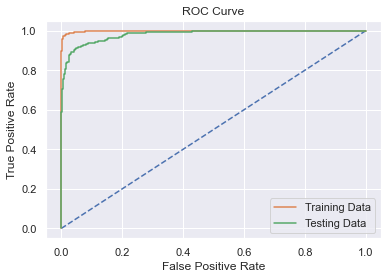

In [858]:
plt.plot([0, 1], [0, 1], linestyle='--')
train_auc,train_fpr, train_tpr, train_thresholds = calc_auc_roc(model,y_train,X_train,'Training Data')
print('AUC for Train dataset: %.3f' % train_auc)
test_auc,test_fpr, test_tpr, test_thresholds = calc_auc_roc(model,y_test,X_test,'Testing Data')
print('AUC for Train dataset: %.3f' % test_auc)
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

### Confusion Matrix for the training data and testing data

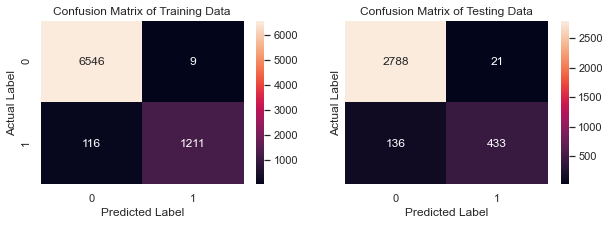

In [859]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False,figsize= (10,3))

#Plotting confusion matrix for the different models for the Training Data
# sns.set(font_scale=2)
plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,ytrain_predict)),annot=True,fmt='.5g',ax=a[0][0]);
a[0][0].set(xlabel = "Predicted Label",ylabel="Actual Label")
a[0][0].set_title('Confusion Matrix of Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,ytest_predict)),annot=True,fmt='.5g',ax=a[0][1]);
a[0][1].set_title('Confusion Matrix of Testing Data')
a[0][1].set(xlabel = "Predicted Label",ylabel="Actual Label");


### Training Data and Test Data Classification Report Comparison

In [860]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,ytrain_predict),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,ytest_predict),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.98      1.00      0.99      6555
           1       0.99      0.91      0.95      1327

    accuracy                           0.98      7882
   macro avg       0.99      0.96      0.97      7882
weighted avg       0.98      0.98      0.98      7882
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.95      0.99      0.97      2809
           1       0.95      0.76      0.85       569

    accuracy                           0.95      3378
   macro avg       0.95      0.88      0.91      3378
weighted avg       0.95      0.95      0.95      3378
 



In [861]:
X_train.shape

(7882, 23)

## Applying GridSearch for CATBoost

There are lot of hyper parameters in CATboost. Just trying some combination with these parameters

In [254]:
grid = {'depth':[16], #, 4,7 ,9,10,11,13 ,17,19,14,15,
# iterations : The maximum number of trees that can be built when solving machine learning problems. Fewer may be used.        
          'iterations':[200,300,400], #250,100,50,150
          'learning_rate':[.3], #0.03,0.001,0.01,0.1,0.2,0.3 
          'l2_leaf_reg':[1], # 3,1,5,10,100        
# border_count : The number of splits for numerical features. Allowed values are integers from 1 to 255 inclusively.        
          'border_count':[60], # 32,5,10,20,50,100,200,80
# ctr_border_count : The number of splits for categorical features. Allowed values are integers from 1 to 255 inclusively.        
#           'ctr_border_count':[20,40,60], # 50,5,10,20,100,200
          'thread_count':[4]}


In [255]:
CB_model.get_params().keys()

dict_keys(['random_state'])

In [256]:
# grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 3,n_jobs=-1,scoring='f1')
cv = 3 # RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
grid_search = run_gridsearch(CB_model,grid,X_train, y_train,cv)
result = pd.DataFrame(grid_search.cv_results_)
#check_performance(grid_search,X_train, X_test, y_train, y_test)
## Scoring - Strategy to evaluate the performance of the cross-validated model on the test set.


 Running grid search

Fitting 3 folds for each of 3 candidates, totalling 9 fits
0:	learn: 0.3657349	total: 728ms	remaining: 3m 37s
1:	learn: 0.2102713	total: 1.23s	remaining: 3m 2s
2:	learn: 0.1427162	total: 1.7s	remaining: 2m 48s
3:	learn: 0.0989178	total: 2.21s	remaining: 2m 43s
4:	learn: 0.0664426	total: 2.72s	remaining: 2m 40s
5:	learn: 0.0516440	total: 3.19s	remaining: 2m 36s
6:	learn: 0.0412877	total: 3.67s	remaining: 2m 33s
7:	learn: 0.0342063	total: 4.16s	remaining: 2m 31s
8:	learn: 0.0286489	total: 4.64s	remaining: 2m 29s
9:	learn: 0.0248351	total: 5.16s	remaining: 2m 29s
10:	learn: 0.0218259	total: 5.68s	remaining: 2m 29s
11:	learn: 0.0190060	total: 6.21s	remaining: 2m 29s
12:	learn: 0.0169314	total: 6.69s	remaining: 2m 27s
13:	learn: 0.0151893	total: 7.18s	remaining: 2m 26s
14:	learn: 0.0135011	total: 7.64s	remaining: 2m 25s
15:	learn: 0.0124689	total: 8.16s	remaining: 2m 24s
16:	learn: 0.0114364	total: 8.68s	remaining: 2m 24s
17:	learn: 0.0103506	total: 9.19s	remaining: 2

157:	learn: 0.0007948	total: 1m 6s	remaining: 1m
158:	learn: 0.0007897	total: 1m 7s	remaining: 59.7s
159:	learn: 0.0007848	total: 1m 7s	remaining: 59.3s
160:	learn: 0.0007794	total: 1m 8s	remaining: 58.8s
161:	learn: 0.0007746	total: 1m 8s	remaining: 58.4s
162:	learn: 0.0007702	total: 1m 9s	remaining: 58s
163:	learn: 0.0007649	total: 1m 9s	remaining: 57.7s
164:	learn: 0.0007600	total: 1m 10s	remaining: 57.3s
165:	learn: 0.0007550	total: 1m 10s	remaining: 56.9s
166:	learn: 0.0007498	total: 1m 10s	remaining: 56.5s
167:	learn: 0.0007444	total: 1m 11s	remaining: 56.1s
168:	learn: 0.0007399	total: 1m 11s	remaining: 55.7s
169:	learn: 0.0007354	total: 1m 12s	remaining: 55.3s
170:	learn: 0.0007308	total: 1m 12s	remaining: 54.9s
171:	learn: 0.0007266	total: 1m 13s	remaining: 54.5s
172:	learn: 0.0007225	total: 1m 13s	remaining: 54s
173:	learn: 0.0007187	total: 1m 14s	remaining: 53.6s
174:	learn: 0.0007145	total: 1m 14s	remaining: 53.2s
175:	learn: 0.0007105	total: 1m 15s	remaining: 52.8s
176:	le

Now tuning further with no of estimators and checking the accuracy

In [257]:
best_model = grid_search.best_estimator_

In [258]:
# Prediction on the training set

ytrain_predict = best_model.predict(X_train)
ytest_predict = best_model.predict(X_test)

## Model Evaluation

In [259]:
# Accuracy - Training Data
print ('Model score for training dataset', best_model.score(X_train, y_train))
print ('Model score for testing dataset',best_model.score(X_test, y_test))

Model score for training dataset 1.0
Model score for testing dataset 0.9869745411486086


### AUC and ROC for the training data & test data

AUC for Train dataset: 1.000
AUC for Test dataset: 0.994


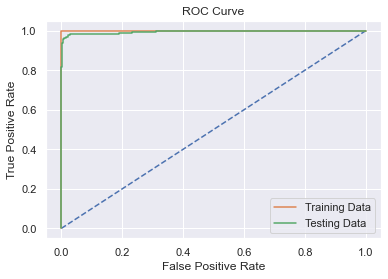

In [260]:
plt.plot([0, 1], [0, 1], linestyle='--')
train_auc,train_fpr, train_tpr, train_thresholds = calc_auc_roc(best_model,y_train,X_train,'Training Data')
print('AUC for Train dataset: %.3f' % train_auc)
test_auc,test_fpr, test_tpr, test_thresholds = calc_auc_roc(best_model,y_test,X_test,'Testing Data')
print('AUC for Test dataset: %.3f' % test_auc)
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

### Training Data and Test Data Confusion Matrix Comparison

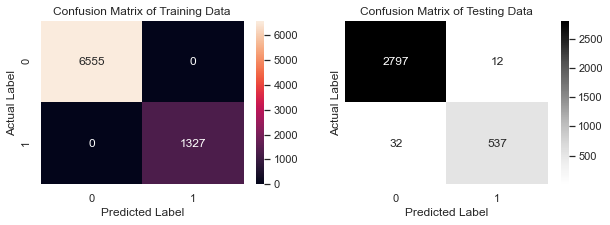

In [261]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False,figsize= (10,3))

#Plotting confusion matrix for the different models for the Training Data
sns.set(font_scale=1)
plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,ytrain_predict)),annot=True,fmt='.5g',ax=a[0][0]);
a[0][0].set(xlabel = "Predicted Label",ylabel="Actual Label")
a[0][0].set_title('Confusion Matrix of Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,ytest_predict)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Confusion Matrix of Testing Data')
a[0][1].set(xlabel = "Predicted Label",ylabel="Actual Label");


### Training Data and Test Data Classification Report Comparison

In [262]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,ytrain_predict),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,ytest_predict),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00      6555
           1       1.00      1.00      1.00      1327

    accuracy                           1.00      7882
   macro avg       1.00      1.00      1.00      7882
weighted avg       1.00      1.00      1.00      7882
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.99      1.00      0.99      2809
           1       0.98      0.94      0.96       569

    accuracy                           0.99      3378
   macro avg       0.98      0.97      0.98      3378
weighted avg       0.99      0.99      0.99      3378
 



### Variable Importance

In [263]:
df2_fi=pd.DataFrame(best_model.feature_importances_*100, columns = ["Important Feature"], index = X_train.columns).sort_values('Important Feature',ascending=False)
# df2_fi

In [264]:
df_CB_fi = df2_fi.copy()
df_CB_fi.rename(columns = {'Important Feature':'CB_FI'},inplace=True)

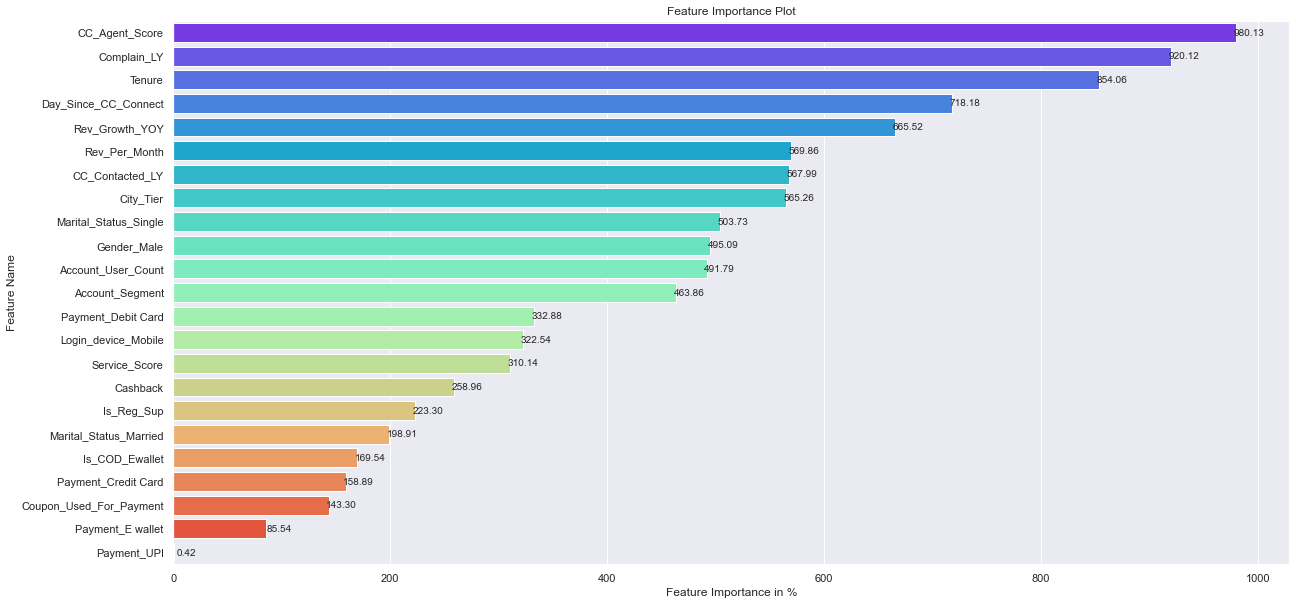

In [266]:
plt.figure(figsize=(20,10))
plots=sns.barplot(data=df2_fi,x="Important Feature",y=df2_fi.index,palette='rainbow')
plt.ylabel('Feature Name')
plt.xlabel('Feature Importance in %')
plt.title('Feature Importance Plot')

# Iterrating over the bars one-by-one 
for bar in plots.patches: 
      #print ('bar_width:', format(bar.get_width(), '.2f'),'bar_height:' , bar.get_height(), 'get_x:', bar.get_x() ,'get_y', bar.get_y() )
      plots.annotate(format(bar.get_width(), '.2f'), (bar.get_width() , bar.get_y() + bar.get_height()/2),
                   ha='center', va='center', 
                   size=10, xytext=(13, 0), 
                   textcoords='offset points') 
plt.show()

#### As per this model, attributes like CC_Agent_Score, Complain_LY, Tenure, Days_Since_CC_Connect, Rev_Growth_YOY are the 5 best feautures
#### Payment_UPI, Payment_E Wallet,  Coupon_Used_For_Payment, Payment_Credit Card, Is_COD_Ewallet are the features which are impacting least in predicting the churn

### CATBoost Conclusion

We have run the base model and model fine tuned using grid search and then used the optimal threshhold for best recall. Different evaluation meterics results for all three model run are as shown below :-

Train Data

Base model - AUC: 100%, Accuracy: 98%, Precision: 99%, Recall: 91%, f1-Score: 95%

Tuned model - AUC: 100%, Accuracy: 100%, Precision: 100%, Recall: 100%, f1-Score: 100%

Test Data

Base model - AUC: 98%, Accuracy: 95%, Precision: 95%, Recall: 76%, f1-Score: 85%

Tuned model - AUC: 99%, Accuracy: 99%, Precision: 98%, Recall: 94%, f1-Score: 96%


- **Train and Test dataset have similar statistics for accuracy and auc score but its slightly overfitting for f1 score**


- We can see that overall accuracy is very high (around 99%) with a recall rate of (94%). With this recall rate, model is able to predict 94% of account getting churned correctly out of the total account getting churned.

- Precision is 98% of test data which means, out of total account predicted by model as churned, 98% accunt actually churned. 

- F1-score is the harmonic mean of precision and recall, it takes into the effect of both the scores and this value is low if any of these 2 value is low.

- Since we are building a model to predict whether account will churn or not, for practical purposes, we will be more interested in correctly classifying 1 (account getting churned) than 0(account not getting churned).

- If a account not churning is incorrectly predicted to be "churned" by the model, then the impact on cost for DTH company would be less. But if a account who actually churned is incorrectly predicted to be not churned by the model, then the cost impact would be very high for the DTH company. Hence recall rate (actual data point identified as True by model) is very important in this scenario.

- As per this model, attributes like CC_Agent_Score, Complain_LY, Tenure, Days_Since_CC_Connect, Rev_Growth_YOY are the 5 best feautures
- Payment_UPI, Payment_E Wallet, Coupon_Used_For_Payment, Payment_Credit Card, Is_COD_Ewallet are the features which are impacting least in predicting the churn

## LGBM Model

In [269]:
from lightgbm import LGBMClassifier

In [270]:
LGBM_model = LGBMClassifier(random_state=1) 

In [935]:
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(LGBM_model, X_train, y_train, scoring='recall', cv=cv, n_jobs=-1, error_score='raise')
# summarize result
print (scores)
print('Mean Recall: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

[0.7556391  0.71052632 0.7509434  0.7245283  0.70943396 0.72932331
 0.7481203  0.71320755 0.74339623 0.70566038 0.73684211 0.69548872
 0.70566038 0.74716981 0.70943396]
Mean Recall: 0.726 (0.019)


## Model Evaluation

In [936]:
# Accuracy - Training Data
model=LGBM_model.fit(X_train, y_train)
print ('Model score for training dataset', model.score(X_train, y_train))
print ('Model score for testing dataset',model.score(X_test, y_test))

C:\Users\ragha\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Model score for training dataset 0.9838873382390256
Model score for testing dataset 0.9484902309058615


We can see that score of train and test data set varies for around 5-6%. Hence this model is good to go.

In [937]:
model

LGBMClassifier(random_state=1)

In [938]:
# Prediction on the training & Test set

ytrain_predict = model.predict(X_train)
ytest_predict = model.predict(X_test)

### AUC and ROC for the training data & test data

AUC for Train dataset: 0.999
AUC for Train dataset: 0.979


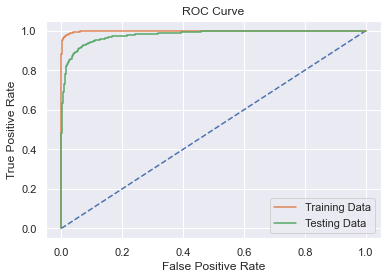

In [939]:
plt.plot([0, 1], [0, 1], linestyle='--')
train_auc,train_fpr, train_tpr, train_thresholds = calc_auc_roc(model,y_train,X_train,'Training Data')
print('AUC for Train dataset: %.3f' % train_auc)
test_auc,test_fpr, test_tpr, test_thresholds = calc_auc_roc(model,y_test,X_test,'Testing Data')
print('AUC for Train dataset: %.3f' % test_auc)
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

### Confusion Matrix for the training data and testing data

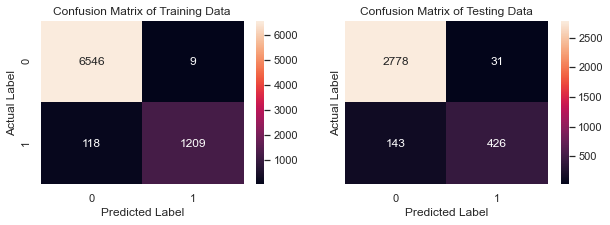

In [940]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False,figsize= (10,3))

#Plotting confusion matrix for the different models for the Training Data
# sns.set(font_scale=2)
plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,ytrain_predict)),annot=True,fmt='.5g',ax=a[0][0]);
a[0][0].set(xlabel = "Predicted Label",ylabel="Actual Label")
a[0][0].set_title('Confusion Matrix of Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,ytest_predict)),annot=True,fmt='.5g',ax=a[0][1]);
a[0][1].set_title('Confusion Matrix of Testing Data')
a[0][1].set(xlabel = "Predicted Label",ylabel="Actual Label");


### Training Data and Test Data Classification Report Comparison

In [941]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,ytrain_predict),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,ytest_predict),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.98      1.00      0.99      6555
           1       0.99      0.91      0.95      1327

    accuracy                           0.98      7882
   macro avg       0.99      0.95      0.97      7882
weighted avg       0.98      0.98      0.98      7882
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.95      0.99      0.97      2809
           1       0.93      0.75      0.83       569

    accuracy                           0.95      3378
   macro avg       0.94      0.87      0.90      3378
weighted avg       0.95      0.95      0.95      3378
 



In [942]:
X_train.shape

(7882, 23)

## Applying GridSearch for LGBM

There are lot of hyper parameters in CATboost. Just trying some combination with these parameters

In [271]:
grid = {
        'max_depth': [-1],   #0,1,2,3,4
        'num_leaves' : [100],  #10,20,30,40,50,60,70,80,90,100,110,150,200,99,101
        'boosting_type' : ['gbdt'], # ,'dart','goss'
        'n_estimators':[498], # 100,200,300,,600,700,800,499,500
        'learning_rate':[0.2], #,0.3,0.05,0.1,   
        'subsample':[0.5], #0.6,0.7,0.8,1.05 [i/10.0 for i in range(6,10)],0.4
    
}   

In [272]:
LGBM_model.get_params().keys()

dict_keys(['boosting_type', 'class_weight', 'colsample_bytree', 'importance_type', 'learning_rate', 'max_depth', 'min_child_samples', 'min_child_weight', 'min_split_gain', 'n_estimators', 'n_jobs', 'num_leaves', 'objective', 'random_state', 'reg_alpha', 'reg_lambda', 'silent', 'subsample', 'subsample_for_bin', 'subsample_freq'])

In [273]:
# grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 3,n_jobs=-1,scoring='f1')
cv =  RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
grid_search = run_gridsearch(LGBM_model,grid,X_train, y_train,cv)
result = pd.DataFrame(grid_search.cv_results_)
#check_performance(grid_search,X_train, X_test, y_train, y_test)
## Scoring - Strategy to evaluate the performance of the cross-validated model on the test set.


 Running grid search

Fitting 15 folds for each of 1 candidates, totalling 15 fits


C:\Users\ragha\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)



 Showing best parameters for the grid search

{'boosting_type': 'gbdt', 'learning_rate': 0.2, 'max_depth': -1, 'n_estimators': 498, 'num_leaves': 100, 'subsample': 0.5}

 Showing best score for the grid search

0.8593237811509906


Now tuning further with no of estimators and checking the accuracy

In [274]:
best_model = grid_search.best_estimator_

In [275]:
# Prediction on the training set

ytrain_predict = best_model.predict(X_train)
ytest_predict = best_model.predict(X_test)

## Model Evaluation

In [276]:
# Accuracy - Training Data
print ('Model score for training dataset', best_model.score(X_train, y_train))
print ('Model score for testing dataset',best_model.score(X_test, y_test))

Model score for training dataset 1.0
Model score for testing dataset 0.9772054470100652


### AUC and ROC for the training data & test data

AUC for Train dataset: 1.000
AUC for Test dataset: 0.996


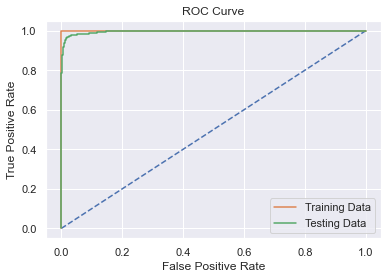

In [277]:
plt.plot([0, 1], [0, 1], linestyle='--')
train_auc,train_fpr, train_tpr, train_thresholds = calc_auc_roc(best_model,y_train,X_train,'Training Data')
print('AUC for Train dataset: %.3f' % train_auc)
test_auc,test_fpr, test_tpr, test_thresholds = calc_auc_roc(best_model,y_test,X_test,'Testing Data')
print('AUC for Test dataset: %.3f' % test_auc)
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

### Training Data and Test Data Confusion Matrix Comparison

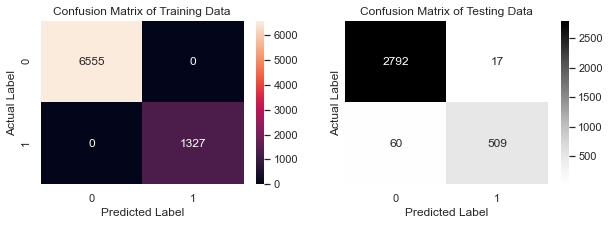

In [278]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False,figsize= (10,3))

#Plotting confusion matrix for the different models for the Training Data
sns.set(font_scale=1)
plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,ytrain_predict)),annot=True,fmt='.5g',ax=a[0][0]);
a[0][0].set(xlabel = "Predicted Label",ylabel="Actual Label")
a[0][0].set_title('Confusion Matrix of Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,ytest_predict)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Confusion Matrix of Testing Data')
a[0][1].set(xlabel = "Predicted Label",ylabel="Actual Label");


### Training Data and Test Data Classification Report Comparison

In [279]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,ytrain_predict),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,ytest_predict),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00      6555
           1       1.00      1.00      1.00      1327

    accuracy                           1.00      7882
   macro avg       1.00      1.00      1.00      7882
weighted avg       1.00      1.00      1.00      7882
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.98      0.99      0.99      2809
           1       0.97      0.89      0.93       569

    accuracy                           0.98      3378
   macro avg       0.97      0.94      0.96      3378
weighted avg       0.98      0.98      0.98      3378
 



### Variable Importance

In [290]:
df2_fi=pd.DataFrame(best_model.feature_importances_*100, columns = ["Important Feature"], index = X_train.columns).sort_values('Important Feature',ascending=False)
df2_fi

Important Feature
Cashback                            347500
Tenure                              333400
CC_Contacted_LY                     229400
Rev_Growth_YOY                      198500
Day_Since_CC_Connect                196900
CC_Agent_Score                      151400
Rev_Per_Month                       145800
Account_User_Count                   94500
City_Tier                            72000
Coupon_Used_For_Payment              64000
Gender_Male                          60900
Service_Score                        57800
Complain_LY                          56400
Marital_Status_Single                50400
Login_device_Mobile                  50000
Account_Segment                      47600
Payment_Debit Card                   46300
Payment_Credit Card                  38000
Is_COD_Ewallet                       32800
Marital_Status_Married               27600
Is_Reg_Sup                           24900
Payment_E wallet                     16400
Payment_UPI                          13900

In [291]:
df_LGBM_fi = df2_fi.copy()
df_LGBM_fi.rename(columns = {'Important Feature':'LGBM_FI'},inplace=True)

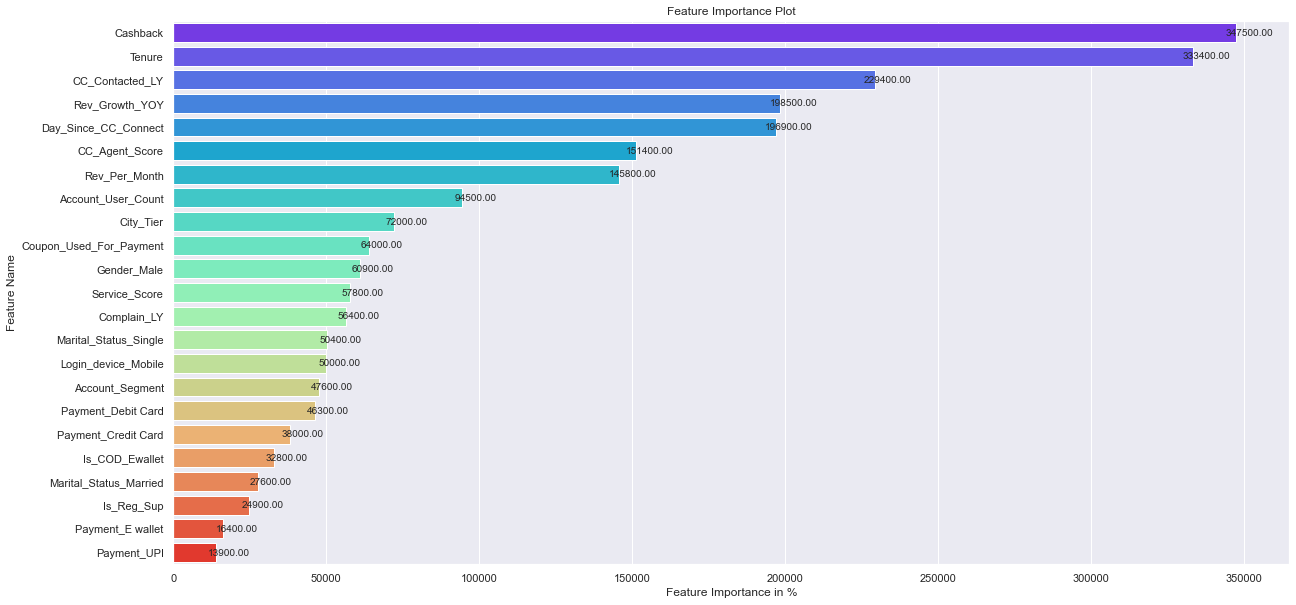

In [282]:
plt.figure(figsize=(20,10))
plots=sns.barplot(data=df2_fi,x="Important Feature",y=df2_fi.index,palette='rainbow')
plt.ylabel('Feature Name')
plt.xlabel('Feature Importance in %')
plt.title('Feature Importance Plot')

# Iterrating over the bars one-by-one 
for bar in plots.patches: 
      #print ('bar_width:', format(bar.get_width(), '.2f'),'bar_height:' , bar.get_height(), 'get_x:', bar.get_x() ,'get_y', bar.get_y() )
      plots.annotate(format(bar.get_width(), '.2f'), (bar.get_width() , bar.get_y() + bar.get_height()/2),
                   ha='center', va='center', 
                   size=10, xytext=(13, 0), 
                   textcoords='offset points') 
plt.show()

#### As per this model, attributes like Cashback, Tenure, CC_Contacted_LY, Rev_Growth_YOY, Day_Since_CC_Connect are the 5 best feautures
#### Payment_UPI, Payment_E Wallet,  Is_Reg_Sup, Marital_Status_Married,  Is_COD_Ewallet are the features which are impacting least in predicting the churn

### LGBM Conclusion

We have run the base model and model fine tuned using grid search and then used the optimal threshhold for best recall. Different evaluation meterics results for all three model run are as shown below :-

Train Data

Base model - AUC: 100%, Accuracy: 98%, Precision: 99%, Recall: 91%, f1-Score: 95%

Tuned model - AUC: 100%, Accuracy: 100%, Precision: 100%, Recall: 100%, f1-Score: 100%

Test Data

Base model - AUC: 98%, Accuracy: 95%, Precision: 93%, Recall: 75%, f1-Score: 83%

Tuned model - AUC: 100%, Accuracy: 98%, Precision: 97%, Recall: 89%, f1-Score: 93%


- **Train and Test dataset have similar statistics for accuracy and auc score but its slightly overfitting for f1 score**


- We can see that overall accuracy is very high (around 98%) with a recall rate of (89%). With this recall rate, model is able to predict 89% of account getting churned correctly out of the total account getting churned.

- Precision is 97% of test data which means, out of total account predicted by model as churned, 97% accunt actually churned. 

- F1-score is the harmonic mean of precision and recall, it takes into the effect of both the scores and this value is low if any of these 2 value is low.

- Since we are building a model to predict whether account will churn or not, for practical purposes, we will be more interested in correctly classifying 1 (account getting churned) than 0(account not getting churned).

- If a account not churning is incorrectly predicted to be "churned" by the model, then the impact on cost for DTH company would be less. But if a account who actually churned is incorrectly predicted to be not churned by the model, then the cost impact would be very high for the DTH company. Hence recall rate (actual data point identified as True by model) is very important in this scenario.

- **As per this model, attributes like Cashback, Tenure, CC_Contacted_LY, Rev_Growth_YOY, Day_Since_CC_Connect are the 5 best feautures**
- Payment_UPI, Payment_E Wallet, Is_Reg_Sup, Marital_Status_Married, Is_COD_Ewallet are the features which are impacting least in predicting the churn

## ANN MLP Model

In [177]:
from sklearn.neural_network import MLPClassifier

In [1028]:
MLP_model= MLPClassifier(random_state=1,verbose=True)

In [1029]:
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(MLP_model, X_train, y_train, scoring='recall', cv=cv, n_jobs=-1, error_score='raise')
# summarize result
print (scores)
print('Mean Recall: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

[0.81954887 0.7593985  0.80377358 0.76981132 0.72075472 0.81203008
 0.79699248 0.82641509 0.78113208 0.74339623 0.81203008 0.78947368
 0.74339623 0.75849057 0.8490566 ]
Mean Recall: 0.786 (0.035)


## Model Evaluation

In [1030]:
# Accuracy - Training Data
model=MLP_model.fit(X_train, y_train)
print ('Model score for training dataset', model.score(X_train, y_train))
print ('Model score for testing dataset',model.score(X_test, y_test))

C:\Users\ragha\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Iteration 1, loss = 0.45969608
Iteration 2, loss = 0.35825385
Iteration 3, loss = 0.33298553
Iteration 4, loss = 0.32061567
Iteration 5, loss = 0.31280258
Iteration 6, loss = 0.30716214
Iteration 7, loss = 0.30151619
Iteration 8, loss = 0.29668629
Iteration 9, loss = 0.29290017
Iteration 10, loss = 0.28838371
Iteration 11, loss = 0.28490941
Iteration 12, loss = 0.28073785
Iteration 13, loss = 0.27760372
Iteration 14, loss = 0.27366847
Iteration 15, loss = 0.27024173
Iteration 16, loss = 0.26726154
Iteration 17, loss = 0.26380643
Iteration 18, loss = 0.26047300
Iteration 19, loss = 0.25786845
Iteration 20, loss = 0.25438954
Iteration 21, loss = 0.25107254
Iteration 22, loss = 0.24829052
Iteration 23, loss = 0.24558308
Iteration 24, loss = 0.24262636
Iteration 25, loss = 0.24054585
Iteration 26, loss = 0.23721046
Iteration 27, loss = 0.23458043
Iteration 28, loss = 0.23231387
Iteration 29, loss = 0.22930099
Iteration 30, loss = 0.22754770
Iteration 31, loss = 0.22489703
Iteration 32, los

C:\Users\ragha\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


We can see that score of train and test data set varies for around 5-6%. Hence this model is good to go.

In [1031]:
model

MLPClassifier(random_state=1, verbose=True)

In [1032]:
# Prediction on the training & Test set

ytrain_predict = model.predict(X_train)
ytest_predict = model.predict(X_test)

### AUC and ROC for the training data & test data

AUC for Train dataset: 0.999
AUC for Train dataset: 0.982


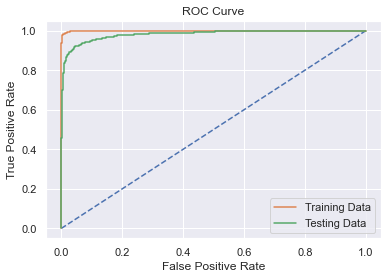

In [1033]:
plt.plot([0, 1], [0, 1], linestyle='--')
train_auc,train_fpr, train_tpr, train_thresholds = calc_auc_roc(model,y_train,X_train,'Training Data')
print('AUC for Train dataset: %.3f' % train_auc)
test_auc,test_fpr, test_tpr, test_thresholds = calc_auc_roc(model,y_test,X_test,'Testing Data')
print('AUC for Train dataset: %.3f' % test_auc)
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

### Confusion Matrix for the training data and testing data

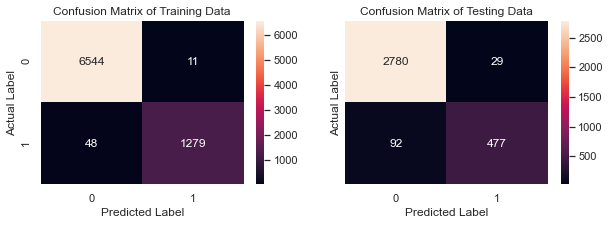

In [1034]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False,figsize= (10,3))

#Plotting confusion matrix for the different models for the Training Data
# sns.set(font_scale=2)
plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,ytrain_predict)),annot=True,fmt='.5g',ax=a[0][0]);
a[0][0].set(xlabel = "Predicted Label",ylabel="Actual Label")
a[0][0].set_title('Confusion Matrix of Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,ytest_predict)),annot=True,fmt='.5g',ax=a[0][1]);
a[0][1].set_title('Confusion Matrix of Testing Data')
a[0][1].set(xlabel = "Predicted Label",ylabel="Actual Label");


### Training Data and Test Data Classification Report Comparison

In [1035]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,ytrain_predict),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,ytest_predict),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.99      1.00      1.00      6555
           1       0.99      0.96      0.98      1327

    accuracy                           0.99      7882
   macro avg       0.99      0.98      0.99      7882
weighted avg       0.99      0.99      0.99      7882
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.97      0.99      0.98      2809
           1       0.94      0.84      0.89       569

    accuracy                           0.96      3378
   macro avg       0.96      0.91      0.93      3378
weighted avg       0.96      0.96      0.96      3378
 



In [1036]:
X_train.shape

(7882, 23)

## Applying GridSearch for MLP

There are lot of hyper parameters in CATboost. Just trying some combination with these parameters

In [1085]:
grid = {
    'hidden_layer_sizes':[(260,100),(260,90),(260,110)], #,100,(100,100),(100,100,100),(300,10),(300,100),(200,100),(250,100),(255,100),(265,100)
    # keeping these simple because it would take too much time to run on low-end computers
    "activation": [ "tanh"],  #"relu",
    "tol":[0.0001], #,0.001
    "solver": [ "adam"] #"sgd",
} 


In [1086]:
MLP_model.get_params().keys()

dict_keys(['activation', 'alpha', 'batch_size', 'beta_1', 'beta_2', 'early_stopping', 'epsilon', 'hidden_layer_sizes', 'learning_rate', 'learning_rate_init', 'max_fun', 'max_iter', 'momentum', 'n_iter_no_change', 'nesterovs_momentum', 'power_t', 'random_state', 'shuffle', 'solver', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

In [1087]:
# grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 3,n_jobs=-1,scoring='f1')
cv =  3 #RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
grid_search = run_gridsearch(MLP_model,grid,X_train, y_train,cv)
result = pd.DataFrame(grid_search.cv_results_)
#check_performance(grid_search,X_train, X_test, y_train, y_test)
## Scoring - Strategy to evaluate the performance of the cross-validated model on the test set.


 Running grid search

Fitting 3 folds for each of 3 candidates, totalling 9 fits


C:\Users\ragha\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Iteration 1, loss = 0.34607029
Iteration 2, loss = 0.31679958
Iteration 3, loss = 0.31237316
Iteration 4, loss = 0.30954490
Iteration 5, loss = 0.30203449
Iteration 6, loss = 0.29864967
Iteration 7, loss = 0.28844892
Iteration 8, loss = 0.28239912
Iteration 9, loss = 0.27553321
Iteration 10, loss = 0.26553555
Iteration 11, loss = 0.25921539
Iteration 12, loss = 0.24969621
Iteration 13, loss = 0.24111810
Iteration 14, loss = 0.23254011
Iteration 15, loss = 0.22705822
Iteration 16, loss = 0.21673932
Iteration 17, loss = 0.20636597
Iteration 18, loss = 0.20031368
Iteration 19, loss = 0.19050900
Iteration 20, loss = 0.18191292
Iteration 21, loss = 0.17273776
Iteration 22, loss = 0.16549409
Iteration 23, loss = 0.15536703
Iteration 24, loss = 0.14637879
Iteration 25, loss = 0.13957767
Iteration 26, loss = 0.13100925
Iteration 27, loss = 0.12410578
Iteration 28, loss = 0.11615479
Iteration 29, loss = 0.10958312
Iteration 30, loss = 0.10326516
Iteration 31, loss = 0.09765891
Iteration 32, los

Now tuning further with no of estimators and checking the accuracy

In [1088]:
best_model = grid_search.best_estimator_

In [1089]:
# Prediction on the training set

ytrain_predict = best_model.predict(X_train)
ytest_predict = best_model.predict(X_test)

## Model Evaluation

In [1090]:
# Accuracy - Training Data
print ('Model score for training dataset', best_model.score(X_train, y_train))
print ('Model score for testing dataset',best_model.score(X_test, y_test))

Model score for training dataset 1.0
Model score for testing dataset 0.9825340438129071


### AUC and ROC for the training data & test data

AUC for Train dataset: 1.000
AUC for Test dataset: 0.991


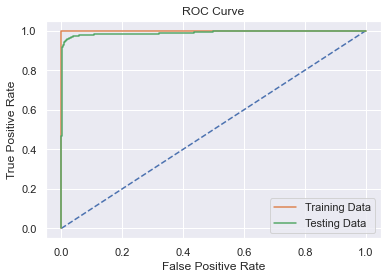

In [1091]:
plt.plot([0, 1], [0, 1], linestyle='--')
train_auc,train_fpr, train_tpr, train_thresholds = calc_auc_roc(best_model,y_train,X_train,'Training Data')
print('AUC for Train dataset: %.3f' % train_auc)
test_auc,test_fpr, test_tpr, test_thresholds = calc_auc_roc(best_model,y_test,X_test,'Testing Data')
print('AUC for Test dataset: %.3f' % test_auc)
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

### Training Data and Test Data Confusion Matrix Comparison

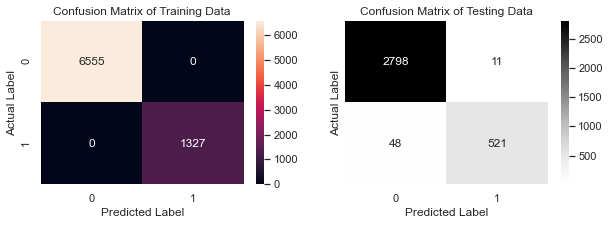

In [1092]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False,figsize= (10,3))

#Plotting confusion matrix for the different models for the Training Data
sns.set(font_scale=1)
plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,ytrain_predict)),annot=True,fmt='.5g',ax=a[0][0]);
a[0][0].set(xlabel = "Predicted Label",ylabel="Actual Label")
a[0][0].set_title('Confusion Matrix of Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,ytest_predict)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Confusion Matrix of Testing Data')
a[0][1].set(xlabel = "Predicted Label",ylabel="Actual Label");


### Training Data and Test Data Classification Report Comparison

In [1093]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,ytrain_predict),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,ytest_predict),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00      6555
           1       1.00      1.00      1.00      1327

    accuracy                           1.00      7882
   macro avg       1.00      1.00      1.00      7882
weighted avg       1.00      1.00      1.00      7882
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.98      1.00      0.99      2809
           1       0.98      0.92      0.95       569

    accuracy                           0.98      3378
   macro avg       0.98      0.96      0.97      3378
weighted avg       0.98      0.98      0.98      3378
 



### ANN MLP Conclusion

We have run the base model and model fine tuned using grid search. Different evaluation meterics results for these model runs are as shown below :-

Train Data

Base model - AUC: 100%, Accuracy: 99%, Precision: 99%, Recall: 96%, f1-Score: 98%

Tuned model - AUC: 100%, Accuracy: 100%, Precision: 100%, Recall: 100%, f1-Score: 100%

Test Data

Base model - AUC: 99%, Accuracy: 96%, Precision: 94%, Recall: 84%, f1-Score: 89%

Tuned model - AUC: 99%, Accuracy: 98%, Precision: 98%, Recall: 92%, f1-Score: 95%


- **Train and Test dataset have similar statistics for accuracy and auc score but its slightly overfitting for Recall**


- We can see that overall accuracy is very high (around 98%) with a recall rate of (92%). With this recall rate, model is able to predict 92% of account getting churned correctly out of the total account getting churned.

- Precision is 98% of test data which means, out of total account predicted by model as churned, 98% accunt actually churned. 

- F1-score is the harmonic mean of precision and recall, it takes into the effect of both the scores and this value is low if any of these 2 value is low.

- Since we are building a model to predict whether account will churn or not, for practical purposes, we will be more interested in correctly classifying 1 (account getting churned) than 0(account not getting churned).

- If a account not churning is incorrectly predicted to be "churned" by the model, then the impact on cost for DTH company would be less. But if a account who actually churned is incorrectly predicted to be not churned by the model, then the cost impact would be very high for the DTH company. Hence recall rate (actual data point identified as True by model) is very important in this scenario.


## Applying Ensemble Stacking on top 3 models

Now KNN, MLP and CAT Boost all three models are from different families of Machine Learning Algorithms. 

So lets try to create a new ensemble stacking model on these 2-3 best models


In [196]:
from sklearn.ensemble import StackingClassifier
import xgboost as xgb

In [346]:
layer1 = list()
layer1.append((('KNN', KNeighborsClassifier(n_neighbors=3,algorithm='auto', leaf_size= 30, metric='minkowski', p= 1,
                                            weights= 'distance'))))
# layer1.append((('CB', CatBoostClassifier(random_state=1,border_count= 60, depth=16, iterations= 300, l2_leaf_reg= 1, 
#                                          learning_rate= 0.3, thread_count= 4) )))
layer1.append((('MLP', MLPClassifier(random_state=1,verbose=True,activation= 'tanh', hidden_layer_sizes= (260, 100), 
                                     solver='adam', tol= 0.0001))))
# 
layer2 = xgb.XGBClassifier(random_state=1)
stacking = StackingClassifier(estimators=layer1, final_estimator=layer2, verbose=3)

In [347]:
# cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=2, random_state=1)
cv = 3
# evaluate model
scores = cross_val_score(stacking, X_train, y_train, scoring='recall', cv=cv, n_jobs=-1, error_score='raise')
# summarize result
print (scores)
print('Mean Recall: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

[0.88261851 0.90723982 0.89366516]
Mean Recall: 0.895 (0.010)


## Model Evaluation

In [348]:
# Accuracy - Training Data
model=stacking.fit(X_train, y_train)
print ('Model score for training dataset', model.score(X_train, y_train))
print ('Model score for testing dataset',model.score(X_test, y_test))

Iteration 1, loss = 0.34607029


C:\Users\ragha\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Iteration 2, loss = 0.31679958
Iteration 3, loss = 0.31237316
Iteration 4, loss = 0.30954490
Iteration 5, loss = 0.30203449
Iteration 6, loss = 0.29864967
Iteration 7, loss = 0.28844892
Iteration 8, loss = 0.28239912
Iteration 9, loss = 0.27553321
Iteration 10, loss = 0.26553555
Iteration 11, loss = 0.25921539
Iteration 12, loss = 0.24969621
Iteration 13, loss = 0.24111810
Iteration 14, loss = 0.23254011
Iteration 15, loss = 0.22705822
Iteration 16, loss = 0.21673932
Iteration 17, loss = 0.20636597
Iteration 18, loss = 0.20031368
Iteration 19, loss = 0.19050900
Iteration 20, loss = 0.18191292
Iteration 21, loss = 0.17273776
Iteration 22, loss = 0.16549409
Iteration 23, loss = 0.15536703
Iteration 24, loss = 0.14637879
Iteration 25, loss = 0.13957767
Iteration 26, loss = 0.13100925
Iteration 27, loss = 0.12410578
Iteration 28, loss = 0.11615479
Iteration 29, loss = 0.10958312
Iteration 30, loss = 0.10326516
Iteration 31, loss = 0.09765891
Iteration 32, loss = 0.09228557
Iteration 33, lo

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Iteration 1, loss = 0.35802628
Iteration 2, loss = 0.31618481
Iteration 3, loss = 0.31225947
Iteration 4, loss = 0.30951201
Iteration 5, loss = 0.30498987
Iteration 6, loss = 0.30059450
Iteration 7, loss = 0.29332360
Iteration 8, loss = 0.29055445
Iteration 9, loss = 0.28123224
Iteration 10, loss = 0.27642307
Iteration 11, loss = 0.26879409
Iteration 12, loss = 0.26161294
Iteration 13, loss = 0.25581250
Iteration 14, loss = 0.24956895
Iteration 15, loss = 0.24350633
Iteration 16, loss = 0.23553088
Iteration 17, loss = 0.22897617
Iteration 18, loss = 0.22125801
Iteration 19, loss = 0.21375784
Iteration 20, loss = 0.21081793
Iteration 21, loss = 0.20000022
Iteration 22, loss = 0.19237894
Iteration 23, loss = 0.18422074
Iteration 24, loss = 0.17936087
Iteration 25, loss = 0.17049898
Iteration 26, loss = 0.16459340
Iteration 27, loss = 0.15625782
Iteration 28, loss = 0.14861384
Iteration 29, loss = 0.14127662
Iteration 30, loss = 0.13725002
Iteration 31, loss = 0.12866390
Iteration 32, los

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   15.4s remaining:    0.0s


Iteration 1, loss = 0.35818808
Iteration 2, loss = 0.31955248
Iteration 3, loss = 0.31453315
Iteration 4, loss = 0.31137736
Iteration 5, loss = 0.30601500
Iteration 6, loss = 0.30028468
Iteration 7, loss = 0.29526194
Iteration 8, loss = 0.29262707
Iteration 9, loss = 0.28431460
Iteration 10, loss = 0.27819562
Iteration 11, loss = 0.27015650
Iteration 12, loss = 0.26354602
Iteration 13, loss = 0.25815482
Iteration 14, loss = 0.25008716
Iteration 15, loss = 0.24276157
Iteration 16, loss = 0.23429719
Iteration 17, loss = 0.22681219
Iteration 18, loss = 0.21915920
Iteration 19, loss = 0.21247076
Iteration 20, loss = 0.21149176
Iteration 21, loss = 0.20010102
Iteration 22, loss = 0.18958736
Iteration 23, loss = 0.18291216
Iteration 24, loss = 0.17628453
Iteration 25, loss = 0.16822719
Iteration 26, loss = 0.16116870
Iteration 27, loss = 0.15363728
Iteration 28, loss = 0.14616305
Iteration 29, loss = 0.13849981
Iteration 30, loss = 0.13359822
Iteration 31, loss = 0.12439751
Iteration 32, los

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   29.4s remaining:    0.0s


Iteration 3, loss = 0.31247635
Iteration 4, loss = 0.30764750
Iteration 5, loss = 0.30233849
Iteration 6, loss = 0.30086401
Iteration 7, loss = 0.29720384
Iteration 8, loss = 0.28964437
Iteration 9, loss = 0.28478060
Iteration 10, loss = 0.28067315
Iteration 11, loss = 0.27255918
Iteration 12, loss = 0.26757528
Iteration 13, loss = 0.26292234
Iteration 14, loss = 0.25347909
Iteration 15, loss = 0.24822334
Iteration 16, loss = 0.23816258
Iteration 17, loss = 0.23320823
Iteration 18, loss = 0.22509651
Iteration 19, loss = 0.21858882
Iteration 20, loss = 0.21464297
Iteration 21, loss = 0.20337415
Iteration 22, loss = 0.19409784
Iteration 23, loss = 0.18514327
Iteration 24, loss = 0.17734175
Iteration 25, loss = 0.17128145
Iteration 26, loss = 0.16273373
Iteration 27, loss = 0.15564164
Iteration 28, loss = 0.14816031
Iteration 29, loss = 0.14048397
Iteration 30, loss = 0.13504367
Iteration 31, loss = 0.12657842
Iteration 32, loss = 0.12026762
Iteration 33, loss = 0.11594487
Iteration 34, l

Iteration 122, loss = 0.00321151
Iteration 123, loss = 0.00317203
Iteration 124, loss = 0.00307223
Iteration 125, loss = 0.00304703
Iteration 126, loss = 0.00291154
Iteration 127, loss = 0.00287465
Iteration 128, loss = 0.00277354
Iteration 129, loss = 0.00270426
Iteration 130, loss = 0.00267088
Iteration 131, loss = 0.00259969
Iteration 132, loss = 0.00253410
Iteration 133, loss = 0.00245626
Iteration 134, loss = 0.00245284
Iteration 135, loss = 0.00239117
Iteration 136, loss = 0.00228408
Iteration 137, loss = 0.00224293
Iteration 138, loss = 0.00220084
Iteration 139, loss = 0.00212684
Iteration 140, loss = 0.00209236
Iteration 141, loss = 0.00206086
Iteration 142, loss = 0.00200249
Iteration 143, loss = 0.00197062
Iteration 144, loss = 0.00196057
Iteration 145, loss = 0.00194728
Iteration 146, loss = 0.00191725
Iteration 147, loss = 0.00179046
Iteration 148, loss = 0.00175856
Iteration 149, loss = 0.00172768
Iteration 150, loss = 0.00168603
Iteration 151, loss = 0.00165241
Iteration 

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.3min finished
C:\Users\ragha\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Model score for training dataset 0.9997462572951028
Model score for testing dataset 0.9881586737714624


We can see that score of train and test data set varies for around 5-6%. Hence this model is good to go.

In [349]:
model

StackingClassifier(estimators=[('KNN',
                                KNeighborsClassifier(n_neighbors=3, p=1,
                                                     weights='distance')),
                               ('MLP',
                                MLPClassifier(activation='tanh',
                                              hidden_layer_sizes=(260, 100),
                                              random_state=1, verbose=True))],
                   final_estimator=XGBClassifier(base_score=None, booster=None,
                                                 colsample_bylevel=None,
                                                 colsample_bynode=None,
                                                 colsample_bytree=None,
                                                 enable_categorical=False,
                                                 ga...
                                                 interaction_constraints=None,
                                               

In [350]:
# Prediction on the training & Test set

ytrain_predict = model.predict(X_train)
ytest_predict = model.predict(X_test)

### AUC and ROC for the training data & test data

AUC for Train dataset: 1.000
AUC for Train dataset: 0.999


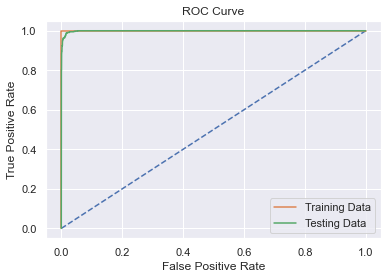

In [351]:
plt.plot([0, 1], [0, 1], linestyle='--')
train_auc,train_fpr, train_tpr, train_thresholds = calc_auc_roc(model,y_train,X_train,'Training Data')
print('AUC for Train dataset: %.3f' % train_auc)
test_auc,test_fpr, test_tpr, test_thresholds = calc_auc_roc(model,y_test,X_test,'Testing Data')
print('AUC for Train dataset: %.3f' % test_auc)
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

### Confusion Matrix for the training data and testing data

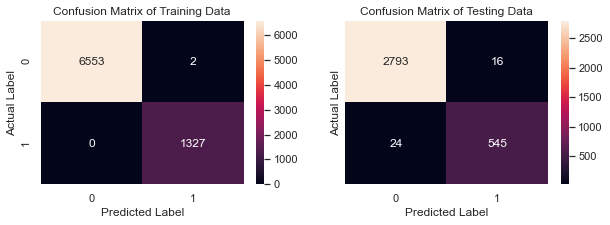

In [352]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False,figsize= (10,3))

#Plotting confusion matrix for the different models for the Training Data
# sns.set(font_scale=2)
plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,ytrain_predict)),annot=True,fmt='.5g',ax=a[0][0]);
a[0][0].set(xlabel = "Predicted Label",ylabel="Actual Label")
a[0][0].set_title('Confusion Matrix of Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,ytest_predict)),annot=True,fmt='.5g',ax=a[0][1]);
a[0][1].set_title('Confusion Matrix of Testing Data')
a[0][1].set(xlabel = "Predicted Label",ylabel="Actual Label");


### Training Data and Test Data Classification Report Comparison

In [353]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,ytrain_predict),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,ytest_predict),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00      6555
           1       1.00      1.00      1.00      1327

    accuracy                           1.00      7882
   macro avg       1.00      1.00      1.00      7882
weighted avg       1.00      1.00      1.00      7882
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.99      0.99      0.99      2809
           1       0.97      0.96      0.96       569

    accuracy                           0.99      3378
   macro avg       0.98      0.98      0.98      3378
weighted avg       0.99      0.99      0.99      3378
 



We can see that the ensemble stacking model is able to improve the recall and f1 score which we are getting from CatBoost alone.

Hence we are choosing the ensemble stacking model as the best model

## Performance comparison for all the models on Base model run 

In [439]:
X_train_bkp=X_train.copy()
X_test_bkp=X_test.copy()
from tqdm import tqdm

In [442]:
def extract_classfication_meterics(y,y_predict):
    df_metrics=classification_report(y, y_predict,output_dict=True)
#     print(classification_report(y, y_predict))
    df_metrics=pd.DataFrame(df_metrics).transpose()
#     print (df_metrics)
    precision = round(df_metrics["precision"][1],2)
    recall = round(df_metrics["recall"][1],2)
    f1 = round(df_metrics["recall"][1],2)
    accuracy = round(df_metrics["recall"][2],2)
    return precision, recall, f1,accuracy


In [443]:
LGR_model = LogisticRegression()
LDA_model = LinearDiscriminantAnalysis()
NB_model = GaussianNB()
KNN_model=KNeighborsClassifier(n_neighbors=3)
RF_model=RandomForestClassifier(n_estimators=100,random_state=1)
ADAB_model = AdaBoostClassifier(n_estimators=100,random_state=1)
XGB_model = XGBClassifier(random_state=1,n_jobs=-1) 
CB_model = CatBoostClassifier(random_state=1) 
LGBM_model = LGBMClassifier(random_state=1)
MLP_model= MLPClassifier(random_state=1,verbose=True)
layer1 = list()
layer1.append((('KNN', KNeighborsClassifier(n_neighbors=3))))
layer1.append((('MLP', MLPClassifier(random_state=1,verbose=True))))
layer2 = xgb.XGBClassifier(random_state=1)
stacking = StackingClassifier(estimators=layer1, final_estimator=layer2, verbose=3)

In [356]:
models=[LGR_model,LDA_model,NB_model,KNN_model,RF_model,ADAB_model,XGB_model,CB_model,LGBM_model,MLP_model,stacking]
modelnames = ['LogR','LDA','NB','KNN','RF','ADA','XGB','CATB','LGBM','MLP','stacking']
j=0
scores_train=[]
scores_test=[]
precision_train=[]
precision_test=[]
recall_train=[]
recall_test=[]
f1_train=[]
f1_test=[]
auc_train=[]
auc_test=[]
train_fpr=[]
test_fpr=[]
train_tpr=[]
test_tpr=[]
train_thresholds=[]
test_thresholds=[]

for i in tqdm(models):  
# we are scaling the data for ANN. Without scaling it will give very poor results. Computations becomes easier
    print (modelnames[j])
    i.fit(X_train,y_train)
    scores_train.append(round(i.score(X_train, y_train),2))
    scores_test.append(round(i.score(X_test, y_test),2))

    print(i)
    ytrain_predict = i.predict(X_train)
    ytest_predict = i.predict(X_test)
    X_train_bkp["predicted_"+modelnames[j]] = ytrain_predict
    X_test_bkp["predicted_"+modelnames[j]] =ytest_predict


    precision, recall, f1,accuracy = extract_classfication_meterics(y_train,ytrain_predict)
    precision_train.append(precision)
    recall_train.append(recall)
    f1_train.append(f1)

    precision, recall, f1,accuracy = extract_classfication_meterics(y_test,ytest_predict)
    precision_test.append(precision)
    recall_test.append(recall)
    f1_test.append(f1)

    auc_train.append(round(roc_auc_score(y_train, i.predict_proba(X_train)[:, 1]),2))
    auc_test.append(round(roc_auc_score(y_test, i.predict_proba(X_test)[:, 1]),2))

    fpr, tpr, thresholds = roc_curve(y_train, i.predict_proba(X_train)[:, 1])
    train_fpr.append(fpr)
    train_tpr.append(tpr)
    train_thresholds.append(thresholds)           

    fpr, tpr, thresholds = roc_curve(y_test, i.predict_proba(X_test)[:, 1])
    test_fpr.append(fpr)
    test_tpr.append(tpr)
    test_thresholds.append(thresholds)           
                
    j=j+1

  0%|                                                                                           | 0/11 [00:00<?, ?it/s]C:\Users\ragha\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
  9%|███████▌                                                                           | 1/11 [00:00<00:01,  7.93it/s]C:\Users\ragha\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogR
LogisticRegression()
LDA
LinearDiscriminantAnalysis()


C:\Users\ragha\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
 27%|██████████████████████▋                                                            | 3/11 [00:00<00:00,  9.60it/s]

NB
GaussianNB()
KNN


C:\Users\ragha\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=3)


 36%|██████████████████████████████▏                                                    | 4/11 [00:06<00:14,  2.14s/it]<ipython-input-356-e93ae6cad4dd>:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  i.fit(X_train,y_train)


RF
RandomForestClassifier(random_state=1)


 45%|█████████████████████████████████████▋                                             | 5/11 [00:07<00:11,  1.90s/it]C:\Users\ragha\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


ADA
AdaBoostClassifier(n_estimators=100, random_state=1)


 55%|█████████████████████████████████████████████▎                                     | 6/11 [00:09<00:08,  1.77s/it]C:\Users\ragha\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\ragha\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


XGB
[22:26:47] WARNING: D:\bld\xgboost-split_1634712635879\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 64%|████████████████████████████████████████████████████▊                              | 7/11 [00:09<00:05,  1.39s/it]

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=-1,
              num_parallel_tree=1, predictor='auto', random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
CATB
Learning rate set to 0.024877
0:	learn: 0.6717142	total: 10.2ms	remaining: 10.2s
1:	learn: 0.6518830	total: 16.4ms	remaining: 8.21s
2:	learn: 0.6329910	total: 22.8ms	remaining: 7.57s
3:	learn: 0.6160013	total: 29.2ms	remaining: 7.28s
4:	learn: 0.5996293	total: 35.6ms	remaining: 7.09s
5:	learn: 0.5826853	total: 41.8ms	remaining: 6.93s
6:	learn: 0.5668818	

177:	learn: 0.2248284	total: 988ms	remaining: 4.56s
178:	learn: 0.2242702	total: 994ms	remaining: 4.56s
179:	learn: 0.2236466	total: 999ms	remaining: 4.55s
180:	learn: 0.2231725	total: 1s	remaining: 4.55s
181:	learn: 0.2229166	total: 1.01s	remaining: 4.54s
182:	learn: 0.2225781	total: 1.02s	remaining: 4.54s
183:	learn: 0.2222374	total: 1.02s	remaining: 4.54s
184:	learn: 0.2219217	total: 1.03s	remaining: 4.53s
185:	learn: 0.2213536	total: 1.03s	remaining: 4.53s
186:	learn: 0.2207599	total: 1.04s	remaining: 4.52s
187:	learn: 0.2203974	total: 1.04s	remaining: 4.51s
188:	learn: 0.2200621	total: 1.05s	remaining: 4.51s
189:	learn: 0.2197742	total: 1.06s	remaining: 4.51s
190:	learn: 0.2194788	total: 1.06s	remaining: 4.5s
191:	learn: 0.2191481	total: 1.07s	remaining: 4.5s
192:	learn: 0.2188152	total: 1.08s	remaining: 4.5s
193:	learn: 0.2184749	total: 1.08s	remaining: 4.5s
194:	learn: 0.2181183	total: 1.09s	remaining: 4.49s
195:	learn: 0.2176876	total: 1.09s	remaining: 4.49s
196:	learn: 0.21711

363:	learn: 0.1691220	total: 2.08s	remaining: 3.63s
364:	learn: 0.1688983	total: 2.09s	remaining: 3.63s
365:	learn: 0.1687041	total: 2.09s	remaining: 3.63s
366:	learn: 0.1685579	total: 2.1s	remaining: 3.62s
367:	learn: 0.1683630	total: 2.1s	remaining: 3.62s
368:	learn: 0.1681730	total: 2.11s	remaining: 3.61s
369:	learn: 0.1679792	total: 2.12s	remaining: 3.6s
370:	learn: 0.1676801	total: 2.12s	remaining: 3.6s
371:	learn: 0.1674621	total: 2.13s	remaining: 3.6s
372:	learn: 0.1672346	total: 2.13s	remaining: 3.59s
373:	learn: 0.1668722	total: 2.14s	remaining: 3.58s
374:	learn: 0.1667598	total: 2.15s	remaining: 3.58s
375:	learn: 0.1665361	total: 2.15s	remaining: 3.57s
376:	learn: 0.1663615	total: 2.16s	remaining: 3.57s
377:	learn: 0.1661940	total: 2.16s	remaining: 3.56s
378:	learn: 0.1659275	total: 2.17s	remaining: 3.56s
379:	learn: 0.1657211	total: 2.18s	remaining: 3.55s
380:	learn: 0.1654654	total: 2.18s	remaining: 3.54s
381:	learn: 0.1652787	total: 2.19s	remaining: 3.54s
382:	learn: 0.165

526:	learn: 0.1381193	total: 3s	remaining: 2.69s
527:	learn: 0.1380134	total: 3s	remaining: 2.68s
528:	learn: 0.1378418	total: 3.01s	remaining: 2.68s
529:	learn: 0.1376389	total: 3.01s	remaining: 2.67s
530:	learn: 0.1375650	total: 3.02s	remaining: 2.67s
531:	learn: 0.1374097	total: 3.02s	remaining: 2.66s
532:	learn: 0.1373656	total: 3.03s	remaining: 2.65s
533:	learn: 0.1371142	total: 3.04s	remaining: 2.65s
534:	learn: 0.1369576	total: 3.04s	remaining: 2.64s
535:	learn: 0.1367580	total: 3.05s	remaining: 2.64s
536:	learn: 0.1365537	total: 3.05s	remaining: 2.63s
537:	learn: 0.1363892	total: 3.06s	remaining: 2.63s
538:	learn: 0.1361932	total: 3.06s	remaining: 2.62s
539:	learn: 0.1360410	total: 3.07s	remaining: 2.62s
540:	learn: 0.1358807	total: 3.08s	remaining: 2.61s
541:	learn: 0.1356922	total: 3.08s	remaining: 2.6s
542:	learn: 0.1355172	total: 3.09s	remaining: 2.6s
543:	learn: 0.1353786	total: 3.09s	remaining: 2.59s
544:	learn: 0.1350875	total: 3.1s	remaining: 2.59s
545:	learn: 0.1349356

688:	learn: 0.1154279	total: 3.91s	remaining: 1.77s
689:	learn: 0.1153233	total: 3.92s	remaining: 1.76s
690:	learn: 0.1152573	total: 3.93s	remaining: 1.75s
691:	learn: 0.1151642	total: 3.93s	remaining: 1.75s
692:	learn: 0.1150604	total: 3.94s	remaining: 1.74s
693:	learn: 0.1149705	total: 3.94s	remaining: 1.74s
694:	learn: 0.1147809	total: 3.95s	remaining: 1.73s
695:	learn: 0.1146454	total: 3.96s	remaining: 1.73s
696:	learn: 0.1144986	total: 3.96s	remaining: 1.72s
697:	learn: 0.1143367	total: 3.97s	remaining: 1.72s
698:	learn: 0.1142187	total: 3.97s	remaining: 1.71s
699:	learn: 0.1141441	total: 3.98s	remaining: 1.71s
700:	learn: 0.1140232	total: 3.98s	remaining: 1.7s
701:	learn: 0.1138922	total: 3.99s	remaining: 1.69s
702:	learn: 0.1138202	total: 3.99s	remaining: 1.69s
703:	learn: 0.1137488	total: 4s	remaining: 1.68s
704:	learn: 0.1136603	total: 4s	remaining: 1.68s
705:	learn: 0.1135883	total: 4.01s	remaining: 1.67s
706:	learn: 0.1134055	total: 4.02s	remaining: 1.66s
707:	learn: 0.11333

852:	learn: 0.0969001	total: 4.83s	remaining: 833ms
853:	learn: 0.0968110	total: 4.84s	remaining: 827ms
854:	learn: 0.0967437	total: 4.85s	remaining: 822ms
855:	learn: 0.0965588	total: 4.85s	remaining: 817ms
856:	learn: 0.0965151	total: 4.86s	remaining: 811ms
857:	learn: 0.0964037	total: 4.87s	remaining: 805ms
858:	learn: 0.0963248	total: 4.87s	remaining: 800ms
859:	learn: 0.0960901	total: 4.88s	remaining: 794ms
860:	learn: 0.0959200	total: 4.88s	remaining: 788ms
861:	learn: 0.0958371	total: 4.89s	remaining: 783ms
862:	learn: 0.0957636	total: 4.89s	remaining: 777ms
863:	learn: 0.0956522	total: 4.9s	remaining: 771ms
864:	learn: 0.0955920	total: 4.91s	remaining: 766ms
865:	learn: 0.0953493	total: 4.91s	remaining: 760ms
866:	learn: 0.0952821	total: 4.92s	remaining: 754ms
867:	learn: 0.0951718	total: 4.92s	remaining: 749ms
868:	learn: 0.0951000	total: 4.93s	remaining: 743ms
869:	learn: 0.0949990	total: 4.93s	remaining: 737ms
870:	learn: 0.0949090	total: 4.94s	remaining: 732ms
871:	learn: 0

 73%|████████████████████████████████████████████████████████████▎                      | 8/11 [00:15<00:08,  2.81s/it]C:\Users\ragha\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LGBM
LGBMClassifier(random_state=1)


 82%|███████████████████████████████████████████████████████████████████▉               | 9/11 [00:16<00:04,  2.03s/it]C:\Users\ragha\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


MLP
Iteration 1, loss = 0.45969608
Iteration 2, loss = 0.35825385
Iteration 3, loss = 0.33298553
Iteration 4, loss = 0.32061567
Iteration 5, loss = 0.31280258
Iteration 6, loss = 0.30716214
Iteration 7, loss = 0.30151619
Iteration 8, loss = 0.29668629
Iteration 9, loss = 0.29290017
Iteration 10, loss = 0.28838371
Iteration 11, loss = 0.28490941
Iteration 12, loss = 0.28073785
Iteration 13, loss = 0.27760372
Iteration 14, loss = 0.27366847
Iteration 15, loss = 0.27024173
Iteration 16, loss = 0.26726154
Iteration 17, loss = 0.26380643
Iteration 18, loss = 0.26047300
Iteration 19, loss = 0.25786845
Iteration 20, loss = 0.25438954
Iteration 21, loss = 0.25107254
Iteration 22, loss = 0.24829052
Iteration 23, loss = 0.24558308
Iteration 24, loss = 0.24262636
Iteration 25, loss = 0.24054585
Iteration 26, loss = 0.23721046
Iteration 27, loss = 0.23458043
Iteration 28, loss = 0.23231387
Iteration 29, loss = 0.22930099
Iteration 30, loss = 0.22754770
Iteration 31, loss = 0.22489703
Iteration 32,

C:\Users\ragha\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
 91%|██████████████████████████████████████████████████████████████████████████▌       | 10/11 [00:26<00:04,  4.74s/it]

Iteration 200, loss = 0.04878273
MLPClassifier(random_state=1, verbose=True)
stacking
Iteration 1, loss = 0.45969608


C:\Users\ragha\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Iteration 2, loss = 0.35825385
Iteration 3, loss = 0.33298553
Iteration 4, loss = 0.32061567
Iteration 5, loss = 0.31280258
Iteration 6, loss = 0.30716214
Iteration 7, loss = 0.30151619
Iteration 8, loss = 0.29668629
Iteration 9, loss = 0.29290017
Iteration 10, loss = 0.28838371
Iteration 11, loss = 0.28490941
Iteration 12, loss = 0.28073785
Iteration 13, loss = 0.27760372
Iteration 14, loss = 0.27366847
Iteration 15, loss = 0.27024173
Iteration 16, loss = 0.26726154
Iteration 17, loss = 0.26380643
Iteration 18, loss = 0.26047300
Iteration 19, loss = 0.25786845
Iteration 20, loss = 0.25438954
Iteration 21, loss = 0.25107254
Iteration 22, loss = 0.24829052
Iteration 23, loss = 0.24558308
Iteration 24, loss = 0.24262636
Iteration 25, loss = 0.24054585
Iteration 26, loss = 0.23721046
Iteration 27, loss = 0.23458043
Iteration 28, loss = 0.23231387
Iteration 29, loss = 0.22930099
Iteration 30, loss = 0.22754770
Iteration 31, loss = 0.22489703
Iteration 32, loss = 0.22263190
Iteration 33, lo

C:\Users\ragha\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Iteration 1, loss = 0.47426750
Iteration 2, loss = 0.36892777
Iteration 3, loss = 0.33983369
Iteration 4, loss = 0.32521141
Iteration 5, loss = 0.31639184
Iteration 6, loss = 0.31005262
Iteration 7, loss = 0.30465239
Iteration 8, loss = 0.30030413
Iteration 9, loss = 0.29634858
Iteration 10, loss = 0.29269194
Iteration 11, loss = 0.28861463
Iteration 12, loss = 0.28516269
Iteration 13, loss = 0.28132071
Iteration 14, loss = 0.27866880
Iteration 15, loss = 0.27517135
Iteration 16, loss = 0.27201514
Iteration 17, loss = 0.26895364
Iteration 18, loss = 0.26637648
Iteration 19, loss = 0.26346917
Iteration 20, loss = 0.26030256
Iteration 21, loss = 0.25825816
Iteration 22, loss = 0.25485763
Iteration 23, loss = 0.25204283
Iteration 24, loss = 0.24962035
Iteration 25, loss = 0.24668124
Iteration 26, loss = 0.24506623
Iteration 27, loss = 0.24171286
Iteration 28, loss = 0.23916015
Iteration 29, loss = 0.23677058
Iteration 30, loss = 0.23461899
Iteration 31, loss = 0.23249052
Iteration 32, los

C:\Users\ragha\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.7s remaining:    0.0s


Iteration 3, loss = 0.34507331
Iteration 4, loss = 0.33053459
Iteration 5, loss = 0.32118822
Iteration 6, loss = 0.31510100
Iteration 7, loss = 0.30938343
Iteration 8, loss = 0.30469931
Iteration 9, loss = 0.30077244
Iteration 10, loss = 0.29691817
Iteration 11, loss = 0.29271993
Iteration 12, loss = 0.28933717
Iteration 13, loss = 0.28563594
Iteration 14, loss = 0.28259617
Iteration 15, loss = 0.27921310
Iteration 16, loss = 0.27610849
Iteration 17, loss = 0.27267995
Iteration 18, loss = 0.26952875
Iteration 19, loss = 0.26692347
Iteration 20, loss = 0.26348984
Iteration 21, loss = 0.26121265
Iteration 22, loss = 0.25863454
Iteration 23, loss = 0.25521117
Iteration 24, loss = 0.25266602
Iteration 25, loss = 0.25003235
Iteration 26, loss = 0.24778294
Iteration 27, loss = 0.24439782
Iteration 28, loss = 0.24216788
Iteration 29, loss = 0.23978554
Iteration 30, loss = 0.23742006
Iteration 31, loss = 0.23561372
Iteration 32, loss = 0.23231880
Iteration 33, loss = 0.23160236
Iteration 34, l

C:\Users\ragha\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   17.4s remaining:    0.0s


Iteration 3, loss = 0.34311335
Iteration 4, loss = 0.32770245
Iteration 5, loss = 0.31840408
Iteration 6, loss = 0.31150367
Iteration 7, loss = 0.30578529
Iteration 8, loss = 0.30151787
Iteration 9, loss = 0.29732612
Iteration 10, loss = 0.29324994
Iteration 11, loss = 0.28977935
Iteration 12, loss = 0.28682267
Iteration 13, loss = 0.28321806
Iteration 14, loss = 0.27990413
Iteration 15, loss = 0.27682624
Iteration 16, loss = 0.27368782
Iteration 17, loss = 0.27040064
Iteration 18, loss = 0.26731728
Iteration 19, loss = 0.26423500
Iteration 20, loss = 0.26095475
Iteration 21, loss = 0.25911247
Iteration 22, loss = 0.25649583
Iteration 23, loss = 0.25258731
Iteration 24, loss = 0.25081120
Iteration 25, loss = 0.24789606
Iteration 26, loss = 0.24528734
Iteration 27, loss = 0.24296348
Iteration 28, loss = 0.24046740
Iteration 29, loss = 0.23831912
Iteration 30, loss = 0.23585142
Iteration 31, loss = 0.23338137
Iteration 32, loss = 0.23172717
Iteration 33, loss = 0.22918594
Iteration 34, l

C:\Users\ragha\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 2, loss = 0.36984317
Iteration 3, loss = 0.34028690
Iteration 4, loss = 0.32594235
Iteration 5, loss = 0.31768633
Iteration 6, loss = 0.31112641
Iteration 7, loss = 0.30639411
Iteration 8, loss = 0.30227191
Iteration 9, loss = 0.29855246
Iteration 10, loss = 0.29453145
Iteration 11, loss = 0.29135697
Iteration 12, loss = 0.28858024
Iteration 13, loss = 0.28549027
Iteration 14, loss = 0.28210548
Iteration 15, loss = 0.27926688
Iteration 16, loss = 0.27612718
Iteration 17, loss = 0.27344386
Iteration 18, loss = 0.27052753
Iteration 19, loss = 0.26743168
Iteration 20, loss = 0.26430336
Iteration 21, loss = 0.26249374
Iteration 22, loss = 0.25977967
Iteration 23, loss = 0.25698711
Iteration 24, loss = 0.25465196
Iteration 25, loss = 0.25192793
Iteration 26, loss = 0.24938915
Iteration 27, loss = 0.24711539
Iteration 28, loss = 0.24466757
Iteration 29, loss = 0.24238794
Iteration 30, loss = 0.24017180
Iteration 31, loss = 0.23746712
Iteration 32, loss = 0.23586999
Iteration 33, lo

C:\Users\ragha\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.47662114
Iteration 2, loss = 0.37323096
Iteration 3, loss = 0.34434435
Iteration 4, loss = 0.32965246
Iteration 5, loss = 0.32100234
Iteration 6, loss = 0.31404687
Iteration 7, loss = 0.30866614
Iteration 8, loss = 0.30403721
Iteration 9, loss = 0.29947843
Iteration 10, loss = 0.29586832
Iteration 11, loss = 0.29190380
Iteration 12, loss = 0.28867235
Iteration 13, loss = 0.28509448
Iteration 14, loss = 0.28173603
Iteration 15, loss = 0.27834643
Iteration 16, loss = 0.27531193
Iteration 17, loss = 0.27243777
Iteration 18, loss = 0.26988485
Iteration 19, loss = 0.26682752
Iteration 20, loss = 0.26385388
Iteration 21, loss = 0.26134889
Iteration 22, loss = 0.25888744
Iteration 23, loss = 0.25647394
Iteration 24, loss = 0.25358236
Iteration 25, loss = 0.25134306
Iteration 26, loss = 0.24856690
Iteration 27, loss = 0.24636646
Iteration 28, loss = 0.24436300
Iteration 29, loss = 0.24223910
Iteration 30, loss = 0.23965916
Iteration 31, loss = 0.23686865
Iteration 32, los

C:\Users\ragha\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   43.0s finished
C:\Users\ragha\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


StackingClassifier(estimators=[('KNN', KNeighborsClassifier(n_neighbors=3)),
                               ('MLP',
                                MLPClassifier(random_state=1, verbose=True))],
                   final_estimator=XGBClassifier(base_score=None, booster=None,
                                                 colsample_bylevel=None,
                                                 colsample_bynode=None,
                                                 colsample_bytree=None,
                                                 enable_categorical=False,
                                                 gamma=None, gpu_id=None,
                                                 importance_type=None,
                                                 interaction_constraints=None,
                                                 learning_rate=None,
                                                 max_delta_step=None,
                                                 max_depth=None,
     

100%|██████████████████████████████████████████████████████████████████████████████████| 11/11 [01:28<00:00,  8.03s/it]


AUC for LogR is: 0.86
AUC for LDA is: 0.85
AUC for NB is: 0.81
AUC for KNN is: 1.0
AUC for RF is: 1.0
AUC for ADA is: 0.89
AUC for XGB is: 1.0
AUC for CATB is: 1.0
AUC for LGBM is: 1.0
AUC for MLP is: 1.0
AUC for stacking is: 1.0


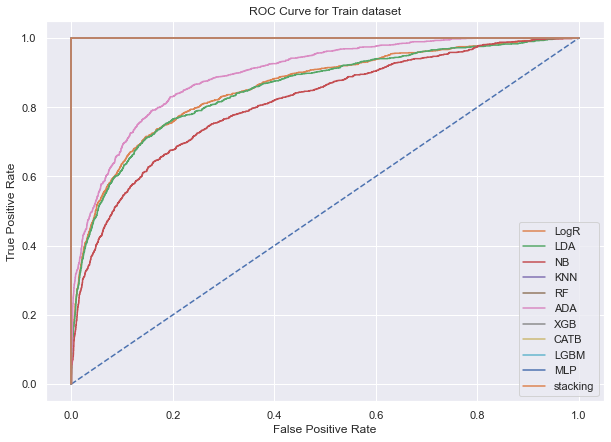

In [189]:
plt.figure(figsize=(10 ,7))
plt.plot([0, 1], [0, 1], linestyle='--')
j=0
for i in range(0,len(models)):
    plt.plot(train_fpr[i], train_tpr[i],label = modelnames[j])
    print ('AUC for',modelnames[j],'is:',auc_train[j])
    j=j+1
plt.title('ROC Curve for Train dataset')
plt.legend(loc='best')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()


AUC for LogR is: 0.84
AUC for LDA is: 0.84
AUC for NB is: 0.79
AUC for KNN is: 1.0
AUC for RF is: 0.99
AUC for ADA is: 0.88
AUC for XGB is: 0.99
AUC for CATB is: 0.99
AUC for LGBM is: 1.0
AUC for MLP is: 0.99
AUC for stacking is: 1.0


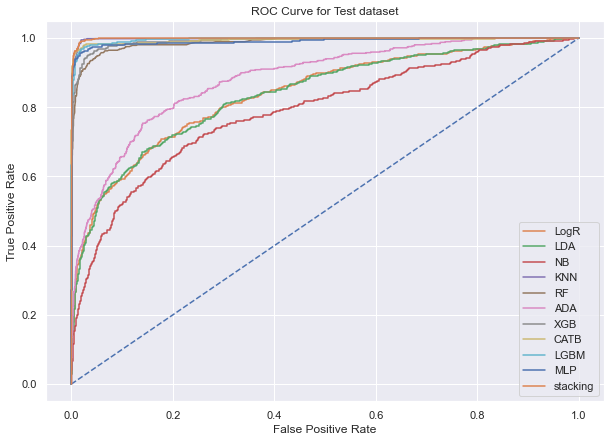

In [190]:
plt.figure(figsize=(10 ,7))
plt.plot([0, 1], [0, 1], linestyle='--')
j=0
for i in range(0,len(models)):
    plt.plot(test_fpr[i], test_tpr[i],label = modelnames[j])
    print ('AUC for',modelnames[j],'is:',auc_test[j])
    j=j+1
plt.title('ROC Curve for Test dataset')
plt.legend(loc='best')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()

We can see that Naive Bayes, LDA and Logistic Regressions have lowest AUC values

In [363]:
scores_test

[0.88, 0.88, 0.83, 0.97, 0.97, 0.88, 0.96, 0.95, 0.95, 0.96, 0.97]

In [364]:
df2_meteric_comp=(pd.DataFrame({'Models':modelnames,'Train Accuracy': scores_train,'Test Accuracy': scores_test,'Train AUC':auc_train,
                                'Test AUC': auc_test,'Train Recall':recall_train,'Test Recall': recall_test,
                                'Train precision':precision_train,'Test precision': precision_test,'Train f1':f1_train,
                                'Test f1': f1_test},
            ))
df2_meteric_comp['Run'] = "Base"
df2_meteric_comp.style.highlight_max()


<b> On comparing all the models, it looks like that no model is over-fitting/under fitting.

All models test and train score are comparable and within 5-6% range. 

We can see that all models are giving similar results with not much of difference in accuracy. 

Among all these models Logistics Regression and the LDA is giving lowest Recall and F1 scores.

KNN base model is giving best results with best f1 score and best recall rate as compared to the other models
    
</b>



## Performance comparison for all the models with best parameters obtained from tuning

In [444]:
LGR_model = LogisticRegression(C=0.5,penalty= 'none',solver='lbfgs',tol=0.001)
LDA_model = LinearDiscriminantAnalysis(solver = 'svd', tol = 0.0001)
NB_model = GaussianNB(priors = None, var_smoothing= 0.0001)
KNN_model=KNeighborsClassifier(n_neighbors=3,algorithm='auto',leaf_size= 30,metric='minkowski', p=1, weights='distance')
RF_model=RandomForestClassifier(random_state=1,max_depth=None, max_features=9, min_samples_leaf= 1, min_samples_split= 2,
                                n_estimators= 550)
ADAB_model = AdaBoostClassifier(n_estimators=1000,random_state=1,algorithm='SAMME', learning_rate= 1)
XGB_model = XGBClassifier(random_state=1,n_jobs=-1,colsample_bytree = 0.8, gamma =0.1, learning_rate= 0.3, max_depth= 9,
                          min_child_weight= 1, n_estimators= 295, reg_alpha= 0.1, subsample= 0.9) 
CB_model = CatBoostClassifier(random_state=1,border_count= 60, depth=16, iterations= 300, l2_leaf_reg= 1, learning_rate= 0.3, thread_count= 4) 
LGBM_model = LGBMClassifier(random_state=1,boosting_type= 'gbdt', learning_rate= 0.2, max_depth= -1, n_estimators= 498,
                            num_leaves= 100, subsample= 0.5)
MLP_model= MLPClassifier(random_state=1,verbose=True,activation= 'tanh', hidden_layer_sizes= (260, 100), solver='adam', tol= 0.0001)
layer1 = list()
layer1.append((('KNN', KNeighborsClassifier(n_neighbors=3,algorithm='auto', leaf_size= 30, metric='minkowski', p= 1,
                                            weights= 'distance'))))
layer1.append((('MLP', MLPClassifier(random_state=1,verbose=True,activation= 'tanh', hidden_layer_sizes= (260, 100), 
                                     solver='adam', tol= 0.0001))))
layer2 = xgb.XGBClassifier(random_state=1)
stacking = StackingClassifier(estimators=layer1, final_estimator=layer2, verbose=3)

In [445]:
models=[LGR_model,LDA_model,NB_model,KNN_model,RF_model,ADAB_model,XGB_model,CB_model,LGBM_model,MLP_model,stacking]
modelnames = ['LogR','LDA','NB','KNN','RF','ADA','XGB','CATB','LGBM','MLP','stacking']
j=0
scores_train=[]
scores_test=[]
precision_train=[]
precision_test=[]
recall_train=[]
recall_test=[]
f1_train=[]
f1_test=[]
auc_train=[]
auc_test=[]
train_fpr=[]
test_fpr=[]
train_tpr=[]
test_tpr=[]
train_thresholds=[]
test_thresholds=[]

for i in tqdm(models):  
# we are scaling the data for ANN. Without scaling it will give very poor results. Computations becomes easier
    print (modelnames[j])
    i.fit(X_train,y_train)
    scores_train.append(round(i.score(X_train, y_train),2))
    scores_test.append(round(i.score(X_test, y_test),2))

    print(i)
    ytrain_predict = i.predict(X_train)
    ytest_predict = i.predict(X_test)
    X_train_bkp["predicted_"+modelnames[j]] = ytrain_predict
    X_test_bkp["predicted_"+modelnames[j]] =ytest_predict


    precision, recall, f1,accuracy = extract_classfication_meterics(y_train,ytrain_predict)
    precision_train.append(precision)
    recall_train.append(recall)
    f1_train.append(f1)

    precision, recall, f1,accuracy = extract_classfication_meterics(y_test,ytest_predict)
    precision_test.append(precision)
    recall_test.append(recall)
    f1_test.append(f1)

    auc_train.append(round(roc_auc_score(y_train, i.predict_proba(X_train)[:, 1]),2))
    auc_test.append(round(roc_auc_score(y_test, i.predict_proba(X_test)[:, 1]),2))

    fpr, tpr, thresholds = roc_curve(y_train, i.predict_proba(X_train)[:, 1])
    train_fpr.append(fpr)
    train_tpr.append(tpr)
    train_thresholds.append(thresholds)           

    fpr, tpr, thresholds = roc_curve(y_test, i.predict_proba(X_test)[:, 1])
    test_fpr.append(fpr)
    test_tpr.append(tpr)
    test_thresholds.append(thresholds)           
                
    j=j+1

  0%|                                                                                           | 0/11 [00:00<?, ?it/s]C:\Users\ragha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\ragha\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\ragha\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
 18%|███████████████                                                                    | 2/11 [00:00<00:00, 14.39it/s]C:\Users\ragha\anaconda3\lib\site-packages\sklearn\utils\validatio

LogR
LogisticRegression(C=0.5, penalty='none', tol=0.001)
LDA
LinearDiscriminantAnalysis()
NB
GaussianNB(var_smoothing=0.0001)
KNN


C:\Users\ragha\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=3, p=1, weights='distance')


 36%|██████████████████████████████▏                                                    | 4/11 [00:06<00:13,  1.87s/it]<ipython-input-445-e93ae6cad4dd>:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  i.fit(X_train,y_train)


RF
RandomForestClassifier(max_features=9, n_estimators=550, random_state=1)


 45%|█████████████████████████████████████▋                                             | 5/11 [00:13<00:20,  3.48s/it]C:\Users\ragha\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


ADA
AdaBoostClassifier(algorithm='SAMME', learning_rate=1, n_estimators=1000,
                   random_state=1)


 55%|█████████████████████████████████████████████▎                                     | 6/11 [00:20<00:22,  4.60s/it]C:\Users\ragha\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\ragha\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


XGB
[01:05:51] WARNING: D:\bld\xgboost-split_1634712635879\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 64%|████████████████████████████████████████████████████▊                              | 7/11 [00:22<00:14,  3.54s/it]

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8,
              enable_categorical=False, gamma=0.1, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.3, max_delta_step=0, max_depth=9,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=295, n_jobs=-1, num_parallel_tree=1,
              predictor='auto', random_state=1, reg_alpha=0.1, reg_lambda=1,
              scale_pos_weight=1, subsample=0.9, tree_method='exact',
              validate_parameters=1, verbosity=None)
CATB
0:	learn: 0.3657349	total: 366ms	remaining: 1m 49s
1:	learn: 0.2102713	total: 813ms	remaining: 2m 1s
2:	learn: 0.1427162	total: 1.17s	remaining: 1m 55s
3:	learn: 0.0989178	total: 1.52s	remaining: 1m 52s
4:	learn: 0.0664426	total: 1.85s	remaining: 1m 49s
5:	learn: 0.0516440	total: 2.2s	remaining: 1m 47s
6:	learn: 0.0412877	total: 2.54s	remai

147:	learn: 0.0008530	total: 53.6s	remaining: 55.1s
148:	learn: 0.0008472	total: 54s	remaining: 54.7s
149:	learn: 0.0008415	total: 54.4s	remaining: 54.4s
150:	learn: 0.0008365	total: 54.7s	remaining: 54s
151:	learn: 0.0008303	total: 55.1s	remaining: 53.6s
152:	learn: 0.0008237	total: 55.4s	remaining: 53.3s
153:	learn: 0.0008176	total: 55.8s	remaining: 52.9s
154:	learn: 0.0008114	total: 56.2s	remaining: 52.5s
155:	learn: 0.0008058	total: 56.5s	remaining: 52.2s
156:	learn: 0.0008007	total: 56.9s	remaining: 51.9s
157:	learn: 0.0007948	total: 57.5s	remaining: 51.6s
158:	learn: 0.0007897	total: 57.8s	remaining: 51.3s
159:	learn: 0.0007848	total: 58.3s	remaining: 51s
160:	learn: 0.0007794	total: 58.9s	remaining: 50.9s
161:	learn: 0.0007746	total: 59.3s	remaining: 50.5s
162:	learn: 0.0007702	total: 59.7s	remaining: 50.2s
163:	learn: 0.0007649	total: 1m	remaining: 50.1s
164:	learn: 0.0007600	total: 1m 1s	remaining: 50s
165:	learn: 0.0007550	total: 1m 1s	remaining: 49.7s
166:	learn: 0.0007498	t

 73%|████████████████████████████████████████████████████████████▎                      | 8/11 [02:15<01:48, 36.31s/it]

LGBM


C:\Users\ragha\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
 82%|███████████████████████████████████████████████████████████████████▉               | 9/11 [02:16<00:51, 25.70s/it]

LGBMClassifier(learning_rate=0.2, n_estimators=498, num_leaves=100,
               random_state=1, subsample=0.5)
MLP


C:\Users\ragha\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Iteration 1, loss = 0.34607029
Iteration 2, loss = 0.31679958
Iteration 3, loss = 0.31237316
Iteration 4, loss = 0.30954490
Iteration 5, loss = 0.30203449
Iteration 6, loss = 0.29864967
Iteration 7, loss = 0.28844892
Iteration 8, loss = 0.28239912
Iteration 9, loss = 0.27553321
Iteration 10, loss = 0.26553555
Iteration 11, loss = 0.25921539
Iteration 12, loss = 0.24969621
Iteration 13, loss = 0.24111810
Iteration 14, loss = 0.23254011
Iteration 15, loss = 0.22705822
Iteration 16, loss = 0.21673932
Iteration 17, loss = 0.20636597
Iteration 18, loss = 0.20031368
Iteration 19, loss = 0.19050900
Iteration 20, loss = 0.18191292
Iteration 21, loss = 0.17273776
Iteration 22, loss = 0.16549409
Iteration 23, loss = 0.15536703
Iteration 24, loss = 0.14637879
Iteration 25, loss = 0.13957767
Iteration 26, loss = 0.13100925
Iteration 27, loss = 0.12410578
Iteration 28, loss = 0.11615479
Iteration 29, loss = 0.10958312
Iteration 30, loss = 0.10326516
Iteration 31, loss = 0.09765891
Iteration 32, los

 91%|██████████████████████████████████████████████████████████████████████████▌       | 10/11 [02:28<00:21, 21.72s/it]C:\Users\ragha\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


stacking
Iteration 1, loss = 0.34607029
Iteration 2, loss = 0.31679958
Iteration 3, loss = 0.31237316
Iteration 4, loss = 0.30954490
Iteration 5, loss = 0.30203449
Iteration 6, loss = 0.29864967
Iteration 7, loss = 0.28844892
Iteration 8, loss = 0.28239912
Iteration 9, loss = 0.27553321
Iteration 10, loss = 0.26553555
Iteration 11, loss = 0.25921539
Iteration 12, loss = 0.24969621
Iteration 13, loss = 0.24111810
Iteration 14, loss = 0.23254011
Iteration 15, loss = 0.22705822
Iteration 16, loss = 0.21673932
Iteration 17, loss = 0.20636597
Iteration 18, loss = 0.20031368
Iteration 19, loss = 0.19050900
Iteration 20, loss = 0.18191292
Iteration 21, loss = 0.17273776
Iteration 22, loss = 0.16549409
Iteration 23, loss = 0.15536703
Iteration 24, loss = 0.14637879
Iteration 25, loss = 0.13957767
Iteration 26, loss = 0.13100925
Iteration 27, loss = 0.12410578
Iteration 28, loss = 0.11615479
Iteration 29, loss = 0.10958312
Iteration 30, loss = 0.10326516
Iteration 31, loss = 0.09765891
Iteratio

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Iteration 1, loss = 0.35802628
Iteration 2, loss = 0.31618481
Iteration 3, loss = 0.31225947
Iteration 4, loss = 0.30951201
Iteration 5, loss = 0.30498987
Iteration 6, loss = 0.30059450
Iteration 7, loss = 0.29332360
Iteration 8, loss = 0.29055445
Iteration 9, loss = 0.28123224
Iteration 10, loss = 0.27642307
Iteration 11, loss = 0.26879409
Iteration 12, loss = 0.26161294
Iteration 13, loss = 0.25581250
Iteration 14, loss = 0.24956895
Iteration 15, loss = 0.24350633
Iteration 16, loss = 0.23553088
Iteration 17, loss = 0.22897617
Iteration 18, loss = 0.22125801
Iteration 19, loss = 0.21375784
Iteration 20, loss = 0.21081793
Iteration 21, loss = 0.20000022
Iteration 22, loss = 0.19237894
Iteration 23, loss = 0.18422074
Iteration 24, loss = 0.17936087
Iteration 25, loss = 0.17049898
Iteration 26, loss = 0.16459340
Iteration 27, loss = 0.15625782
Iteration 28, loss = 0.14861384
Iteration 29, loss = 0.14127662
Iteration 30, loss = 0.13725002
Iteration 31, loss = 0.12866390
Iteration 32, los

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.9s remaining:    0.0s


Iteration 2, loss = 0.31955248
Iteration 3, loss = 0.31453315
Iteration 4, loss = 0.31137736
Iteration 5, loss = 0.30601500
Iteration 6, loss = 0.30028468
Iteration 7, loss = 0.29526194
Iteration 8, loss = 0.29262707
Iteration 9, loss = 0.28431460
Iteration 10, loss = 0.27819562
Iteration 11, loss = 0.27015650
Iteration 12, loss = 0.26354602
Iteration 13, loss = 0.25815482
Iteration 14, loss = 0.25008716
Iteration 15, loss = 0.24276157
Iteration 16, loss = 0.23429719
Iteration 17, loss = 0.22681219
Iteration 18, loss = 0.21915920
Iteration 19, loss = 0.21247076
Iteration 20, loss = 0.21149176
Iteration 21, loss = 0.20010102
Iteration 22, loss = 0.18958736
Iteration 23, loss = 0.18291216
Iteration 24, loss = 0.17628453
Iteration 25, loss = 0.16822719
Iteration 26, loss = 0.16116870
Iteration 27, loss = 0.15363728
Iteration 28, loss = 0.14616305
Iteration 29, loss = 0.13849981
Iteration 30, loss = 0.13359822
Iteration 31, loss = 0.12439751
Iteration 32, loss = 0.11962361
Iteration 33, lo

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   22.0s remaining:    0.0s


Iteration 3, loss = 0.31247635
Iteration 4, loss = 0.30764750
Iteration 5, loss = 0.30233849
Iteration 6, loss = 0.30086401
Iteration 7, loss = 0.29720384
Iteration 8, loss = 0.28964437
Iteration 9, loss = 0.28478060
Iteration 10, loss = 0.28067315
Iteration 11, loss = 0.27255918
Iteration 12, loss = 0.26757528
Iteration 13, loss = 0.26292234
Iteration 14, loss = 0.25347909
Iteration 15, loss = 0.24822334
Iteration 16, loss = 0.23816258
Iteration 17, loss = 0.23320823
Iteration 18, loss = 0.22509651
Iteration 19, loss = 0.21858882
Iteration 20, loss = 0.21464297
Iteration 21, loss = 0.20337415
Iteration 22, loss = 0.19409784
Iteration 23, loss = 0.18514327
Iteration 24, loss = 0.17734175
Iteration 25, loss = 0.17128145
Iteration 26, loss = 0.16273373
Iteration 27, loss = 0.15564164
Iteration 28, loss = 0.14816031
Iteration 29, loss = 0.14048397
Iteration 30, loss = 0.13504367
Iteration 31, loss = 0.12657842
Iteration 32, loss = 0.12026762
Iteration 33, loss = 0.11594487
Iteration 34, l

Iteration 122, loss = 0.00321151
Iteration 123, loss = 0.00317203
Iteration 124, loss = 0.00307223
Iteration 125, loss = 0.00304703
Iteration 126, loss = 0.00291154
Iteration 127, loss = 0.00287465
Iteration 128, loss = 0.00277354
Iteration 129, loss = 0.00270426
Iteration 130, loss = 0.00267088
Iteration 131, loss = 0.00259969
Iteration 132, loss = 0.00253410
Iteration 133, loss = 0.00245626
Iteration 134, loss = 0.00245284
Iteration 135, loss = 0.00239117
Iteration 136, loss = 0.00228408
Iteration 137, loss = 0.00224293
Iteration 138, loss = 0.00220084
Iteration 139, loss = 0.00212684
Iteration 140, loss = 0.00209236
Iteration 141, loss = 0.00206086
Iteration 142, loss = 0.00200249
Iteration 143, loss = 0.00197062
Iteration 144, loss = 0.00196057
Iteration 145, loss = 0.00194728
Iteration 146, loss = 0.00191725
Iteration 147, loss = 0.00179046
Iteration 148, loss = 0.00175856
Iteration 149, loss = 0.00172768
Iteration 150, loss = 0.00168603
Iteration 151, loss = 0.00165241
Iteration 

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   58.0s finished
C:\Users\ragha\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[01:09:10] WARNING: D:\bld\xgboost-split_1634712635879\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
StackingClassifier(estimators=[('KNN',
                                KNeighborsClassifier(n_neighbors=3, p=1,
                                                     weights='distance')),
                               ('MLP',
                                MLPClassifier(activation='tanh',
                                              hidden_layer_sizes=(260, 100),
                                              random_state=1, verbose=True))],
                   final_estimator=XGBClassifier(base_score=None, booster=None,
                                                 colsample_bylevel=None,
                                                 colsample_bynode=None,
                                       

100%|██████████████████████████████████████████████████████████████████████████████████| 11/11 [03:47<00:00, 20.71s/it]


AUC for LogR is: 0.86
AUC for LDA is: 0.85
AUC for NB is: 0.81
AUC for KNN is: 1.0
AUC for RF is: 1.0
AUC for ADA is: 0.89
AUC for XGB is: 1.0
AUC for CATB is: 1.0
AUC for LGBM is: 1.0
AUC for MLP is: 1.0
AUC for stacking is: 1.0


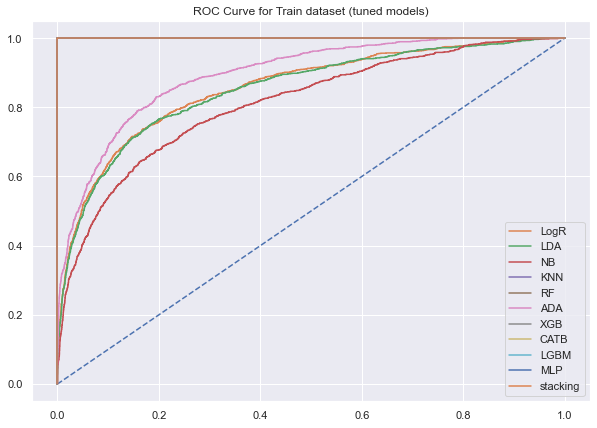

In [446]:
plt.figure(figsize=(10 ,7))
plt.plot([0, 1], [0, 1], linestyle='--')
j=0
for i in range(0,len(models)):
    plt.plot(train_fpr[i], train_tpr[i],label = modelnames[j])
    print ('AUC for',modelnames[j],'is:',auc_train[j])
    j=j+1
plt.title('ROC Curve for Train dataset (tuned models)')
plt.legend(loc='best')
plt.show()


AUC for LogR is: 0.84
AUC for LDA is: 0.84
AUC for NB is: 0.79
AUC for KNN is: 1.0
AUC for RF is: 0.99
AUC for ADA is: 0.88
AUC for XGB is: 0.99
AUC for CATB is: 0.99
AUC for LGBM is: 1.0
AUC for MLP is: 0.99
AUC for stacking is: 1.0


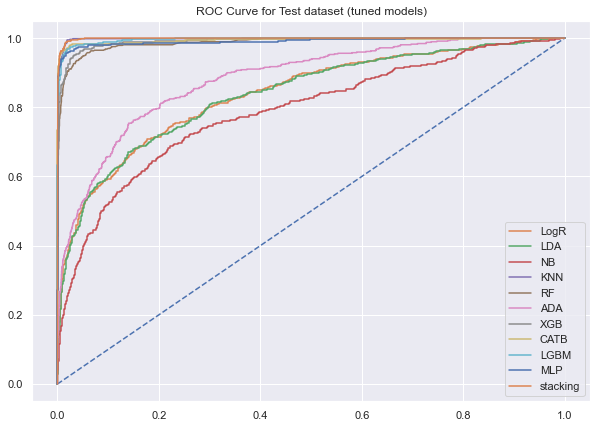

In [447]:
plt.figure(figsize=(10 ,7))
plt.plot([0, 1], [0, 1], linestyle='--')
j=0
for i in range(0,len(models)):
    plt.plot(test_fpr[i], test_tpr[i],label = modelnames[j])
    print ('AUC for',modelnames[j],'is:',auc_test[j])
    j=j+1
plt.title('ROC Curve for Test dataset (tuned models)')
plt.legend(loc='best')
plt.show()

We can see that Naive Bayes, LDA and Logistic Regressions have lowest AUC values

In [448]:
scores_test

[0.88, 0.88, 0.83, 0.98, 0.96, 0.88, 0.97, 0.99, 0.98, 0.98, 0.99]

In [449]:
df3_meteric_comp=(pd.DataFrame({'Models':modelnames,'Train Accuracy': scores_train,'Test Accuracy': scores_test,
                                'Train AUC':auc_train,'Test AUC': auc_test,'Train Recall':recall_train,
                                'Test Recall': recall_test,'Train precision':precision_train,'Test precision': precision_test,
                                'Train f1':f1_train,'Test f1': f1_test} ))
df3_meteric_comp['Run'] = "Tuned"
df3_meteric_comp.style.highlight_max()

In [450]:
df3_meteric_comp[['Models','Test Accuracy','Test AUC','Test Recall','Test precision','Test f1']].style.highlight_max()

In [452]:
df3_meteric_comp[['Models','Train Accuracy','Train AUC','Train Recall','Train precision','Train f1']]

Models  Train Accuracy  Train AUC  Train Recall  Train precision  \
0       LogR            0.88       0.86          0.41             0.75   
1        LDA            0.88       0.85          0.41             0.73   
2         NB            0.84       0.81          0.55             0.51   
3        KNN            1.00       1.00          1.00             1.00   
4         RF            1.00       1.00          1.00             1.00   
5        ADA            0.88       0.89          0.47             0.75   
6        XGB            1.00       1.00          1.00             1.00   
7       CATB            1.00       1.00          1.00             1.00   
8       LGBM            1.00       1.00          1.00             1.00   
9        MLP            1.00       1.00          1.00             1.00   
10  stacking            1.00       1.00          1.00             1.00   

    Train f1  
0       0.41  
1       0.41  
2       0.55  
3       1.00  
4       1.00  
5       0.47  
6       1.00  
7       1.00  
8       1.00  
9       1.00  
10      1.00

In [187]:
df_meteric_comp = pd.concat([df2_meteric_comp,df3_meteric_comp],axis=0)
df_meteric_comp

NameError: name 'df2_meteric_comp' is not defined

In [372]:
# sns.scatterplot(data = df_meteric_comp, x='Models',y='')

df_meteric_comp.to_csv('df_meteric.csv',index=False)

<b> On comparing all the models, it looks like that no model is over-fitting/under fitting.

All models test and train score are comparable and within 5-6% range. 

We can see that all models are giving similar results with not much of difference in accuracy. 

Among all these models Logistics Regression and the LDA are still giving lowest Recall and F1 scores.

After tuning of models, several models are giving f1 score above 90 like KNN, CATBoost, MLP    

Stacking model is giving best results with best f1 score(97) and best recall rate(97) as compared to the other models
    
</b>



In [ ]:
df_meteric_comp.reset_index(inplace=True)

In [383]:
df_meteric_comp.drop(['level_0','index'],axis=1,inplace=True)

In [384]:
df_meteric_comp.sort_values(by=['Models','Test f1']).style.highlight_max()

## Feature Importance

In [318]:
df_fi= pd.concat([df_rf_fi,df_XGB_fi,df_CB_fi,df_LGBM_fi],axis=1)
df_fi.rename(columns={'RF_FI':'RF','XGB_FI':'XGB','CB_FI':'CB','LGBM_FI':'LGBM'},inplace=True)
df_fi['RFW']=df_fi.RF / df_fi.RF.sum()
df_fi['XGBW']=df_fi.XGB / df_fi.XGB.sum()
df_fi['CBW']=df_fi.CB / df_fi.CB.sum()
df_fi['LGBMW']=df_fi.LGBM / df_fi.LGBM.sum()
df_fi["Mean FI Weights"]= (df_fi['RFW'] + df_fi['XGBW'] + df_fi['CBW'] + df_fi['LGBMW'] ) / 4
df_fi.rename(columns={'RFW':'RF FI Weights','XGBW':'XGB RF FI Weights','CBW':'CB FI Weights','LGBMW':'LGBM FI Weights'},inplace=True)
df_fi.drop(['RF','CB','XGB','LGBM'],axis=1,inplace=True)
df_fi.to_csv('feature_importance.csv')
df_fi.sort_values(by='Mean FI Weights',inplace=True,ascending=False)
df_fi

RF FI Weights  XGB RF FI Weights  CB FI Weights  \
Tenure                        0.183424           0.057358       0.085406   
Cashback                      0.110402           0.032737       0.025896   
Complain_LY                   0.070999           0.128256       0.092012   
Day_Since_CC_Connect          0.080781           0.046266       0.071818   
CC_Agent_Score                0.055285           0.041809       0.098013   
CC_Contacted_LY               0.072985           0.030715       0.056799   
Rev_Growth_YOY                0.059338           0.024160       0.066552   
Rev_Per_Month                 0.063372           0.033638       0.056986   
Marital_Status_Single         0.031349           0.067243       0.050373   
Account_Segment               0.026950           0.075560       0.046386   
City_Tier                     0.028011           0.048564       0.056526   
Account_User_Count            0.040319           0.029467       0.049179   
Gender_Male                   0.017762           0.031164       0.049509   
Login_device_Mobile           0.019510           0.042231       0.032254   
Service_Score                 0.021136           0.025139       0.031014   
Coupon_Used_For_Payment       0.026569           0.026483       0.014330   
Payment_Debit Card            0.012210           0.029384       0.033288   
Is_Reg_Sup                    0.017521           0.043572       0.022330   
Is_COD_Ewallet                0.015914           0.043939       0.016954   
Payment_Credit Card           0.014521           0.030373       0.015889   
Marital_Status_Married        0.012615           0.029833       0.019891   
Payment_E wallet              0.010993           0.042816       0.008554   
Payment_UPI                   0.008032           0.039290       0.000042   

                         LGBM FI Weights  Mean FI Weights  
Tenure                          0.141487         0.116919  
Cashback                        0.147471         0.079126  
Complain_LY                     0.023935         0.078801  
Day_Since_CC_Connect            0.083560         0.070606  
CC_Agent_Score                  0.064251         0.064840  
CC_Contacted_LY                 0.097352         0.064463  
Rev_Growth_YOY                  0.084239         0.058572  
Rev_Per_Month                   0.061874         0.053968  
Marital_Status_Single           0.021389         0.042588  
Account_Segment                 0.020200         0.042274  
City_Tier                       0.030555         0.040914  
Account_User_Count              0.040104         0.039767  
Gender_Male                     0.025845         0.031070  
Login_device_Mobile             0.021219         0.028804  
Service_Score                   0.024529         0.025455  
Coupon_Used_For_Payment         0.027160         0.023636  
Payment_Debit Card              0.019649         0.023633  
Is_Reg_Sup                      0.010567         0.023498  
Is_COD_Ewallet                  0.013920         0.022682  
Payment_Credit Card             0.016126         0.019228  
Marital_Status_Married          0.011713         0.018513  
Payment_E wallet                0.006960         0.017331  
Payment_UPI                     0.005899         0.013316

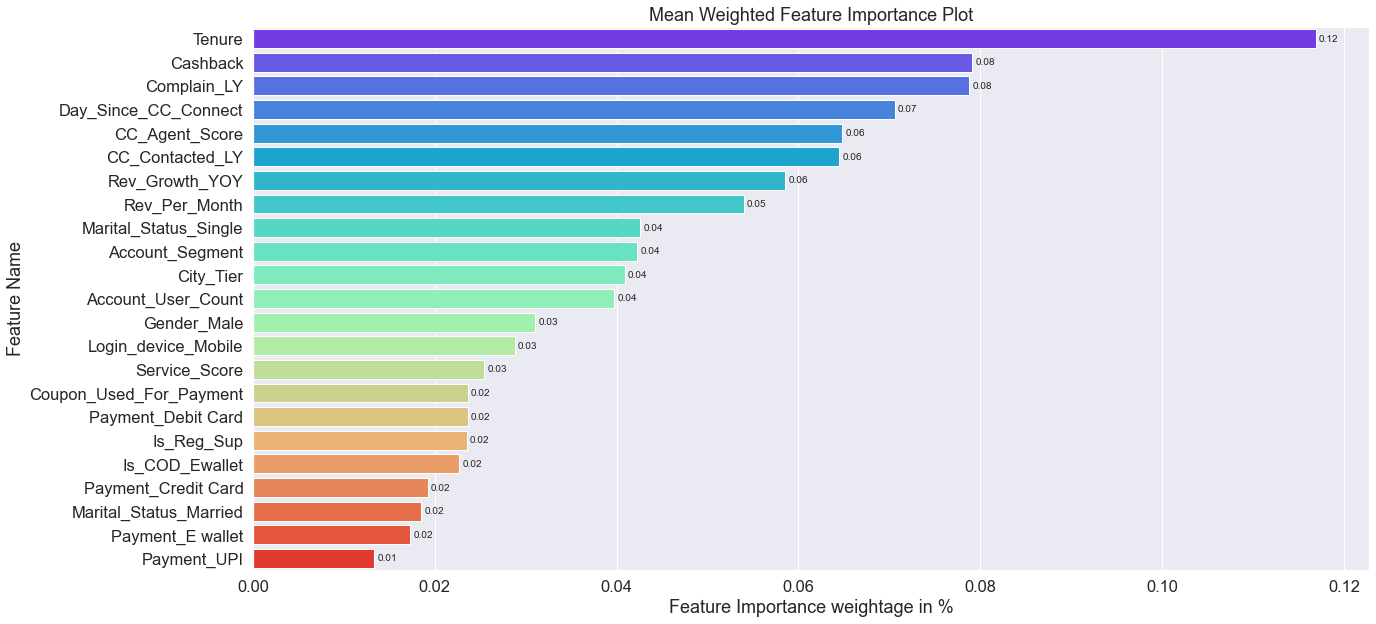

In [324]:
plt.figure(figsize=(20,10))
sns.set(font_scale=1.5)
plots=sns.barplot(data=df_fi,x="Mean FI Weights",y=df_fi.index,palette='rainbow')
plt.ylabel('Feature Name')
plt.xlabel('Feature Importance weightage in %')
plt.title('Mean Weighted Feature Importance Plot')

# Iterrating over the bars one-by-one 
for bar in plots.patches: 
      #print ('bar_width:', format(bar.get_width(), '.2f'),'bar_height:' , bar.get_height(), 'get_x:', bar.get_x() ,'get_y', bar.get_y() )
      plots.annotate(format(bar.get_width(), '.2f'), (bar.get_width() , bar.get_y() + bar.get_height()/2),
                   ha='center', va='center', 
                   size=10, xytext=(13, 0), 
                   textcoords='offset points') 
plt.show()

# Business Implications

We have tried to run several machine learning algorithms from different model family as shown below :-

    - Parameteric models (Logistic Regression, Linear Discrimant Aanalysis)
    - KNN family (KNeighborsClassifier)
    - Naive Bayes (GaussianNB)
    - Decision Tree Family ( Random Forest, ADA Boost, XGBoost , LGBM, CATBoost)
    - Deep Learning (Muli Layer Perceprtron) 
    
These models were run for predicting the account of DTH companies which are likely to churn.

Based on the reports and analysis done it was found that all the models except (logistic regression, LDA, Naive Bayes, ADA Boost) were good enough to predict the account which are likely to churn.

LDA model is giving very low recall rate (percentage of default predicted by model to total actual defualting companies) as compared to the other 2 models

There is an imbalance in the Target dataset (11:89 ratio with defaulted companies have 11% of observations).

So our recommendation to the business is as shown below:-

<AxesSubplot:xlabel='Tenure', ylabel='Cashback'>

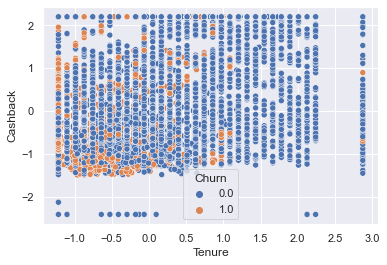

In [454]:
sns.scatterplot (data =df_imputed, x='Tenure',y='Cashback',hue='Churn')